In [1]:
import torch
from torch import nn
from torch import optim
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from nltk.classify.megam import numpy
from scipy import interp
from itertools import cycle

In [2]:
import numpy as np
import os
import math
import random
import torch
# from torch.utils.tensorboard import SummaryWriter
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy import stats
import plotly.graph_objects as go

from sklearn.utils import shuffle
import torch.nn as nn
!pip install torchsummary
import matplotlib.pyplot as plt
from torchsummary import summary
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

You should consider upgrading via the '/Users/pro/Documents/Sklearn/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import seaborn
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam
from torchvision import datasets, transforms

USE_CUDA = True

In [37]:
from sklearn.model_selection import KFold
import time

# 1.数据集处理

In [199]:
train_set = pd.read_csv('../capsule_code/data/nc_train_4.csv', sep=' ',header=None,names=['0','1','2','3','4','5','6','label'])
train_set

,0,1,2,3,4,5,6,label
0,-1.296572,-0.688269,-0.831681,-0.412444,-0.307202,0.306243,-0.361374,0
1,-0.064005,-1.456182,-1.231766,-0.985112,-0.349396,-2.416853,-0.477236,3
2,1.168561,-0.578567,0.235212,-1.557780,-0.307202,0.491938,-0.361374,0
3,1.168561,-1.675586,-0.431596,-1.271446,-0.307202,0.627293,-0.399994,7
4,1.168561,-1.675586,-1.098404,1.305561,-0.307202,0.618958,-0.399994,7
...,...,...,...,...,...,...,...,...
11195,-1.296572,1.396065,-1.498489,0.732893,-0.307202,0.455599,-0.399994,11
11196,1.168561,-0.578567,-0.431596,-1.557780,-0.265008,0.498940,-0.322753,13
11197,1.168561,-1.346480,-1.498489,1.305561,-0.307202,0.565950,-0.361374,11
11198,-0.064005,-0.578567,0.902020,-0.985112,-0.222813,0.285573,-0.284132,0


In [200]:
test_set = pd.read_csv('../capsule_code/data/nc_test_4.csv', sep=' ',header=None,names=['0','1','2','3','4','5','6','label'])
test_set

,0,1,2,3,4,5,6,label
0,-1.296572,-1.675586,-1.498489,-1.557780,-0.307202,0.315577,-0.361374,11
1,-1.296572,-1.675586,-1.498489,-1.271446,-0.307202,0.314244,-0.399994,11
2,-1.296572,-1.675586,-1.498489,-1.271446,-0.307202,0.314244,-0.399994,11
3,-1.296572,-1.675586,-1.498489,-0.985112,-0.307202,0.313910,-0.361374,11
4,-1.296572,-1.675586,-1.498489,-0.985112,-0.307202,0.313910,-0.361374,11
...,...,...,...,...,...,...,...,...
2795,1.168561,1.615469,1.435466,0.446558,-0.349396,-0.063482,-0.399994,14
2796,1.168561,1.615469,1.435466,0.732893,-0.349396,-0.062816,-0.399994,14
2797,1.168561,1.615469,1.435466,1.019227,-0.349396,-0.062816,-0.399994,14
2798,1.168561,1.615469,1.435466,1.305561,-0.349396,-0.062482,-0.399994,14


In [106]:
Data = dataset[['0','1','2','3','4','5','6','label']]

NameError: name 'dataset' is not defined

In [117]:
def k_fold_split(train_df, k):
    os.system("mkdir data")
    k_fold = []
    index = set(range(train_df.shape[0]))
    for i in range(k):
        if i == k - 1:
            k_fold.append(list(index))
        else:
            tmp = random.sample(list(index), int(1.0 / k * train_df.shape[0]))
            k_fold.append(tmp)
            index -= set(tmp)
    for i in range(k):
        print("第{}折........".format(i + 1))
        tra = []
        dev = k_fold[i]
        for j in range(k):
            if i != j:
                tra += k_fold[j]
        train_df.iloc[tra].to_csv("../capsule_code/data/nc_train_{}.csv".format(i), sep=" ", index=False, header=False)
        train_df.iloc[dev].to_csv("../capsule_code/data/nc_test_{}.csv".format(i), sep=" ", index=False, header=False)
    print("done!")

In [9]:
k_fold_split(Data, 5)

第1折........
第2折........
第3折........
第4折........
第5折........
done!


In [201]:
# 划分训练集和验证集
train_set = shuffle(train_set)
all_train_data = shuffle(train_set)
train_data = all_train_data[['0','1','2','3','4','5','6']]
train_label = all_train_data['label']

X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_label, test_size = 0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [202]:
# 测试集
test_set = shuffle(test_set)
all_test_data = shuffle(test_set)
X_test = all_test_data[['0','1','2','3','4','5','6']]
y_test = all_test_data['label']

In [203]:
X_train, X_test, X_valid = np.array(X_train).reshape(-1, 7), np.array(X_test).reshape(-1, 7), np.array(X_valid).reshape(-1, 7)
y_train, y_test, y_valid = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1), np.array(y_valid).reshape(-1, 1)

In [204]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train, X_valid, X_test = torch.FloatTensor(X_train), torch.FloatTensor(X_valid), torch.FloatTensor(X_test)
y_train, y_valid, y_test = torch.FloatTensor(y_train), torch.FloatTensor(y_valid), torch.FloatTensor(y_test)

In [205]:
from torch.utils.data import Dataset, DataLoader

class Dataset(Dataset):
  # 'Characterizes a dataset for PyTorch'
    def __init__(self, data, labels):
        # 'Initialization'
        self.labels = labels
        self.data = data

    def __len__(self):
        # 'Denotes the total number of samples'
        return len(self.data)

    def __getitem__(self, index):
        # 'Generates one sample of data'
        # Select sample
        return self.data[index], self.labels[index]

In [206]:
config = {
    'batch_size': 100,
    'shuffle': True,
    'drop_last': False
}

In [207]:
train_set = Dataset(X_train, y_train)
train_loader = DataLoader(
    train_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

validation_set = Dataset(X_valid, y_valid)
validation_loader = DataLoader(
    validation_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

test_set = Dataset(X_test, y_test)
test_loader = DataLoader(
    test_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

# 2.胶囊网络

In [208]:
def squash(x, dim=-1):
    squared_norm = (x ** 2).sum(dim=dim, keepdim=True)
    scale = squared_norm / (1 + squared_norm)
    return scale * x / (squared_norm.sqrt() + 1e-8)

In [209]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## 2.1 特征提取层 

In [210]:
class ConvLayer(nn.Module):
    
    def __init__(self, in_channels=7, out_channels=32):
        '''Constructs the ConvLayer with a specified input and output size.
           param in_channels: input depth of an image, default value = 1
           param out_channels: output depth of the convolutional layer, default value = 256
           '''
        super(ConvLayer, self).__init__()

        # defining a convolutional layer of the specified size
        self.conv1 = nn.Conv1d(in_channels=7, out_channels=64, 
                              kernel_size=3, stride=1, padding=2)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, 
                              kernel_size=3, stride=1, padding=2)
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, 
                              kernel_size=3, stride=1, padding=2)
        self.conv4 = nn.Conv1d(in_channels=256, out_channels=512, 
                              kernel_size=3, stride=1, padding=2)
#         self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        '''Defines the feedforward behavior.
           param x: the input to the layer; an input image
           return: a relu-activated, convolutional layer
           '''
        # 将 ReLu 激活应用于 conv 层的输出
        features = self.conv1(x)
#         print(features.shape)
        features = self.conv2(features)
        features = self.conv3(features)
        features = self.conv4(features)
        features = F.relu(features) # will have dimensions (batch_size, 20, 20, 256)
        return features

In [211]:
cnn = ConvLayer()
for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
    batch_data = batch_data.unsqueeze(0)
    batch_data = batch_data.permute(1,2,0)
    output = cnn(batch_data)

In [212]:
output.shape

torch.Size([100, 512, 9])

## 2.2 子胶囊层

In [213]:
class PrimaryCaps(nn.Module):
    """Primary capsule layer."""

    def __init__(self, num_conv_units, in_channels, out_channels, kernel_size, stride, padding):
        super(PrimaryCaps, self).__init__()

        # Each conv unit stands for a single capsule.
        self.conv = nn.Conv1d(in_channels=in_channels,
                              out_channels=out_channels * num_conv_units,
                              kernel_size=kernel_size,
                              stride=stride,
                              padding = padding
                             )
        self.out_channels = out_channels

    def forward(self, x):
        # Shape of x: (batch_size, in_channels, height, weight)
        # Shape of out: out_capsules * (batch_size, out_channels, height, weight)
        out = self.conv(x)
        # Flatten out: (batch_size, out_capsules * height * weight, out_channels)
        batch_size = out.shape[0]
        return squash(out.contiguous().view(batch_size, -1, self.out_channels), dim=-1)

In [214]:
cnn = ConvLayer()
primaryCaps = PrimaryCaps(num_conv_units=16,
                                        in_channels=512,
                                        out_channels=4,
                                        kernel_size=2,
                                        stride=1,
                                        padding = 1
                         )

for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
    batch_data = batch_data.unsqueeze(0)
    batch_data = batch_data.permute(1,2,0)
    output = cnn(batch_data)
    primaryCaps_output = primaryCaps(output)

In [215]:
output.shape

torch.Size([100, 512, 9])

In [216]:
primaryCaps_output.shape, primaryCaps_output

(torch.Size([100, 160, 4]),
 tensor([[[ 2.7529e-04,  1.9842e-04,  7.1370e-04,  1.2836e-03],
          [ 1.4452e-03,  2.3821e-03,  2.4539e-03,  1.0161e-03],
          [ 2.3174e-04,  3.1220e-04, -6.7075e-04, -5.3197e-04],
          ...,
          [ 1.9184e-03,  1.5625e-03, -4.8267e-04, -5.4853e-05],
          [-9.9766e-05, -3.9918e-04, -3.0049e-04, -1.1702e-04],
          [-4.4751e-04,  4.8129e-04,  2.6511e-04, -1.3809e-05]],
 
         [[ 3.6024e-04,  1.7807e-04,  7.3761e-04,  1.5499e-03],
          [ 1.2993e-03,  2.4624e-03,  2.0813e-03,  9.3071e-04],
          [ 2.2621e-04,  3.3315e-04, -7.0712e-04, -5.7172e-04],
          ...,
          [ 1.8566e-03,  1.5039e-03, -5.0332e-04, -7.2243e-06],
          [-5.7773e-05, -4.6322e-04, -3.3225e-04, -8.7491e-05],
          [-4.6775e-04,  6.2452e-04,  3.3181e-04,  9.1389e-07]],
 
         [[ 1.1719e-04,  1.5028e-03,  1.6085e-04,  1.7360e-03],
          [ 8.5200e-03,  9.1243e-03,  6.5272e-03,  3.8041e-03],
          [ 1.6131e-03,  8.6393e-04, -4.

## 2.3 父胶囊层

In [217]:
class DigitCaps(nn.Module):
    """Digit capsule layer."""

    def __init__(self, in_dim, in_caps, out_caps, out_dim, num_routing):
        """
        Initialize the layer.
        Args:
            in_dim: 		Dimensionality of each capsule vector.
            in_caps: 		Number of input capsules if digits layer.
            out_caps: 		Number of capsules in the capsule layer
            out_dim: 		Dimensionality, of the output capsule vector.
            num_routing:	Number of iterations during routing algorithm
        """
        super(DigitCaps, self).__init__()
        self.in_dim = in_dim
        self.in_caps = in_caps
        self.out_caps = out_caps
        self.out_dim = out_dim
        self.num_routing = num_routing
#         self.device = device
        self.W = nn.Parameter(0.01 * torch.randn(1, out_caps, in_caps, out_dim, in_dim),
                              requires_grad=True)

    def forward(self, x):
        batch_size = x.size(0)
        # (batch_size, in_caps, in_dim) -> (batch_size, 1, in_caps, in_dim, 1)
        x = x.unsqueeze(1).unsqueeze(4)
        # W @ x =
        # (1, out_caps, in_caps, out_dim, in_dim) @ (batch_size, 1, in_caps, in_dim, 1) =
        # (batch_size, out_caps, in_caps, out_dims, 1)
        u_hat = torch.matmul(self.W, x)
        # (batch_size, out_caps, in_caps, out_dim)
        u_hat = u_hat.squeeze(-1)
        # detach u_hat during routing iterations to prevent gradients from flowing
        temp_u_hat = u_hat.detach()

        b = torch.zeros(batch_size, self.out_caps, self.in_caps, 1)

        for route_iter in range(self.num_routing - 1):
            # (batch_size, out_caps, in_caps, 1) -> Softmax along out_caps
            c = b.softmax(dim=1)

            # element-wise multiplication
            # (batch_size, out_caps, in_caps, 1) * (batch_size, in_caps, out_caps, out_dim) ->
            # (batch_size, out_caps, in_caps, out_dim) sum across in_caps ->
            # (batch_size, out_caps, out_dim)
            s = (c * temp_u_hat).sum(dim=2)
            # apply "squashing" non-linearity along out_dim
            v = squash(s)
            # dot product agreement between the current output vj and the prediction uj|i
            # (batch_size, out_caps, in_caps, out_dim) @ (batch_size, out_caps, out_dim, 1)
            # -> (batch_size, out_caps, in_caps, 1)
            uv = torch.matmul(temp_u_hat, v.unsqueeze(-1))
            b += uv

        # last iteration is done on the original u_hat, without the routing weights update
        c = b.softmax(dim=1)
        s = (c * u_hat).sum(dim=2)
        # apply "squashing" non-linearity along out_dim
        v = squash(s)

        return v


In [218]:
cnn = ConvLayer()
primaryCaps = PrimaryCaps(num_conv_units=16,
                                        in_channels=512,
                                        out_channels=4,
                                        kernel_size=2,
                                        stride=1,
                                        padding = 1
                         )

digit_caps = DigitCaps(in_dim=4,
                                    in_caps=160,
                                    out_caps=16,
                                    out_dim=8,
                                    num_routing=3)

for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
    batch_data = batch_data.unsqueeze(0)
    batch_data = batch_data.permute(1,2,0)
    output = cnn(batch_data)
    primaryCaps_output = primaryCaps(output)
    digit_output = digit_caps(primaryCaps_output)

In [219]:
digit_output.shape, digit_output

(torch.Size([100, 16, 8]),
 tensor([[[ 3.6296e-09, -4.3931e-09,  4.0074e-09,  ..., -1.0947e-09,
            2.3292e-09, -3.1186e-09],
          [-6.7900e-10,  2.2519e-09,  4.7301e-10,  ..., -1.7672e-09,
            1.1736e-09,  3.7809e-10],
          [ 3.7540e-09, -9.6063e-09,  6.0240e-09,  ..., -3.1133e-09,
           -7.0877e-09, -5.9228e-09],
          ...,
          [-1.6134e-09,  1.2803e-09,  7.1234e-10,  ...,  1.9949e-09,
            1.0291e-09, -1.4187e-09],
          [-7.4336e-10, -1.1891e-09,  6.5571e-10,  ...,  2.9155e-10,
           -2.4547e-09,  9.9695e-10],
          [-2.1932e-11,  9.5742e-10,  4.3696e-10,  ..., -3.3060e-10,
           -6.8097e-10, -7.7044e-10]],
 
         [[ 2.7553e-09, -3.4051e-09,  3.3213e-09,  ..., -5.2336e-10,
            2.2394e-09, -2.7873e-09],
          [-8.9096e-10,  1.4472e-09,  3.3190e-10,  ..., -1.0743e-09,
            4.4669e-10, -9.6905e-11],
          [ 2.0046e-09, -6.9455e-09,  3.5706e-09,  ..., -2.2987e-09,
           -4.7959e-09, -3.299

## 2.4 胶囊网络层

In [220]:
class CapsNet(nn.Module):
    """Basic implementation of capsule network layer."""

    def __init__(self):
        super(CapsNet, self).__init__()

        # Conv1d layer
        # 提取特征层
        self.conv = ConvLayer()

        # Primary capsule
        # 子胶囊层
        self.primary_caps = PrimaryCaps(num_conv_units=16,
                                        in_channels=512,
                                        out_channels=4,
                                        kernel_size=2,
                                        stride=1,
                                        padding = 1)

        # Digit capsule
        # 父胶囊层
        self.digit_caps = DigitCaps(in_dim=4,
                                    in_caps=160,
                                    out_caps=16,
                                    out_dim=8,
                                    num_routing=3)

        # Reconstruction layer
        # 重构层
        self.decoder = nn.Sequential(
            nn.Linear(16*8, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 7),
            nn.Sigmoid())

    def forward(self, x):
        out = self.conv(x)
        out = self.primary_caps(out)
        out = self.digit_caps(out)

        # Shape of logits: (batch_size, out_capsules)
        logits = torch.norm(out, dim=-1)
        pred = torch.eye(16).index_select(dim=0, index=torch.argmax(logits, dim=1))

        # Reconstruction
        batch_size = out.shape[0]
        reconstruction = self.decoder((out * pred.unsqueeze(2)).contiguous().view(batch_size, -1))

        return logits, reconstruction


In [221]:
cnn = CapsNet()
for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
    batch_data = batch_data.unsqueeze(0)
    batch_data = batch_data.permute(1,2,0)
    logits, reconstruction = cnn(batch_data)

In [222]:
logits.shape,logits,reconstruction.shape, reconstruction

(torch.Size([100, 16]),
 tensor([[1.1401e-09, 4.6013e-09, 2.9509e-09,  ..., 3.4593e-09, 2.4419e-09,
          6.5405e-09],
         [2.8621e-09, 5.5206e-09, 4.9826e-09,  ..., 5.5013e-09, 3.8636e-09,
          9.1722e-09],
         [2.5359e-08, 2.3185e-08, 7.5912e-09,  ..., 2.7571e-08, 1.2447e-08,
          3.2215e-08],
         ...,
         [9.2834e-10, 3.8833e-09, 2.4755e-09,  ..., 4.1856e-09, 3.1368e-09,
          6.1343e-09],
         [3.4734e-08, 2.1925e-08, 1.2912e-08,  ..., 2.5726e-08, 1.3206e-08,
          3.7941e-08],
         [1.7827e-09, 8.1488e-09, 4.2996e-09,  ..., 3.0121e-09, 9.2538e-10,
          4.2767e-09]], grad_fn=<CopyBackwards>),
 torch.Size([100, 7]),
 tensor([[0.5059, 0.4957, 0.4991, 0.5052, 0.4968, 0.5080, 0.5048],
         [0.5059, 0.4957, 0.4991, 0.5052, 0.4968, 0.5080, 0.5048],
         [0.5059, 0.4957, 0.4991, 0.5052, 0.4968, 0.5080, 0.5048],
         [0.5059, 0.4957, 0.4991, 0.5052, 0.4968, 0.5080, 0.5048],
         [0.5059, 0.4957, 0.4991, 0.5052, 0.4968, 

## 2.5 损失函数

In [223]:
class CapsuleLoss(nn.Module):
    """Combine margin loss & reconstruction loss of capsule network."""

    def __init__(self, upper_bound=0.9, lower_bound=0.1, lmda=0.5):
        super(CapsuleLoss, self).__init__()
        self.upper = upper_bound
        self.lower = lower_bound
        self.lmda = lmda
        self.reconstruction_loss_scalar = 5e-4
        self.mse = nn.MSELoss(reduction='sum')

    def forward(self, images, labels, logits, reconstructions):
        # Shape of left / right / labels: (batch_size, num_classes)
        left = (self.upper - logits).relu() ** 2  # True negative
        right = (logits - self.lower).relu() ** 2  # False positive
        margin_loss = torch.sum(labels * left) + self.lmda * torch.sum((1 - labels) * right)

        # Reconstruction loss
        reconstruction_loss = self.mse(reconstructions.contiguous().view(images.shape), images)

        # Combine two losses
        return margin_loss + self.reconstruction_loss_scalar * reconstruction_loss

# 3.训练异常检测模型

## 3.1 优化器、损失函数

In [224]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
capsule_net = CapsNet()
criterion = CapsuleLoss()
optimizer = optim.Adam(capsule_net.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.96)

## 3.2 训练、验证模型

In [225]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
def One_hot(labels):
    num_class=16
    lb=LabelBinarizer().fit(np.array(range(num_class)))
    labels=lb.transform(labels)
    return labels


In [226]:
def precision_recall_curve(y, y_pred):
    y_pred_class,precision,recall = [],[],[]
    thresholds = [0.1, 0.2, 0.3, 0.6, 0.65]
    for thresh in thresholds:
        for i in y_pred:     #y_pred holds prob value for class 1
            if i>=thresh: y_pred_class.append(1)
            else: y_pred_class.append(0)
        precision.append(calculate_precision(y, y_pred_class))
        recall.append(calculate_recall(y, y_pred_class))
    return recall, precisionplt.plot(recall, precision)

In [227]:
def train(capsule_net, criterion, optimizer, 
          n_epochs, print_every=len(train_loader)):
    '''Trains a capsule network and prints out training batch loss statistics.
       Saves model parameters if *validation* loss has decreased.
       param capsule_net: trained capsule network
       param criterion: capsule loss function
       param optimizer: optimizer for updating network weights
       param n_epochs: number of epochs to train for
       param print_every: batches to print and save training loss, default = 100
       return: list of recorded training losses
       '''

    # track training loss over time
    train_losses = []
    valid_losses = []
    trainAcc1, trainAcc2, trainAcc3, trainAcc4, trainAcc5 = [], [], [], [], []
    valAcc1, valAcc2, valAcc3, valAcc4, valAcc5 = [], [], [], [], []
    trainPre, trainRecall, trainf1 = [],[],[]
    valPre, valRecall, valf1 = [],[],[]
    # one epoch = one pass over all training data 
    for epoch in range(1, n_epochs+1):
        print("-------第 {} 轮训练开始-------".format(epoch))
        '''
        使用训练集训练
        '''
        # initialize training loss
        train_loss = 0.0
        train_acc = 0.0
        train_accs = []
        capsule_net.train() # set to train mode
        train_preds = []
        train_trues = []
        correct_5 = 0.0
        correct_4 = 0.0
        correct_2 = 0.0
        correct_3 = 0.0
        correct_1 = 0.0
        count = 0
        train_acc_1, train_acc_2, train_acc_3, train_acc_4, train_acc_5 = 0.0, 0.0 ,0.0, 0.0, 0.0
        # get batches of training image data and targets
        for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
            
#             print("batch_labels:", batch_labels)
            batch_data = batch_data.unsqueeze(0)
            batch_data = batch_data.permute(1,2,0)
            batch_labels = batch_labels.squeeze()
            
            batch_labels = One_hot(batch_labels)
            # 转tensor，batch_labels: torch.Size([32, 16])
            batch_labels = torch.from_numpy(batch_labels) 
            
            # zero out gradients
            optimizer.zero_grad()
            # get model outputs
            # logits为输出的各标签概率值
            logits, reconstruction = capsule_net(batch_data)

            # calculate loss
            loss = criterion(batch_data, batch_labels, logits, reconstruction)
            # perform backpropagation and optimization
            loss.backward()
            optimizer.step()

            train_loss += loss.item() # accumulated training loss
            
            # 根据概率值对标签进行排序
            # 计算topk准确率，k=1-5
            _, pred = logits.topk(5, 1, largest=True, sorted=True)
            _, labels = torch.max(batch_labels.data.cpu(), 1)
            labels = labels.view(labels.size(0), -1).expand_as(pred)
            count += labels.shape[0]
            correct = pred.eq(labels).float()
#             print("correct:", correct)
            correct_5 += correct[:, :5].sum()
#             print("correct_5:", correct_5)
            correct_4 += correct[:, :4].sum()
#             print("correct_4:", correct_4)
            correct_3 += correct[:, :3].sum()
#             print("correct_3:", correct_3)
            correct_2 += correct[:, :2].sum()
#             print("correct_2:", correct_2)
            correct_1 += correct[:, :1].sum()
#             print("correct_1:", correct_1)
            
            _, train_outputs = torch.max(logits.data.cpu(), 1)
#             print("train_outputs:", train_outputs)
            _, batch_labels = torch.max(batch_labels.data.cpu(), 1)
#             print("batch_labels:", batch_labels)
            train_trues.append(batch_labels.cpu().detach().numpy())
            train_preds.append(train_outputs.cpu().detach().numpy())
        
            accuracy =(train_outputs.data.numpy() == batch_labels.data.numpy()).astype(int).sum()/float(batch_labels.numpy().size)
#             print("accuracy:", accuracy)
            train_accs.append(accuracy)

        train_acc1 = correct_1/count
        train_acc2 = correct_2/count
        train_acc3 = correct_3/count
        train_acc4 = correct_4/count
        train_acc5 = correct_5/count
        
        trainAcc1.append(train_acc1)
        trainAcc2.append(train_acc2)
        trainAcc3.append(train_acc3)
        trainAcc4.append(train_acc4)
        trainAcc5.append(train_acc5)
        
        y_true = np.concatenate(train_trues)
        y_pred = np.concatenate(train_preds)
        
#         ans = classification_report(y_true, y_pred,digits=5) # 小数点后保留5位有效数字
#         print("训练集各标签分类情况：", ans)
        
        precision, recall, f1 = precision_recall_fscore_support(y_true,y_pred,average='macro')[:-1]
        
        trainPre.append(precision)
        trainRecall.append(recall)
        trainf1.append(f1)
        
        # train_outputs和batch_labels输出值是什么
        # 加一个AUC
        # 查一下accuracy_score这几个。
        # 设置模式，是2分类还是多分类
        # 图像显示
        
        '''
        使用验证集验证
        '''
        capsule_net.eval()
        val_loss = 0.0
        val_accs = []
        val_acc = 0.0
        val_trues, val_preds = [],[]
        val_correct = 0.0
        val_correct5 = 0.0
        val_correct4 = 0.0
        val_correct2 = 0.0
        val_correct3 = 0.0
        val_correct1 = 0.0
        
        val_count = 0
        val_acc1, val_acc2, val_acc3, val_acc4, val_acc5 = 0.0, 0.0 ,0.0, 0.0, 0.0
        
        for val_i, (val_data, val_labels) in enumerate(validation_loader):
            
            val_data = val_data.unsqueeze(0)
            val_data = val_data.permute(1,2,0)
            val_labels = val_labels.squeeze()
            val_labels = One_hot(val_labels)
            # 转tensor，batch_labels: torch.Size([32, 16])
            val_labels = torch.from_numpy(val_labels) 
            # get model outputs
            logits, reconstruction = capsule_net(val_data)
            
            # 计算topk准确率，k=1-5
            _, pred = logits.topk(5, 1, largest=True, sorted=True)
            _, labels = torch.max(val_labels.data.cpu(), 1)
            labels = labels.view(labels.size(0), -1).expand_as(pred)
            
            val_count += labels.shape[0]
            
            val_correct = pred.eq(labels).float()
            val_correct5 += val_correct[:, :5].sum()
            val_correct4 += val_correct[:, :4].sum()
            val_correct3 += val_correct[:, :3].sum()
            val_correct2 += val_correct[:, :2].sum()
            val_correct1 += val_correct[:, :1].sum()
            
            _, val_output = torch.max(logits.data.cpu(), 1)
#             print("train_outputs:", train_outputs)
            _, val_label = torch.max(val_labels.data.cpu(), 1)
#             print("batch_labels:", batch_labels)
            val_trues.append(val_label.cpu().detach().numpy())
            val_preds.append(val_output.cpu().detach().numpy())
            
            # calculate loss
            val_losses = criterion(val_data, val_labels , logits, reconstruction)

            val_loss += val_losses.item() # accumulated training loss
            

        val_acc1 = val_correct1/val_count
        val_acc2 = val_correct2/val_count
        val_acc3 = val_correct3/val_count
        val_acc4 = val_correct4/val_count
        val_acc5 = val_correct5/val_count
        
        valAcc1.append(val_acc1)
        valAcc2.append(val_acc2)
        valAcc3.append(val_acc3)
        valAcc4.append(val_acc4)
        valAcc5.append(val_acc5)
        
        y_val_true = np.concatenate(val_trues)
        y_val_pred = np.concatenate(val_preds)
        
#         val_ans = classification_report(y_val_true, y_val_pred,digits=5) # 小数点后保留5位有效数字
#         print("验证集各标签分类情况：", val_ans)
        
        val_precision, val_recall, val_f1 = precision_recall_fscore_support(y_val_true,y_val_pred,average='macro')[:-1]
#         val_AUC = roc_auc_score(y_val_true, y_val_preds, multi_class='ovo')
        
        valPre.append(val_precision)
        valRecall.append(val_recall)
        valf1.append(val_f1)
    
        train_loss = train_loss/len(train_loader)
        train_loss = train_loss/100.0
        train_losses.append(train_loss)
        val_loss = val_loss/ len(validation_loader)
        val_loss = val_loss/100.0
        valid_losses.append(val_loss)
        print('train Loss: {:.4f} \t valid Loss: {:.4f}'.format(train_loss, val_loss))
        print('train acc1: {:.4f} \t valid acc1: {:.4f}'.format(train_acc1, val_acc1))
        print('train acc2: {:.4f} \t valid acc2: {:.4f}'.format(train_acc2, val_acc2))
        print('train acc3: {:.4f} \t valid acc3: {:.4f}'.format(train_acc3, val_acc3))
        print('train acc4: {:.4f} \t valid acc4: {:.4f}'.format(train_acc4, val_acc4))
        print('train acc5: {:.4f} \t valid acc5: {:.4f}'.format(train_acc5, val_acc5))
        print('train precision: {:.4f} \t valid precision: {:.4f}'.format(precision, val_precision))
        print('train recall: {:.4f} \t valid recall: {:.4f}'.format(recall, val_recall))
        print('train f1-score: {:.4f} \t valid f1-score: {:.4f}'.format(f1, val_f1))
    
    # 画出训练损失和验证损失曲线
    x= range(n_epochs)
    plt.plot(x, train_losses, color='coral', label='Training loss')
    plt.plot(x, valid_losses, color='#054E9F', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # 画出训练集topk准确率
    plt.plot(x, trainAcc1, color='coral', label='Training acc1')
    plt.plot(x, trainAcc2, color='#054E9F', label='Training acc2')
    plt.plot(x, trainAcc3, color='#CD853F', label='Training acc3')
    plt.plot(x, trainAcc4, color='#FFC0CB', label='Training acc4')
    plt.plot(x, trainAcc5, color='#4169E1', label='Training acc5')
    plt.title('Training top5 acc')
    plt.xlabel('Epoch')
    plt.ylabel('top5 acc')
    plt.legend()
    plt.show()
    
    # 画出验证集topk准确率
    plt.plot(x, valAcc1, color='coral', label='validation acc1')
    plt.plot(x, valAcc2, color='#054E9F', label='validation acc2')
    plt.plot(x, valAcc3, color='#CD853F', label='validation acc3')
    plt.plot(x, valAcc4, color='#FFC0CB', label='validation acc4')
    plt.plot(x, valAcc5, color='#4169E1', label='validation acc5')
    plt.title('validation top5 acc')
    plt.xlabel('Epoch')
    plt.ylabel('top5 acc')
    plt.legend()
    plt.show()
    
    # 画出训练集和验证集的precision\recall\f1-score
    plt.plot(x, trainPre, color='coral', label='Training precision')
    plt.plot(x, valPre, color='#054E9F', label='Validation precision')
    plt.title('Training and validation precision')
    plt.xlabel('Epoch')
    plt.ylabel('precision')
    plt.legend()
    plt.show()
    
    # 画出训练集和验证集的precision\recall\f1-score
    plt.plot(x, trainRecall, color='coral', label='Training Recall')
    plt.plot(x, valRecall, color='#054E9F', label='Validation Recall')
    plt.title('Training and validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.show()
    
    # 画出训练集和验证集的precision\recall\f1-score
    plt.plot(x, trainf1, color='coral', label='Training f1-score')
    plt.plot(x, valRecall, color='#054E9F', label='Validation f1-score')
    plt.title('Training and validation f1-score')
    plt.xlabel('Epoch')
    plt.ylabel('f1-score')
    plt.legend()
    plt.show()
    
#         print('train AUC: {:.4f} \t valid AUC: {:.4f}'.format(AUC, val_AUC))

### fold 0(train)

-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.4619 	 valid Loss: 0.3241
train acc1: 0.5214 	 valid acc1: 0.5914
train acc2: 0.5892 	 valid acc2: 0.7054
train acc3: 0.6544 	 valid acc3: 0.7643
train acc4: 0.7026 	 valid acc4: 0.7979
train acc5: 0.7483 	 valid acc5: 0.8443
train precision: 0.2127 	 valid precision: 0.2206
train recall: 0.1172 	 valid recall: 0.2549
train f1-score: 0.1190 	 valid f1-score: 0.1955
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2969 	 valid Loss: 0.2712
train acc1: 0.6369 	 valid acc1: 0.6682
train acc2: 0.7517 	 valid acc2: 0.7696
train acc3: 0.8045 	 valid acc3: 0.8414
train acc4: 0.8480 	 valid acc4: 0.8821
train acc5: 0.8898 	 valid acc5: 0.9093
train precision: 0.3926 	 valid precision: 0.4300
train recall: 0.3607 	 valid recall: 0.4193
train f1-score: 0.3497 	 valid f1-score: 0.4044
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2600 	 valid Loss: 0.2434
train acc1: 0.6725 	 valid acc1: 0.6886
train acc2: 0.8008 	 valid acc2: 0.8171
train acc3: 0.8702 	 valid acc3: 0.8807
train acc4: 0.9151 	 valid acc4: 0.9257
train acc5: 0.9420 	 valid acc5: 0.9579
train precision: 0.4573 	 valid precision: 0.4866
train recall: 0.4407 	 valid recall: 0.4658
train f1-score: 0.4261 	 valid f1-score: 0.4605
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2358 	 valid Loss: 0.2222
train acc1: 0.6910 	 valid acc1: 0.7046
train acc2: 0.8255 	 valid acc2: 0.8325
train acc3: 0.8998 	 valid acc3: 0.9150
train acc4: 0.9375 	 valid acc4: 0.9532
train acc5: 0.9626 	 valid acc5: 0.9693
train precision: 0.4795 	 valid precision: 0.4907
train recall: 0.4793 	 valid recall: 0.5004
train f1-score: 0.4717 	 valid f1-score: 0.4911
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2184 	 valid Loss: 0.2091
train acc1: 0.6970 	 valid acc1: 0.7068
train acc2: 0.8389 	 valid acc2: 0.8507
train acc3: 0.9101 	 valid acc3: 0.9179
train acc4: 0.9517 	 valid acc4: 0.9568
train acc5: 0.9719 	 valid acc5: 0.9732
train precision: 0.5598 	 valid precision: 0.5791
train recall: 0.4961 	 valid recall: 0.5139
train f1-score: 0.4884 	 valid f1-score: 0.5104
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2051 	 valid Loss: 0.1972
train acc1: 0.7101 	 valid acc1: 0.7279
train acc2: 0.8505 	 valid acc2: 0.8575
train acc3: 0.9211 	 valid acc3: 0.9307
train acc4: 0.9583 	 valid acc4: 0.9611
train acc5: 0.9760 	 valid acc5: 0.9779
train precision: 0.6138 	 valid precision: 0.6223
train recall: 0.5258 	 valid recall: 0.5555
train f1-score: 0.5265 	 valid f1-score: 0.5514
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1937 	 valid Loss: 0.1937
train acc1: 0.7263 	 valid acc1: 0.7282
train acc2: 0.8669 	 valid acc2: 0.8654
train acc3: 0.9315 	 valid acc3: 0.9300
train acc4: 0.9663 	 valid acc4: 0.9618
train acc5: 0.9833 	 valid acc5: 0.9764
train precision: 0.6518 	 valid precision: 0.7401
train recall: 0.5551 	 valid recall: 0.5851
train f1-score: 0.5573 	 valid f1-score: 0.5780
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1878 	 valid Loss: 0.1867
train acc1: 0.7320 	 valid acc1: 0.7429
train acc2: 0.8706 	 valid acc2: 0.8711
train acc3: 0.9327 	 valid acc3: 0.9329
train acc4: 0.9674 	 valid acc4: 0.9604
train acc5: 0.9845 	 valid acc5: 0.9757
train precision: 0.6956 	 valid precision: 0.6711
train recall: 0.5753 	 valid recall: 0.5915
train f1-score: 0.5786 	 valid f1-score: 0.6116
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1810 	 valid Loss: 0.1818
train acc1: 0.7450 	 valid acc1: 0.7514
train acc2: 0.8789 	 valid acc2: 0.8846
train acc3: 0.9394 	 valid acc3: 0.9346
train acc4: 0.9738 	 valid acc4: 0.9632
train acc5: 0.9876 	 valid acc5: 0.9814
train precision: 0.7564 	 valid precision: 0.6603
train recall: 0.6026 	 valid recall: 0.6092
train f1-score: 0.6076 	 valid f1-score: 0.6182
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1753 	 valid Loss: 0.1718
train acc1: 0.7580 	 valid acc1: 0.7775
train acc2: 0.8807 	 valid acc2: 0.8932
train acc3: 0.9444 	 valid acc3: 0.9396
train acc4: 0.9755 	 valid acc4: 0.9682
train acc5: 0.9898 	 valid acc5: 0.9800
train precision: 0.7215 	 valid precision: 0.7362
train recall: 0.6311 	 valid recall: 0.6703
train f1-score: 0.6329 	 valid f1-score: 0.6677
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1701 	 valid Loss: 0.1663
train acc1: 0.7621 	 valid acc1: 0.7743
train acc2: 0.8875 	 valid acc2: 0.8786
train acc3: 0.9457 	 valid acc3: 0.9450
train acc4: 0.9787 	 valid acc4: 0.9768
train acc5: 0.9896 	 valid acc5: 0.9882
train precision: 0.7298 	 valid precision: 0.7426
train recall: 0.6425 	 valid recall: 0.6429
train f1-score: 0.6452 	 valid f1-score: 0.6435
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1644 	 valid Loss: 0.1624
train acc1: 0.7694 	 valid acc1: 0.7793
train acc2: 0.8927 	 valid acc2: 0.8971
train acc3: 0.9476 	 valid acc3: 0.9446
train acc4: 0.9787 	 valid acc4: 0.9693
train acc5: 0.9911 	 valid acc5: 0.9829
train precision: 0.7515 	 valid precision: 0.7822
train recall: 0.6561 	 valid recall: 0.6626
train f1-score: 0.6620 	 valid f1-score: 0.6829
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1624 	 valid Loss: 0.1577
train acc1: 0.7736 	 valid acc1: 0.7957
train acc2: 0.8967 	 valid acc2: 0.9007
train acc3: 0.9490 	 valid acc3: 0.9468
train acc4: 0.9801 	 valid acc4: 0.9739
train acc5: 0.9894 	 valid acc5: 0.9864
train precision: 0.7452 	 valid precision: 0.7734
train recall: 0.6659 	 valid recall: 0.6876
train f1-score: 0.6732 	 valid f1-score: 0.6954
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1591 	 valid Loss: 0.1575
train acc1: 0.7739 	 valid acc1: 0.7757
train acc2: 0.9036 	 valid acc2: 0.9050
train acc3: 0.9543 	 valid acc3: 0.9571
train acc4: 0.9824 	 valid acc4: 0.9768
train acc5: 0.9919 	 valid acc5: 0.9857
train precision: 0.7380 	 valid precision: 0.7585
train recall: 0.6722 	 valid recall: 0.6528
train f1-score: 0.6786 	 valid f1-score: 0.6638
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1557 	 valid Loss: 0.1506
train acc1: 0.7779 	 valid acc1: 0.7864
train acc2: 0.9064 	 valid acc2: 0.9086
train acc3: 0.9564 	 valid acc3: 0.9550
train acc4: 0.9836 	 valid acc4: 0.9779
train acc5: 0.9914 	 valid acc5: 0.9871
train precision: 0.7493 	 valid precision: 0.7617
train recall: 0.6772 	 valid recall: 0.6836
train f1-score: 0.6862 	 valid f1-score: 0.6911
-------第 16 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1538 	 valid Loss: 0.1513
train acc1: 0.7818 	 valid acc1: 0.7846
train acc2: 0.9093 	 valid acc2: 0.9136
train acc3: 0.9583 	 valid acc3: 0.9554
train acc4: 0.9848 	 valid acc4: 0.9761
train acc5: 0.9930 	 valid acc5: 0.9857
train precision: 0.8176 	 valid precision: 0.7847
train recall: 0.6901 	 valid recall: 0.6726
train f1-score: 0.6996 	 valid f1-score: 0.6936
-------第 17 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1484 	 valid Loss: 0.1494
train acc1: 0.7858 	 valid acc1: 0.8068
train acc2: 0.9163 	 valid acc2: 0.9118
train acc3: 0.9648 	 valid acc3: 0.9554
train acc4: 0.9873 	 valid acc4: 0.9793
train acc5: 0.9933 	 valid acc5: 0.9882
train precision: 0.7562 	 valid precision: 0.7763
train recall: 0.6997 	 valid recall: 0.7440
train f1-score: 0.7088 	 valid f1-score: 0.7404
-------第 18 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1483 	 valid Loss: 0.1496
train acc1: 0.7900 	 valid acc1: 0.7893
train acc2: 0.9156 	 valid acc2: 0.9196
train acc3: 0.9639 	 valid acc3: 0.9564
train acc4: 0.9858 	 valid acc4: 0.9800
train acc5: 0.9929 	 valid acc5: 0.9889
train precision: 0.7638 	 valid precision: 0.7913
train recall: 0.7067 	 valid recall: 0.6773
train f1-score: 0.7147 	 valid f1-score: 0.7090
-------第 19 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1442 	 valid Loss: 0.1423
train acc1: 0.7940 	 valid acc1: 0.7993
train acc2: 0.9214 	 valid acc2: 0.9179
train acc3: 0.9687 	 valid acc3: 0.9632
train acc4: 0.9874 	 valid acc4: 0.9836
train acc5: 0.9949 	 valid acc5: 0.9900
train precision: 0.7675 	 valid precision: 0.7848
train recall: 0.7138 	 valid recall: 0.6946
train f1-score: 0.7227 	 valid f1-score: 0.7125
-------第 20 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1433 	 valid Loss: 0.1405
train acc1: 0.7945 	 valid acc1: 0.7986
train acc2: 0.9208 	 valid acc2: 0.9171
train acc3: 0.9673 	 valid acc3: 0.9568
train acc4: 0.9886 	 valid acc4: 0.9825
train acc5: 0.9940 	 valid acc5: 0.9932
train precision: 0.8258 	 valid precision: 0.7737
train recall: 0.7204 	 valid recall: 0.7070
train f1-score: 0.7268 	 valid f1-score: 0.7262
-------第 21 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1395 	 valid Loss: 0.1387
train acc1: 0.8019 	 valid acc1: 0.7982
train acc2: 0.9265 	 valid acc2: 0.9264
train acc3: 0.9707 	 valid acc3: 0.9636
train acc4: 0.9887 	 valid acc4: 0.9814
train acc5: 0.9955 	 valid acc5: 0.9925
train precision: 0.8099 	 valid precision: 0.7998
train recall: 0.7334 	 valid recall: 0.7089
train f1-score: 0.7399 	 valid f1-score: 0.7238
-------第 22 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1373 	 valid Loss: 0.1417
train acc1: 0.8046 	 valid acc1: 0.8018
train acc2: 0.9301 	 valid acc2: 0.9200
train acc3: 0.9702 	 valid acc3: 0.9654
train acc4: 0.9892 	 valid acc4: 0.9843
train acc5: 0.9949 	 valid acc5: 0.9918
train precision: 0.8009 	 valid precision: 0.7892
train recall: 0.7405 	 valid recall: 0.7045
train f1-score: 0.7454 	 valid f1-score: 0.7188
-------第 23 轮训练开始-------
train Loss: 0.1341 	 valid Loss: 0.1348
train acc1: 0.8065 	 valid acc1: 0.8125
train acc2: 0.9314 	 valid acc2: 0.9279
train acc3: 0.9746 	 valid acc3: 0.9607
train acc4: 0.9911 	 valid acc4: 0.9821
train acc5: 0.9967 	 valid acc5: 0.9893
train precision: 0.8027 	 valid precision: 0.8016
train recall: 0.7453 	 valid recall: 0.7391
train f1-score: 0.7474 	 valid f1-score: 0.7511
-------第 24 轮训练开始-------
train Loss: 0.1324 	 valid Loss: 0.1279
train acc1: 0.8113 	 valid acc1: 0.8307
train acc2: 0.9351 	 valid acc2: 0.9271
train acc3: 0.9740 	 valid acc3: 0.9618
train acc4: 0.9910 	 valid

train Loss: 0.1084 	 valid Loss: 0.1169
train acc1: 0.8460 	 valid acc1: 0.8364
train acc2: 0.9608 	 valid acc2: 0.9418
train acc3: 0.9888 	 valid acc3: 0.9786
train acc4: 0.9965 	 valid acc4: 0.9879
train acc5: 0.9982 	 valid acc5: 0.9914
train precision: 0.8474 	 valid precision: 0.8338
train recall: 0.8127 	 valid recall: 0.7742
train f1-score: 0.8175 	 valid f1-score: 0.7889
-------第 44 轮训练开始-------
train Loss: 0.1058 	 valid Loss: 0.1091
train acc1: 0.8476 	 valid acc1: 0.8596
train acc2: 0.9648 	 valid acc2: 0.9521
train acc3: 0.9913 	 valid acc3: 0.9807
train acc4: 0.9971 	 valid acc4: 0.9886
train acc5: 0.9986 	 valid acc5: 0.9925
train precision: 0.8482 	 valid precision: 0.8613
train recall: 0.8126 	 valid recall: 0.8160
train f1-score: 0.8169 	 valid f1-score: 0.8269
-------第 45 轮训练开始-------
train Loss: 0.1056 	 valid Loss: 0.1050
train acc1: 0.8565 	 valid acc1: 0.8646
train acc2: 0.9650 	 valid acc2: 0.9561
train acc3: 0.9895 	 valid acc3: 0.9818
train acc4: 0.9965 	 valid

train Loss: 0.0826 	 valid Loss: 0.0943
train acc1: 0.8877 	 valid acc1: 0.8846
train acc2: 0.9811 	 valid acc2: 0.9654
train acc3: 0.9950 	 valid acc3: 0.9839
train acc4: 0.9977 	 valid acc4: 0.9914
train acc5: 0.9993 	 valid acc5: 0.9950
train precision: 0.8895 	 valid precision: 0.8740
train recall: 0.8649 	 valid recall: 0.8690
train f1-score: 0.8702 	 valid f1-score: 0.8659
-------第 65 轮训练开始-------
train Loss: 0.0816 	 valid Loss: 0.0972
train acc1: 0.8926 	 valid acc1: 0.8789
train acc2: 0.9814 	 valid acc2: 0.9661
train acc3: 0.9956 	 valid acc3: 0.9832
train acc4: 0.9986 	 valid acc4: 0.9907
train acc5: 0.9993 	 valid acc5: 0.9936
train precision: 0.8938 	 valid precision: 0.8737
train recall: 0.8708 	 valid recall: 0.8470
train f1-score: 0.8748 	 valid f1-score: 0.8522
-------第 66 轮训练开始-------
train Loss: 0.0810 	 valid Loss: 0.0876
train acc1: 0.8904 	 valid acc1: 0.8911
train acc2: 0.9819 	 valid acc2: 0.9725
train acc3: 0.9956 	 valid acc3: 0.9875
train acc4: 0.9985 	 valid

train Loss: 0.0736 	 valid Loss: 0.0963
train acc1: 0.9043 	 valid acc1: 0.8825
train acc2: 0.9875 	 valid acc2: 0.9729
train acc3: 0.9975 	 valid acc3: 0.9846
train acc4: 0.9994 	 valid acc4: 0.9907
train acc5: 0.9996 	 valid acc5: 0.9925
train precision: 0.9050 	 valid precision: 0.8655
train recall: 0.8886 	 valid recall: 0.8654
train f1-score: 0.8914 	 valid f1-score: 0.8577
-------第 86 轮训练开始-------
train Loss: 0.0697 	 valid Loss: 0.0872
train acc1: 0.9087 	 valid acc1: 0.8889
train acc2: 0.9882 	 valid acc2: 0.9668
train acc3: 0.9985 	 valid acc3: 0.9843
train acc4: 0.9996 	 valid acc4: 0.9879
train acc5: 0.9998 	 valid acc5: 0.9932
train precision: 0.9095 	 valid precision: 0.8919
train recall: 0.8884 	 valid recall: 0.8593
train f1-score: 0.8945 	 valid f1-score: 0.8674
-------第 87 轮训练开始-------
train Loss: 0.0669 	 valid Loss: 0.0910
train acc1: 0.9151 	 valid acc1: 0.8818
train acc2: 0.9902 	 valid acc2: 0.9729
train acc3: 0.9989 	 valid acc3: 0.9832
train acc4: 0.9995 	 valid

train Loss: 0.0595 	 valid Loss: 0.0876
train acc1: 0.9215 	 valid acc1: 0.8954
train acc2: 0.9905 	 valid acc2: 0.9646
train acc3: 0.9983 	 valid acc3: 0.9818
train acc4: 0.9998 	 valid acc4: 0.9882
train acc5: 0.9998 	 valid acc5: 0.9921
train precision: 0.9250 	 valid precision: 0.8886
train recall: 0.9073 	 valid recall: 0.8769
train f1-score: 0.9127 	 valid f1-score: 0.8775
-------第 107 轮训练开始-------
train Loss: 0.0578 	 valid Loss: 0.0846
train acc1: 0.9255 	 valid acc1: 0.8957
train acc2: 0.9935 	 valid acc2: 0.9736
train acc3: 0.9988 	 valid acc3: 0.9843
train acc4: 1.0000 	 valid acc4: 0.9871
train acc5: 1.0000 	 valid acc5: 0.9939
train precision: 0.9260 	 valid precision: 0.9013
train recall: 0.9115 	 valid recall: 0.8632
train f1-score: 0.9161 	 valid f1-score: 0.8793
-------第 108 轮训练开始-------
train Loss: 0.0603 	 valid Loss: 0.0842
train acc1: 0.9235 	 valid acc1: 0.8957
train acc2: 0.9918 	 valid acc2: 0.9711
train acc3: 0.9989 	 valid acc3: 0.9814
train acc4: 0.9993 	 val

train Loss: 0.0494 	 valid Loss: 0.0858
train acc1: 0.9388 	 valid acc1: 0.8989
train acc2: 0.9946 	 valid acc2: 0.9693
train acc3: 0.9995 	 valid acc3: 0.9850
train acc4: 1.0000 	 valid acc4: 0.9896
train acc5: 1.0000 	 valid acc5: 0.9921
train precision: 0.9409 	 valid precision: 0.8845
train recall: 0.9254 	 valid recall: 0.8826
train f1-score: 0.9305 	 valid f1-score: 0.8791
-------第 128 轮训练开始-------
train Loss: 0.0527 	 valid Loss: 0.0839
train acc1: 0.9302 	 valid acc1: 0.8964
train acc2: 0.9950 	 valid acc2: 0.9739
train acc3: 0.9994 	 valid acc3: 0.9832
train acc4: 0.9998 	 valid acc4: 0.9861
train acc5: 0.9999 	 valid acc5: 0.9914
train precision: 0.9283 	 valid precision: 0.9097
train recall: 0.9167 	 valid recall: 0.8535
train f1-score: 0.9204 	 valid f1-score: 0.8738
-------第 129 轮训练开始-------
train Loss: 0.0493 	 valid Loss: 0.0789
train acc1: 0.9376 	 valid acc1: 0.9096
train acc2: 0.9954 	 valid acc2: 0.9707
train acc3: 0.9995 	 valid acc3: 0.9846
train acc4: 0.9998 	 val

train Loss: 0.0465 	 valid Loss: 0.0843
train acc1: 0.9415 	 valid acc1: 0.9000
train acc2: 0.9955 	 valid acc2: 0.9721
train acc3: 0.9995 	 valid acc3: 0.9807
train acc4: 0.9999 	 valid acc4: 0.9868
train acc5: 0.9999 	 valid acc5: 0.9900
train precision: 0.9453 	 valid precision: 0.9143
train recall: 0.9310 	 valid recall: 0.8607
train f1-score: 0.9362 	 valid f1-score: 0.8815
-------第 149 轮训练开始-------
train Loss: 0.0457 	 valid Loss: 0.0808
train acc1: 0.9421 	 valid acc1: 0.9050
train acc2: 0.9968 	 valid acc2: 0.9693
train acc3: 0.9995 	 valid acc3: 0.9818
train acc4: 0.9999 	 valid acc4: 0.9871
train acc5: 0.9999 	 valid acc5: 0.9914
train precision: 0.9441 	 valid precision: 0.9037
train recall: 0.9283 	 valid recall: 0.8789
train f1-score: 0.9341 	 valid f1-score: 0.8890
-------第 150 轮训练开始-------
train Loss: 0.0492 	 valid Loss: 0.0928
train acc1: 0.9387 	 valid acc1: 0.8896
train acc2: 0.9951 	 valid acc2: 0.9664
train acc3: 0.9996 	 valid acc3: 0.9821
train acc4: 1.0000 	 val

train Loss: 0.0455 	 valid Loss: 0.0770
train acc1: 0.9445 	 valid acc1: 0.9075
train acc2: 0.9969 	 valid acc2: 0.9711
train acc3: 0.9995 	 valid acc3: 0.9821
train acc4: 0.9998 	 valid acc4: 0.9864
train acc5: 0.9999 	 valid acc5: 0.9907
train precision: 0.9450 	 valid precision: 0.9061
train recall: 0.9324 	 valid recall: 0.8872
train f1-score: 0.9368 	 valid f1-score: 0.8935
-------第 170 轮训练开始-------
train Loss: 0.0436 	 valid Loss: 0.0907
train acc1: 0.9430 	 valid acc1: 0.8875
train acc2: 0.9960 	 valid acc2: 0.9650
train acc3: 0.9993 	 valid acc3: 0.9782
train acc4: 0.9998 	 valid acc4: 0.9829
train acc5: 0.9999 	 valid acc5: 0.9864
train precision: 0.9446 	 valid precision: 0.8957
train recall: 0.9328 	 valid recall: 0.8488
train f1-score: 0.9371 	 valid f1-score: 0.8690
-------第 171 轮训练开始-------
train Loss: 0.0431 	 valid Loss: 0.0797
train acc1: 0.9461 	 valid acc1: 0.9068
train acc2: 0.9967 	 valid acc2: 0.9711
train acc3: 0.9994 	 valid acc3: 0.9818
train acc4: 1.0000 	 val

train Loss: 0.0382 	 valid Loss: 0.0749
train acc1: 0.9520 	 valid acc1: 0.9061
train acc2: 0.9975 	 valid acc2: 0.9721
train acc3: 0.9995 	 valid acc3: 0.9825
train acc4: 0.9998 	 valid acc4: 0.9861
train acc5: 0.9999 	 valid acc5: 0.9875
train precision: 0.9520 	 valid precision: 0.9107
train recall: 0.9428 	 valid recall: 0.8765
train f1-score: 0.9461 	 valid f1-score: 0.8908
-------第 191 轮训练开始-------
train Loss: 0.0373 	 valid Loss: 0.0783
train acc1: 0.9521 	 valid acc1: 0.9111
train acc2: 0.9980 	 valid acc2: 0.9686
train acc3: 0.9998 	 valid acc3: 0.9789
train acc4: 1.0000 	 valid acc4: 0.9829
train acc5: 1.0000 	 valid acc5: 0.9861
train precision: 0.9512 	 valid precision: 0.9090
train recall: 0.9405 	 valid recall: 0.8937
train f1-score: 0.9447 	 valid f1-score: 0.8997
-------第 192 轮训练开始-------
train Loss: 0.0368 	 valid Loss: 0.0727
train acc1: 0.9540 	 valid acc1: 0.9182
train acc2: 0.9980 	 valid acc2: 0.9718
train acc3: 0.9999 	 valid acc3: 0.9821
train acc4: 1.0000 	 val

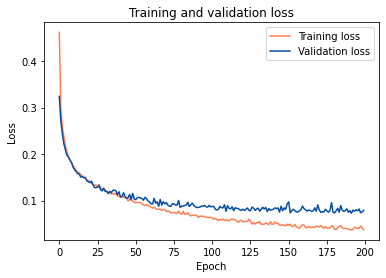

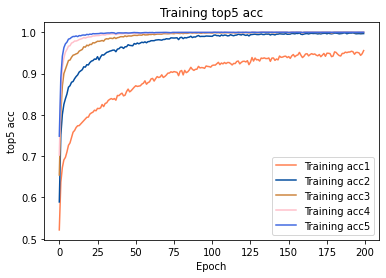

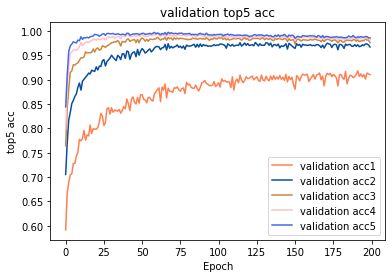

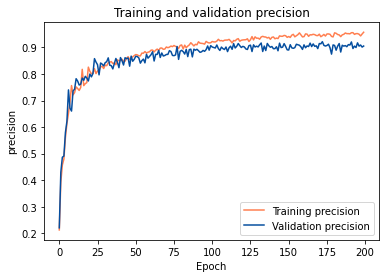

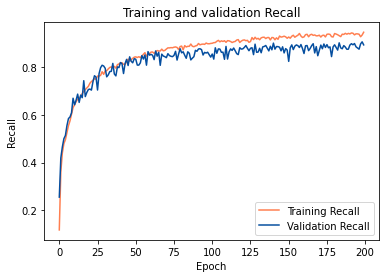

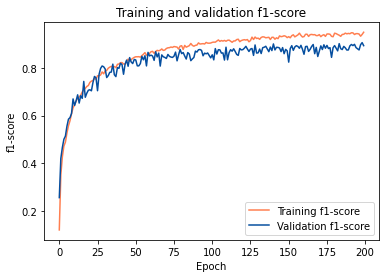

In [78]:
# training for 3 epochs
n_epochs = 200
train(capsule_net, criterion, optimizer, n_epochs=n_epochs)


### flod1(train) 

-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.4735 	 valid Loss: 0.3346
train acc1: 0.5045 	 valid acc1: 0.5739
train acc2: 0.5710 	 valid acc2: 0.6807
train acc3: 0.6306 	 valid acc3: 0.7675
train acc4: 0.6823 	 valid acc4: 0.8107
train acc5: 0.7315 	 valid acc5: 0.8907
train precision: 0.1604 	 valid precision: 0.2056
train recall: 0.1044 	 valid recall: 0.2241
train f1-score: 0.0940 	 valid f1-score: 0.1733
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2960 	 valid Loss: 0.2774
train acc1: 0.6433 	 valid acc1: 0.6639
train acc2: 0.7512 	 valid acc2: 0.7536
train acc3: 0.8170 	 valid acc3: 0.8425
train acc4: 0.8588 	 valid acc4: 0.8804
train acc5: 0.8921 	 valid acc5: 0.9171
train precision: 0.4014 	 valid precision: 0.4280
train recall: 0.3786 	 valid recall: 0.4292
train f1-score: 0.3696 	 valid f1-score: 0.4130
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2613 	 valid Loss: 0.2571
train acc1: 0.6782 	 valid acc1: 0.6764
train acc2: 0.7938 	 valid acc2: 0.7982
train acc3: 0.8569 	 valid acc3: 0.8682
train acc4: 0.9027 	 valid acc4: 0.9000
train acc5: 0.9313 	 valid acc5: 0.9393
train precision: 0.4440 	 valid precision: 0.4414
train recall: 0.4546 	 valid recall: 0.4570
train f1-score: 0.4417 	 valid f1-score: 0.4433
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2445 	 valid Loss: 0.2447
train acc1: 0.6904 	 valid acc1: 0.6936
train acc2: 0.8127 	 valid acc2: 0.7986
train acc3: 0.8790 	 valid acc3: 0.8771
train acc4: 0.9200 	 valid acc4: 0.9239
train acc5: 0.9498 	 valid acc5: 0.9504
train precision: 0.4900 	 valid precision: 0.4817
train recall: 0.4800 	 valid recall: 0.4905
train f1-score: 0.4741 	 valid f1-score: 0.4803
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2280 	 valid Loss: 0.2229
train acc1: 0.6977 	 valid acc1: 0.6871
train acc2: 0.8307 	 valid acc2: 0.8396
train acc3: 0.9000 	 valid acc3: 0.9018
train acc4: 0.9388 	 valid acc4: 0.9418
train acc5: 0.9648 	 valid acc5: 0.9636
train precision: 0.5014 	 valid precision: 0.5537
train recall: 0.4967 	 valid recall: 0.4789
train f1-score: 0.4876 	 valid f1-score: 0.4725
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2118 	 valid Loss: 0.2064
train acc1: 0.7083 	 valid acc1: 0.7089
train acc2: 0.8475 	 valid acc2: 0.8579
train acc3: 0.9171 	 valid acc3: 0.9125
train acc4: 0.9538 	 valid acc4: 0.9582
train acc5: 0.9701 	 valid acc5: 0.9764
train precision: 0.6240 	 valid precision: 0.5751
train recall: 0.5184 	 valid recall: 0.5230
train f1-score: 0.5192 	 valid f1-score: 0.5295
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1986 	 valid Loss: 0.1981
train acc1: 0.7207 	 valid acc1: 0.7150
train acc2: 0.8650 	 valid acc2: 0.8671
train acc3: 0.9294 	 valid acc3: 0.9332
train acc4: 0.9596 	 valid acc4: 0.9614
train acc5: 0.9776 	 valid acc5: 0.9761
train precision: 0.6860 	 valid precision: 0.6185
train recall: 0.5458 	 valid recall: 0.5361
train f1-score: 0.5479 	 valid f1-score: 0.5425
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1874 	 valid Loss: 0.1911
train acc1: 0.7313 	 valid acc1: 0.7286
train acc2: 0.8739 	 valid acc2: 0.8668
train acc3: 0.9406 	 valid acc3: 0.9332
train acc4: 0.9658 	 valid acc4: 0.9625
train acc5: 0.9818 	 valid acc5: 0.9754
train precision: 0.6891 	 valid precision: 0.7034
train recall: 0.5694 	 valid recall: 0.5951
train f1-score: 0.5790 	 valid f1-score: 0.5922
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1791 	 valid Loss: 0.1847
train acc1: 0.7474 	 valid acc1: 0.7450
train acc2: 0.8863 	 valid acc2: 0.8711
train acc3: 0.9443 	 valid acc3: 0.9264
train acc4: 0.9704 	 valid acc4: 0.9629
train acc5: 0.9829 	 valid acc5: 0.9796
train precision: 0.7697 	 valid precision: 0.6946
train recall: 0.6007 	 valid recall: 0.6002
train f1-score: 0.6112 	 valid f1-score: 0.6042
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1708 	 valid Loss: 0.1700
train acc1: 0.7602 	 valid acc1: 0.7579
train acc2: 0.8937 	 valid acc2: 0.8918
train acc3: 0.9481 	 valid acc3: 0.9546
train acc4: 0.9719 	 valid acc4: 0.9811
train acc5: 0.9882 	 valid acc5: 0.9907
train precision: 0.7420 	 valid precision: 0.7650
train recall: 0.6345 	 valid recall: 0.6343
train f1-score: 0.6420 	 valid f1-score: 0.6401
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1652 	 valid Loss: 0.1674
train acc1: 0.7661 	 valid acc1: 0.7736
train acc2: 0.8979 	 valid acc2: 0.8996
train acc3: 0.9562 	 valid acc3: 0.9493
train acc4: 0.9785 	 valid acc4: 0.9779
train acc5: 0.9911 	 valid acc5: 0.9896
train precision: 0.7645 	 valid precision: 0.7682
train recall: 0.6463 	 valid recall: 0.6726
train f1-score: 0.6580 	 valid f1-score: 0.6720
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1594 	 valid Loss: 0.1672
train acc1: 0.7756 	 valid acc1: 0.7700
train acc2: 0.9039 	 valid acc2: 0.8936
train acc3: 0.9545 	 valid acc3: 0.9436
train acc4: 0.9782 	 valid acc4: 0.9779
train acc5: 0.9899 	 valid acc5: 0.9911
train precision: 0.7620 	 valid precision: 0.7495
train recall: 0.6671 	 valid recall: 0.6782
train f1-score: 0.6782 	 valid f1-score: 0.6803
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1551 	 valid Loss: 0.1616
train acc1: 0.7820 	 valid acc1: 0.7632
train acc2: 0.9062 	 valid acc2: 0.9018
train acc3: 0.9596 	 valid acc3: 0.9507
train acc4: 0.9817 	 valid acc4: 0.9804
train acc5: 0.9930 	 valid acc5: 0.9918
train precision: 0.7717 	 valid precision: 0.7699
train recall: 0.6833 	 valid recall: 0.6334
train f1-score: 0.6992 	 valid f1-score: 0.6422
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1485 	 valid Loss: 0.1503
train acc1: 0.7906 	 valid acc1: 0.7950
train acc2: 0.9185 	 valid acc2: 0.9132
train acc3: 0.9631 	 valid acc3: 0.9611
train acc4: 0.9861 	 valid acc4: 0.9850
train acc5: 0.9944 	 valid acc5: 0.9925
train precision: 0.8088 	 valid precision: 0.7807
train recall: 0.6957 	 valid recall: 0.7074
train f1-score: 0.7124 	 valid f1-score: 0.7125
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1468 	 valid Loss: 0.1477
train acc1: 0.7940 	 valid acc1: 0.7950
train acc2: 0.9188 	 valid acc2: 0.9186
train acc3: 0.9643 	 valid acc3: 0.9636
train acc4: 0.9852 	 valid acc4: 0.9879
train acc5: 0.9940 	 valid acc5: 0.9936
train precision: 0.8119 	 valid precision: 0.7822
train recall: 0.7078 	 valid recall: 0.7096
train f1-score: 0.7234 	 valid f1-score: 0.7170
-------第 16 轮训练开始-------
train Loss: 0.1414 	 valid Loss: 0.1433
train acc1: 0.8031 	 valid acc1: 0.8061
train acc2: 0.9242 	 valid acc2: 0.9229
train acc3: 0.9669 	 valid acc3: 0.9707
train acc4: 0.9870 	 valid acc4: 0.9846
train acc5: 0.9949 	 valid acc5: 0.9939
train precision: 0.8319 	 valid precision: 0.8555
train recall: 0.7252 	 valid recall: 0.7216
train f1-score: 0.7377 	 valid f1-score: 0.7366
-------第 17 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1411 	 valid Loss: 0.1446
train acc1: 0.8002 	 valid acc1: 0.8061
train acc2: 0.9242 	 valid acc2: 0.9239
train acc3: 0.9688 	 valid acc3: 0.9686
train acc4: 0.9874 	 valid acc4: 0.9843
train acc5: 0.9948 	 valid acc5: 0.9911
train precision: 0.8136 	 valid precision: 0.7848
train recall: 0.7220 	 valid recall: 0.7308
train f1-score: 0.7357 	 valid f1-score: 0.7346
-------第 18 轮训练开始-------
train Loss: 0.1363 	 valid Loss: 0.1415
train acc1: 0.8089 	 valid acc1: 0.8004
train acc2: 0.9275 	 valid acc2: 0.9300
train acc3: 0.9717 	 valid acc3: 0.9675
train acc4: 0.9888 	 valid acc4: 0.9868
train acc5: 0.9962 	 valid acc5: 0.9918
train precision: 0.8199 	 valid precision: 0.8608
train recall: 0.7397 	 valid recall: 0.7127
train f1-score: 0.7512 	 valid f1-score: 0.7357
-------第 19 轮训练开始-------
train Loss: 0.1351 	 valid Loss: 0.1412
train acc1: 0.8101 	 valid acc1: 0.7979
train acc2: 0.9298 	 valid acc2: 0.9268
train acc3: 0.9749 	 valid acc3: 0.9693
train acc4: 0.9901 	 valid

train Loss: 0.1009 	 valid Loss: 0.1138
train acc1: 0.8601 	 valid acc1: 0.8439
train acc2: 0.9640 	 valid acc2: 0.9532
train acc3: 0.9894 	 valid acc3: 0.9786
train acc4: 0.9965 	 valid acc4: 0.9921
train acc5: 0.9990 	 valid acc5: 0.9950
train precision: 0.8660 	 valid precision: 0.8567
train recall: 0.8337 	 valid recall: 0.8169
train f1-score: 0.8365 	 valid f1-score: 0.8218
-------第 39 轮训练开始-------
train Loss: 0.1022 	 valid Loss: 0.1169
train acc1: 0.8573 	 valid acc1: 0.8443
train acc2: 0.9642 	 valid acc2: 0.9439
train acc3: 0.9886 	 valid acc3: 0.9757
train acc4: 0.9961 	 valid acc4: 0.9900
train acc5: 0.9983 	 valid acc5: 0.9939
train precision: 0.8628 	 valid precision: 0.8505
train recall: 0.8254 	 valid recall: 0.8026
train f1-score: 0.8318 	 valid f1-score: 0.8153
-------第 40 轮训练开始-------
train Loss: 0.1033 	 valid Loss: 0.1250
train acc1: 0.8579 	 valid acc1: 0.8257
train acc2: 0.9637 	 valid acc2: 0.9404
train acc3: 0.9873 	 valid acc3: 0.9732
train acc4: 0.9957 	 valid

train Loss: 0.0821 	 valid Loss: 0.1044
train acc1: 0.8851 	 valid acc1: 0.8571
train acc2: 0.9786 	 valid acc2: 0.9589
train acc3: 0.9952 	 valid acc3: 0.9814
train acc4: 0.9989 	 valid acc4: 0.9904
train acc5: 0.9995 	 valid acc5: 0.9954
train precision: 0.8914 	 valid precision: 0.8653
train recall: 0.8683 	 valid recall: 0.8252
train f1-score: 0.8725 	 valid f1-score: 0.8349
-------第 60 轮训练开始-------
train Loss: 0.0836 	 valid Loss: 0.1195
train acc1: 0.8832 	 valid acc1: 0.8357
train acc2: 0.9764 	 valid acc2: 0.9493
train acc3: 0.9942 	 valid acc3: 0.9764
train acc4: 0.9987 	 valid acc4: 0.9861
train acc5: 0.9995 	 valid acc5: 0.9904
train precision: 0.8904 	 valid precision: 0.8325
train recall: 0.8617 	 valid recall: 0.8184
train f1-score: 0.8683 	 valid f1-score: 0.8135
-------第 61 轮训练开始-------
train Loss: 0.0816 	 valid Loss: 0.1020
train acc1: 0.8856 	 valid acc1: 0.8654
train acc2: 0.9789 	 valid acc2: 0.9611
train acc3: 0.9945 	 valid acc3: 0.9850
train acc4: 0.9988 	 valid

train Loss: 0.0707 	 valid Loss: 0.1011
train acc1: 0.9060 	 valid acc1: 0.8682
train acc2: 0.9865 	 valid acc2: 0.9629
train acc3: 0.9964 	 valid acc3: 0.9836
train acc4: 0.9988 	 valid acc4: 0.9918
train acc5: 0.9996 	 valid acc5: 0.9936
train precision: 0.9119 	 valid precision: 0.8638
train recall: 0.8873 	 valid recall: 0.8538
train f1-score: 0.8946 	 valid f1-score: 0.8497
-------第 81 轮训练开始-------
train Loss: 0.0711 	 valid Loss: 0.0933
train acc1: 0.9042 	 valid acc1: 0.8804
train acc2: 0.9863 	 valid acc2: 0.9686
train acc3: 0.9967 	 valid acc3: 0.9868
train acc4: 0.9990 	 valid acc4: 0.9911
train acc5: 0.9996 	 valid acc5: 0.9946
train precision: 0.9074 	 valid precision: 0.8725
train recall: 0.8879 	 valid recall: 0.8712
train f1-score: 0.8932 	 valid f1-score: 0.8660
-------第 82 轮训练开始-------
train Loss: 0.0687 	 valid Loss: 0.0982
train acc1: 0.9079 	 valid acc1: 0.8704
train acc2: 0.9860 	 valid acc2: 0.9654
train acc3: 0.9973 	 valid acc3: 0.9814
train acc4: 0.9990 	 valid

train Loss: 0.0604 	 valid Loss: 0.0891
train acc1: 0.9217 	 valid acc1: 0.8875
train acc2: 0.9893 	 valid acc2: 0.9671
train acc3: 0.9976 	 valid acc3: 0.9811
train acc4: 0.9994 	 valid acc4: 0.9896
train acc5: 0.9998 	 valid acc5: 0.9921
train precision: 0.9241 	 valid precision: 0.8924
train recall: 0.9069 	 valid recall: 0.8603
train f1-score: 0.9123 	 valid f1-score: 0.8690
-------第 102 轮训练开始-------
train Loss: 0.0585 	 valid Loss: 0.0976
train acc1: 0.9226 	 valid acc1: 0.8757
train acc2: 0.9915 	 valid acc2: 0.9643
train acc3: 0.9979 	 valid acc3: 0.9807
train acc4: 0.9994 	 valid acc4: 0.9879
train acc5: 0.9996 	 valid acc5: 0.9918
train precision: 0.9261 	 valid precision: 0.8666
train recall: 0.9070 	 valid recall: 0.8671
train f1-score: 0.9132 	 valid f1-score: 0.8650
-------第 103 轮训练开始-------
train Loss: 0.0592 	 valid Loss: 0.0902
train acc1: 0.9227 	 valid acc1: 0.8789
train acc2: 0.9901 	 valid acc2: 0.9707
train acc3: 0.9982 	 valid acc3: 0.9857
train acc4: 0.9995 	 val

train Loss: 0.0505 	 valid Loss: 0.0927
train acc1: 0.9330 	 valid acc1: 0.8764
train acc2: 0.9932 	 valid acc2: 0.9686
train acc3: 0.9990 	 valid acc3: 0.9832
train acc4: 0.9998 	 valid acc4: 0.9879
train acc5: 0.9999 	 valid acc5: 0.9911
train precision: 0.9353 	 valid precision: 0.8791
train recall: 0.9208 	 valid recall: 0.8541
train f1-score: 0.9260 	 valid f1-score: 0.8603
-------第 123 轮训练开始-------
train Loss: 0.0540 	 valid Loss: 0.0951
train acc1: 0.9304 	 valid acc1: 0.8789
train acc2: 0.9930 	 valid acc2: 0.9700
train acc3: 0.9987 	 valid acc3: 0.9850
train acc4: 0.9995 	 valid acc4: 0.9896
train acc5: 0.9996 	 valid acc5: 0.9936
train precision: 0.9325 	 valid precision: 0.8718
train recall: 0.9179 	 valid recall: 0.8722
train f1-score: 0.9233 	 valid f1-score: 0.8683
-------第 124 轮训练开始-------
train Loss: 0.0509 	 valid Loss: 0.0890
train acc1: 0.9335 	 valid acc1: 0.8914
train acc2: 0.9938 	 valid acc2: 0.9661
train acc3: 0.9989 	 valid acc3: 0.9832
train acc4: 0.9996 	 val

train Loss: 0.0497 	 valid Loss: 0.0832
train acc1: 0.9379 	 valid acc1: 0.8925
train acc2: 0.9942 	 valid acc2: 0.9729
train acc3: 0.9992 	 valid acc3: 0.9893
train acc4: 0.9995 	 valid acc4: 0.9904
train acc5: 0.9999 	 valid acc5: 0.9929
train precision: 0.9404 	 valid precision: 0.9008
train recall: 0.9261 	 valid recall: 0.8705
train f1-score: 0.9315 	 valid f1-score: 0.8816
-------第 144 轮训练开始-------
train Loss: 0.0470 	 valid Loss: 0.0802
train acc1: 0.9410 	 valid acc1: 0.9046
train acc2: 0.9942 	 valid acc2: 0.9736
train acc3: 0.9986 	 valid acc3: 0.9832
train acc4: 0.9992 	 valid acc4: 0.9871
train acc5: 0.9995 	 valid acc5: 0.9918
train precision: 0.9401 	 valid precision: 0.9082
train recall: 0.9295 	 valid recall: 0.8897
train f1-score: 0.9330 	 valid f1-score: 0.8943
-------第 145 轮训练开始-------
train Loss: 0.0487 	 valid Loss: 0.0896
train acc1: 0.9367 	 valid acc1: 0.8843
train acc2: 0.9954 	 valid acc2: 0.9704
train acc3: 0.9990 	 valid acc3: 0.9839
train acc4: 0.9998 	 val

train Loss: 0.0373 	 valid Loss: 0.0845
train acc1: 0.9537 	 valid acc1: 0.8975
train acc2: 0.9976 	 valid acc2: 0.9725
train acc3: 0.9999 	 valid acc3: 0.9825
train acc4: 1.0000 	 valid acc4: 0.9854
train acc5: 1.0000 	 valid acc5: 0.9882
train precision: 0.9541 	 valid precision: 0.8911
train recall: 0.9450 	 valid recall: 0.8938
train f1-score: 0.9483 	 valid f1-score: 0.8909
-------第 165 轮训练开始-------
train Loss: 0.0411 	 valid Loss: 0.0917
train acc1: 0.9498 	 valid acc1: 0.8918
train acc2: 0.9975 	 valid acc2: 0.9639
train acc3: 0.9996 	 valid acc3: 0.9789
train acc4: 1.0000 	 valid acc4: 0.9864
train acc5: 1.0000 	 valid acc5: 0.9886
train precision: 0.9507 	 valid precision: 0.8817
train recall: 0.9403 	 valid recall: 0.8866
train f1-score: 0.9443 	 valid f1-score: 0.8806
-------第 166 轮训练开始-------
train Loss: 0.0440 	 valid Loss: 0.0914
train acc1: 0.9445 	 valid acc1: 0.8907
train acc2: 0.9954 	 valid acc2: 0.9654
train acc3: 0.9995 	 valid acc3: 0.9818
train acc4: 0.9999 	 val

train Loss: 0.0384 	 valid Loss: 0.0821
train acc1: 0.9540 	 valid acc1: 0.8950
train acc2: 0.9970 	 valid acc2: 0.9736
train acc3: 0.9995 	 valid acc3: 0.9839
train acc4: 0.9999 	 valid acc4: 0.9882
train acc5: 0.9999 	 valid acc5: 0.9911
train precision: 0.9556 	 valid precision: 0.8974
train recall: 0.9450 	 valid recall: 0.8803
train f1-score: 0.9492 	 valid f1-score: 0.8861
-------第 186 轮训练开始-------
train Loss: 0.0379 	 valid Loss: 0.0838
train acc1: 0.9533 	 valid acc1: 0.8986
train acc2: 0.9976 	 valid acc2: 0.9714
train acc3: 0.9998 	 valid acc3: 0.9811
train acc4: 0.9999 	 valid acc4: 0.9861
train acc5: 0.9999 	 valid acc5: 0.9889
train precision: 0.9541 	 valid precision: 0.9111
train recall: 0.9457 	 valid recall: 0.8766
train f1-score: 0.9489 	 valid f1-score: 0.8902
-------第 187 轮训练开始-------
train Loss: 0.0407 	 valid Loss: 0.0845
train acc1: 0.9523 	 valid acc1: 0.8925
train acc2: 0.9970 	 valid acc2: 0.9700
train acc3: 0.9998 	 valid acc3: 0.9850
train acc4: 1.0000 	 val

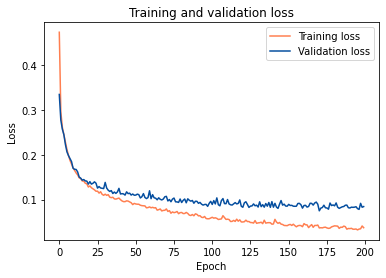

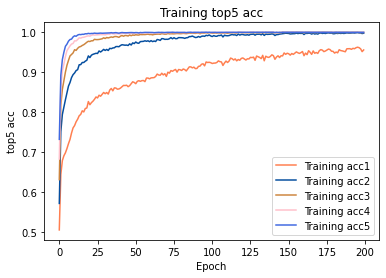

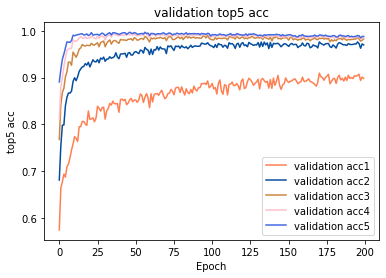

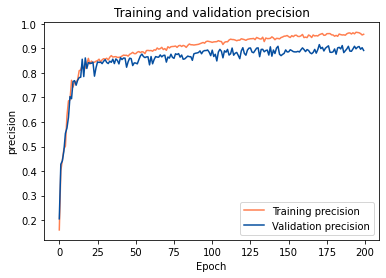

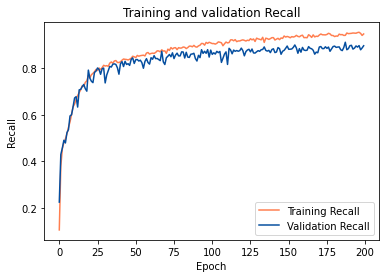

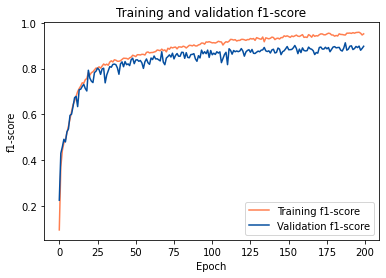

In [112]:
# training for 3 epochs
n_epochs = 200
train(capsule_net, criterion, optimizer, n_epochs=n_epochs)

### flod2(train)

-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.4582 	 valid Loss: 0.3299
train acc1: 0.5295 	 valid acc1: 0.6025
train acc2: 0.6155 	 valid acc2: 0.6871
train acc3: 0.6757 	 valid acc3: 0.7621
train acc4: 0.7358 	 valid acc4: 0.8046
train acc5: 0.7845 	 valid acc5: 0.8589
train precision: 0.1888 	 valid precision: 0.2694
train recall: 0.1264 	 valid recall: 0.3155
train f1-score: 0.1236 	 valid f1-score: 0.2525
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2871 	 valid Loss: 0.2759
train acc1: 0.6524 	 valid acc1: 0.6571
train acc2: 0.7644 	 valid acc2: 0.7939
train acc3: 0.8264 	 valid acc3: 0.8611
train acc4: 0.8685 	 valid acc4: 0.9007
train acc5: 0.9052 	 valid acc5: 0.9375
train precision: 0.4389 	 valid precision: 0.4530
train recall: 0.3842 	 valid recall: 0.4347
train f1-score: 0.3655 	 valid f1-score: 0.4243
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2552 	 valid Loss: 0.2555
train acc1: 0.6870 	 valid acc1: 0.6821
train acc2: 0.8093 	 valid acc2: 0.8125
train acc3: 0.8765 	 valid acc3: 0.8850
train acc4: 0.9157 	 valid acc4: 0.9218
train acc5: 0.9444 	 valid acc5: 0.9471
train precision: 0.4640 	 valid precision: 0.4745
train recall: 0.4599 	 valid recall: 0.4883
train f1-score: 0.4508 	 valid f1-score: 0.4757
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2368 	 valid Loss: 0.2375
train acc1: 0.6973 	 valid acc1: 0.6854
train acc2: 0.8274 	 valid acc2: 0.8246
train acc3: 0.8982 	 valid acc3: 0.9057
train acc4: 0.9351 	 valid acc4: 0.9500
train acc5: 0.9612 	 valid acc5: 0.9732
train precision: 0.4767 	 valid precision: 0.4819
train recall: 0.4852 	 valid recall: 0.5016
train f1-score: 0.4757 	 valid f1-score: 0.4878
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2204 	 valid Loss: 0.2243
train acc1: 0.7015 	 valid acc1: 0.6850
train acc2: 0.8468 	 valid acc2: 0.8421
train acc3: 0.9108 	 valid acc3: 0.9104
train acc4: 0.9514 	 valid acc4: 0.9468
train acc5: 0.9707 	 valid acc5: 0.9686
train precision: 0.4812 	 valid precision: 0.4822
train recall: 0.4943 	 valid recall: 0.4945
train f1-score: 0.4839 	 valid f1-score: 0.4848
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2067 	 valid Loss: 0.2115
train acc1: 0.7065 	 valid acc1: 0.6975
train acc2: 0.8565 	 valid acc2: 0.8443
train acc3: 0.9223 	 valid acc3: 0.9154
train acc4: 0.9581 	 valid acc4: 0.9568
train acc5: 0.9776 	 valid acc5: 0.9775
train precision: 0.6130 	 valid precision: 0.6245
train recall: 0.5061 	 valid recall: 0.5216
train f1-score: 0.4993 	 valid f1-score: 0.5109
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1932 	 valid Loss: 0.1952
train acc1: 0.7188 	 valid acc1: 0.7150
train acc2: 0.8701 	 valid acc2: 0.8618
train acc3: 0.9330 	 valid acc3: 0.9314
train acc4: 0.9657 	 valid acc4: 0.9675
train acc5: 0.9815 	 valid acc5: 0.9868
train precision: 0.6163 	 valid precision: 0.6339
train recall: 0.5364 	 valid recall: 0.5501
train f1-score: 0.5419 	 valid f1-score: 0.5544
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1807 	 valid Loss: 0.1865
train acc1: 0.7387 	 valid acc1: 0.7361
train acc2: 0.8807 	 valid acc2: 0.8739
train acc3: 0.9411 	 valid acc3: 0.9386
train acc4: 0.9730 	 valid acc4: 0.9746
train acc5: 0.9882 	 valid acc5: 0.9879
train precision: 0.6675 	 valid precision: 0.7502
train recall: 0.5754 	 valid recall: 0.6048
train f1-score: 0.5845 	 valid f1-score: 0.6167
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1730 	 valid Loss: 0.1797
train acc1: 0.7574 	 valid acc1: 0.7489
train acc2: 0.8895 	 valid acc2: 0.8832
train acc3: 0.9461 	 valid acc3: 0.9432
train acc4: 0.9754 	 valid acc4: 0.9750
train acc5: 0.9893 	 valid acc5: 0.9861
train precision: 0.7396 	 valid precision: 0.7495
train recall: 0.6206 	 valid recall: 0.6298
train f1-score: 0.6309 	 valid f1-score: 0.6241
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1682 	 valid Loss: 0.1745
train acc1: 0.7695 	 valid acc1: 0.7621
train acc2: 0.8936 	 valid acc2: 0.8836
train acc3: 0.9480 	 valid acc3: 0.9489
train acc4: 0.9777 	 valid acc4: 0.9754
train acc5: 0.9894 	 valid acc5: 0.9875
train precision: 0.7631 	 valid precision: 0.7826
train recall: 0.6460 	 valid recall: 0.6682
train f1-score: 0.6540 	 valid f1-score: 0.6711
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1653 	 valid Loss: 0.1753
train acc1: 0.7710 	 valid acc1: 0.7479
train acc2: 0.8942 	 valid acc2: 0.8900
train acc3: 0.9493 	 valid acc3: 0.9482
train acc4: 0.9765 	 valid acc4: 0.9775
train acc5: 0.9886 	 valid acc5: 0.9900
train precision: 0.7453 	 valid precision: 0.7269
train recall: 0.6558 	 valid recall: 0.6320
train f1-score: 0.6667 	 valid f1-score: 0.6417
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1590 	 valid Loss: 0.1680
train acc1: 0.7756 	 valid acc1: 0.7586
train acc2: 0.9032 	 valid acc2: 0.8946
train acc3: 0.9549 	 valid acc3: 0.9575
train acc4: 0.9805 	 valid acc4: 0.9850
train acc5: 0.9919 	 valid acc5: 0.9914
train precision: 0.7528 	 valid precision: 0.7640
train recall: 0.6659 	 valid recall: 0.6574
train f1-score: 0.6736 	 valid f1-score: 0.6622
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1547 	 valid Loss: 0.1667
train acc1: 0.7857 	 valid acc1: 0.7664
train acc2: 0.9083 	 valid acc2: 0.8968
train acc3: 0.9576 	 valid acc3: 0.9450
train acc4: 0.9820 	 valid acc4: 0.9789
train acc5: 0.9920 	 valid acc5: 0.9896
train precision: 0.7702 	 valid precision: 0.7721
train recall: 0.6847 	 valid recall: 0.6748
train f1-score: 0.6956 	 valid f1-score: 0.6864
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1511 	 valid Loss: 0.1632
train acc1: 0.7876 	 valid acc1: 0.7700
train acc2: 0.9083 	 valid acc2: 0.8993
train acc3: 0.9581 	 valid acc3: 0.9571
train acc4: 0.9833 	 valid acc4: 0.9854
train acc5: 0.9927 	 valid acc5: 0.9904
train precision: 0.7771 	 valid precision: 0.7890
train recall: 0.6893 	 valid recall: 0.6696
train f1-score: 0.6996 	 valid f1-score: 0.6909
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1503 	 valid Loss: 0.1611
train acc1: 0.7887 	 valid acc1: 0.7818
train acc2: 0.9085 	 valid acc2: 0.8993
train acc3: 0.9606 	 valid acc3: 0.9511
train acc4: 0.9826 	 valid acc4: 0.9771
train acc5: 0.9915 	 valid acc5: 0.9896
train precision: 0.7579 	 valid precision: 0.7647
train recall: 0.6921 	 valid recall: 0.7044
train f1-score: 0.7029 	 valid f1-score: 0.6947
-------第 16 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1446 	 valid Loss: 0.1682
train acc1: 0.7995 	 valid acc1: 0.7679
train acc2: 0.9158 	 valid acc2: 0.8907
train acc3: 0.9621 	 valid acc3: 0.9504
train acc4: 0.9846 	 valid acc4: 0.9754
train acc5: 0.9937 	 valid acc5: 0.9886
train precision: 0.7655 	 valid precision: 0.7862
train recall: 0.7100 	 valid recall: 0.6629
train f1-score: 0.7198 	 valid f1-score: 0.6703
-------第 17 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1431 	 valid Loss: 0.1634
train acc1: 0.7964 	 valid acc1: 0.7846
train acc2: 0.9124 	 valid acc2: 0.8964
train acc3: 0.9595 	 valid acc3: 0.9454
train acc4: 0.9844 	 valid acc4: 0.9700
train acc5: 0.9925 	 valid acc5: 0.9871
train precision: 0.7750 	 valid precision: 0.7641
train recall: 0.7065 	 valid recall: 0.7143
train f1-score: 0.7180 	 valid f1-score: 0.7218
-------第 18 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1397 	 valid Loss: 0.1553
train acc1: 0.8049 	 valid acc1: 0.7757
train acc2: 0.9168 	 valid acc2: 0.9125
train acc3: 0.9650 	 valid acc3: 0.9582
train acc4: 0.9851 	 valid acc4: 0.9846
train acc5: 0.9942 	 valid acc5: 0.9929
train precision: 0.7774 	 valid precision: 0.7757
train recall: 0.7236 	 valid recall: 0.6834
train f1-score: 0.7337 	 valid f1-score: 0.7046
-------第 19 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1407 	 valid Loss: 0.1606
train acc1: 0.8013 	 valid acc1: 0.7757
train acc2: 0.9198 	 valid acc2: 0.9089
train acc3: 0.9660 	 valid acc3: 0.9500
train acc4: 0.9869 	 valid acc4: 0.9736
train acc5: 0.9945 	 valid acc5: 0.9871
train precision: 0.7735 	 valid precision: 0.7394
train recall: 0.7224 	 valid recall: 0.7484
train f1-score: 0.7316 	 valid f1-score: 0.7290
-------第 20 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1370 	 valid Loss: 0.1493
train acc1: 0.8077 	 valid acc1: 0.7936
train acc2: 0.9245 	 valid acc2: 0.9096
train acc3: 0.9668 	 valid acc3: 0.9575
train acc4: 0.9861 	 valid acc4: 0.9818
train acc5: 0.9952 	 valid acc5: 0.9921
train precision: 0.8393 	 valid precision: 0.7658
train recall: 0.7306 	 valid recall: 0.7342
train f1-score: 0.7403 	 valid f1-score: 0.7417
-------第 21 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1365 	 valid Loss: 0.1559
train acc1: 0.8057 	 valid acc1: 0.7761
train acc2: 0.9260 	 valid acc2: 0.9204
train acc3: 0.9675 	 valid acc3: 0.9611
train acc4: 0.9869 	 valid acc4: 0.9836
train acc5: 0.9954 	 valid acc5: 0.9954
train precision: 0.8349 	 valid precision: 0.7797
train recall: 0.7296 	 valid recall: 0.6803
train f1-score: 0.7378 	 valid f1-score: 0.7071
-------第 22 轮训练开始-------
train Loss: 0.1337 	 valid Loss: 0.1481
train acc1: 0.8126 	 valid acc1: 0.7939
train acc2: 0.9274 	 valid acc2: 0.9121
train acc3: 0.9712 	 valid acc3: 0.9625
train acc4: 0.9894 	 valid acc4: 0.9861
train acc5: 0.9965 	 valid acc5: 0.9946
train precision: 0.8412 	 valid precision: 0.7977
train recall: 0.7451 	 valid recall: 0.7303
train f1-score: 0.7514 	 valid f1-score: 0.7457
-------第 23 轮训练开始-------
train Loss: 0.1322 	 valid Loss: 0.1488
train acc1: 0.8151 	 valid acc1: 0.7971
train acc2: 0.9299 	 valid acc2: 0.9157
train acc3: 0.9704 	 valid acc3: 0.9693
train acc4: 0.9892 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1299 	 valid Loss: 0.1458
train acc1: 0.8187 	 valid acc1: 0.7968
train acc2: 0.9301 	 valid acc2: 0.9150
train acc3: 0.9744 	 valid acc3: 0.9679
train acc4: 0.9927 	 valid acc4: 0.9871
train acc5: 0.9976 	 valid acc5: 0.9954
train precision: 0.8090 	 valid precision: 0.7785
train recall: 0.7585 	 valid recall: 0.7290
train f1-score: 0.7616 	 valid f1-score: 0.7345
-------第 26 轮训练开始-------
train Loss: 0.1261 	 valid Loss: 0.1385
train acc1: 0.8223 	 valid acc1: 0.8114
train acc2: 0.9344 	 valid acc2: 0.9264
train acc3: 0.9727 	 valid acc3: 0.9711
train acc4: 0.9920 	 valid acc4: 0.9893
train acc5: 0.9975 	 valid acc5: 0.9932
train precision: 0.8538 	 valid precision: 0.8029
train recall: 0.7627 	 valid recall: 0.7706
train f1-score: 0.7680 	 valid f1-score: 0.7654
-------第 27 轮训练开始-------
train Loss: 0.1232 	 valid Loss: 0.1393
train acc1: 0.8308 	 valid acc1: 0.8139
train acc2: 0.9379 	 valid acc2: 0.9282
train acc3: 0.9770 	 valid acc3: 0.9736
train acc4: 0.9926 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1260 	 valid Loss: 0.1389
train acc1: 0.8240 	 valid acc1: 0.8107
train acc2: 0.9401 	 valid acc2: 0.9318
train acc3: 0.9779 	 valid acc3: 0.9664
train acc4: 0.9932 	 valid acc4: 0.9839
train acc5: 0.9977 	 valid acc5: 0.9932
train precision: 0.8321 	 valid precision: 0.8008
train recall: 0.7648 	 valid recall: 0.7572
train f1-score: 0.7696 	 valid f1-score: 0.7607
-------第 29 轮训练开始-------
train Loss: 0.1207 	 valid Loss: 0.1360
train acc1: 0.8314 	 valid acc1: 0.8150
train acc2: 0.9425 	 valid acc2: 0.9325
train acc3: 0.9796 	 valid acc3: 0.9689
train acc4: 0.9925 	 valid acc4: 0.9893
train acc5: 0.9977 	 valid acc5: 0.9954
train precision: 0.8394 	 valid precision: 0.7867
train recall: 0.7766 	 valid recall: 0.7746
train f1-score: 0.7820 	 valid f1-score: 0.7700
-------第 30 轮训练开始-------
train Loss: 0.1207 	 valid Loss: 0.1358
train acc1: 0.8307 	 valid acc1: 0.8107
train acc2: 0.9450 	 valid acc2: 0.9300
train acc3: 0.9782 	 valid acc3: 0.9700
train acc4: 0.9939 	 valid

train Loss: 0.1006 	 valid Loss: 0.1217
train acc1: 0.8600 	 valid acc1: 0.8307
train acc2: 0.9650 	 valid acc2: 0.9432
train acc3: 0.9912 	 valid acc3: 0.9775
train acc4: 0.9971 	 valid acc4: 0.9893
train acc5: 0.9994 	 valid acc5: 0.9954
train precision: 0.8642 	 valid precision: 0.8357
train recall: 0.8277 	 valid recall: 0.8069
train f1-score: 0.8322 	 valid f1-score: 0.8011
-------第 50 轮训练开始-------
train Loss: 0.1005 	 valid Loss: 0.1234
train acc1: 0.8635 	 valid acc1: 0.8325
train acc2: 0.9644 	 valid acc2: 0.9454
train acc3: 0.9888 	 valid acc3: 0.9782
train acc4: 0.9979 	 valid acc4: 0.9936
train acc5: 0.9994 	 valid acc5: 0.9957
train precision: 0.8678 	 valid precision: 0.8280
train recall: 0.8258 	 valid recall: 0.8102
train f1-score: 0.8339 	 valid f1-score: 0.8008
-------第 51 轮训练开始-------
train Loss: 0.0976 	 valid Loss: 0.1207
train acc1: 0.8661 	 valid acc1: 0.8339
train acc2: 0.9665 	 valid acc2: 0.9471
train acc3: 0.9904 	 valid acc3: 0.9746
train acc4: 0.9976 	 valid

train Loss: 0.0839 	 valid Loss: 0.1074
train acc1: 0.8862 	 valid acc1: 0.8543
train acc2: 0.9788 	 valid acc2: 0.9543
train acc3: 0.9946 	 valid acc3: 0.9829
train acc4: 0.9986 	 valid acc4: 0.9921
train acc5: 0.9994 	 valid acc5: 0.9943
train precision: 0.8868 	 valid precision: 0.8701
train recall: 0.8623 	 valid recall: 0.8183
train f1-score: 0.8670 	 valid f1-score: 0.8246
-------第 71 轮训练开始-------
train Loss: 0.0831 	 valid Loss: 0.1105
train acc1: 0.8894 	 valid acc1: 0.8471
train acc2: 0.9764 	 valid acc2: 0.9525
train acc3: 0.9930 	 valid acc3: 0.9818
train acc4: 0.9987 	 valid acc4: 0.9929
train acc5: 0.9996 	 valid acc5: 0.9961
train precision: 0.8943 	 valid precision: 0.8530
train recall: 0.8680 	 valid recall: 0.8116
train f1-score: 0.8743 	 valid f1-score: 0.8236
-------第 72 轮训练开始-------
train Loss: 0.0829 	 valid Loss: 0.1054
train acc1: 0.8846 	 valid acc1: 0.8521
train acc2: 0.9789 	 valid acc2: 0.9611
train acc3: 0.9955 	 valid acc3: 0.9857
train acc4: 0.9990 	 valid

train Loss: 0.0704 	 valid Loss: 0.1011
train acc1: 0.9044 	 valid acc1: 0.8671
train acc2: 0.9849 	 valid acc2: 0.9600
train acc3: 0.9975 	 valid acc3: 0.9821
train acc4: 0.9990 	 valid acc4: 0.9879
train acc5: 0.9998 	 valid acc5: 0.9925
train precision: 0.9071 	 valid precision: 0.8760
train recall: 0.8864 	 valid recall: 0.8377
train f1-score: 0.8925 	 valid f1-score: 0.8461
-------第 92 轮训练开始-------
train Loss: 0.0733 	 valid Loss: 0.1050
train acc1: 0.9010 	 valid acc1: 0.8604
train acc2: 0.9848 	 valid acc2: 0.9604
train acc3: 0.9965 	 valid acc3: 0.9829
train acc4: 0.9995 	 valid acc4: 0.9914
train acc5: 0.9999 	 valid acc5: 0.9943
train precision: 0.9008 	 valid precision: 0.8743
train recall: 0.8813 	 valid recall: 0.8362
train f1-score: 0.8865 	 valid f1-score: 0.8454
-------第 93 轮训练开始-------
train Loss: 0.0708 	 valid Loss: 0.0977
train acc1: 0.9049 	 valid acc1: 0.8732
train acc2: 0.9865 	 valid acc2: 0.9625
train acc3: 0.9970 	 valid acc3: 0.9829
train acc4: 0.9995 	 valid

train Loss: 0.0607 	 valid Loss: 0.0918
train acc1: 0.9211 	 valid acc1: 0.8829
train acc2: 0.9908 	 valid acc2: 0.9671
train acc3: 0.9989 	 valid acc3: 0.9843
train acc4: 0.9999 	 valid acc4: 0.9929
train acc5: 1.0000 	 valid acc5: 0.9946
train precision: 0.9250 	 valid precision: 0.8823
train recall: 0.9053 	 valid recall: 0.8656
train f1-score: 0.9121 	 valid f1-score: 0.8687
-------第 113 轮训练开始-------
train Loss: 0.0596 	 valid Loss: 0.1033
train acc1: 0.9219 	 valid acc1: 0.8654
train acc2: 0.9910 	 valid acc2: 0.9664
train acc3: 0.9986 	 valid acc3: 0.9821
train acc4: 0.9999 	 valid acc4: 0.9896
train acc5: 1.0000 	 valid acc5: 0.9932
train precision: 0.9251 	 valid precision: 0.8541
train recall: 0.9081 	 valid recall: 0.8679
train f1-score: 0.9138 	 valid f1-score: 0.8592
-------第 114 轮训练开始-------
train Loss: 0.0617 	 valid Loss: 0.1081
train acc1: 0.9181 	 valid acc1: 0.8571
train acc2: 0.9907 	 valid acc2: 0.9600
train acc3: 0.9982 	 valid acc3: 0.9782
train acc4: 0.9993 	 val

train Loss: 0.0528 	 valid Loss: 0.0968
train acc1: 0.9330 	 valid acc1: 0.8732
train acc2: 0.9960 	 valid acc2: 0.9693
train acc3: 0.9990 	 valid acc3: 0.9804
train acc4: 0.9996 	 valid acc4: 0.9861
train acc5: 1.0000 	 valid acc5: 0.9896
train precision: 0.9348 	 valid precision: 0.8792
train recall: 0.9184 	 valid recall: 0.8335
train f1-score: 0.9243 	 valid f1-score: 0.8494
-------第 134 轮训练开始-------
train Loss: 0.0545 	 valid Loss: 0.0923
train acc1: 0.9300 	 valid acc1: 0.8814
train acc2: 0.9929 	 valid acc2: 0.9693
train acc3: 0.9986 	 valid acc3: 0.9821
train acc4: 0.9998 	 valid acc4: 0.9864
train acc5: 0.9999 	 valid acc5: 0.9889
train precision: 0.9325 	 valid precision: 0.8943
train recall: 0.9158 	 valid recall: 0.8490
train f1-score: 0.9217 	 valid f1-score: 0.8672
-------第 135 轮训练开始-------
train Loss: 0.0574 	 valid Loss: 0.0910
train acc1: 0.9255 	 valid acc1: 0.8814
train acc2: 0.9933 	 valid acc2: 0.9693
train acc3: 0.9990 	 valid acc3: 0.9839
train acc4: 0.9996 	 val

train Loss: 0.0485 	 valid Loss: 0.0921
train acc1: 0.9387 	 valid acc1: 0.8818
train acc2: 0.9956 	 valid acc2: 0.9657
train acc3: 0.9994 	 valid acc3: 0.9811
train acc4: 0.9996 	 valid acc4: 0.9871
train acc5: 0.9998 	 valid acc5: 0.9893
train precision: 0.9406 	 valid precision: 0.8958
train recall: 0.9297 	 valid recall: 0.8557
train f1-score: 0.9338 	 valid f1-score: 0.8701
-------第 155 轮训练开始-------
train Loss: 0.0459 	 valid Loss: 0.0845
train acc1: 0.9396 	 valid acc1: 0.8943
train acc2: 0.9967 	 valid acc2: 0.9696
train acc3: 0.9996 	 valid acc3: 0.9846
train acc4: 0.9998 	 valid acc4: 0.9882
train acc5: 0.9998 	 valid acc5: 0.9921
train precision: 0.9427 	 valid precision: 0.8914
train recall: 0.9285 	 valid recall: 0.8849
train f1-score: 0.9336 	 valid f1-score: 0.8851
-------第 156 轮训练开始-------
train Loss: 0.0470 	 valid Loss: 0.0832
train acc1: 0.9396 	 valid acc1: 0.8993
train acc2: 0.9949 	 valid acc2: 0.9729
train acc3: 0.9992 	 valid acc3: 0.9829
train acc4: 0.9999 	 val

train Loss: 0.0495 	 valid Loss: 0.0875
train acc1: 0.9373 	 valid acc1: 0.8936
train acc2: 0.9955 	 valid acc2: 0.9725
train acc3: 0.9983 	 valid acc3: 0.9825
train acc4: 0.9993 	 valid acc4: 0.9861
train acc5: 0.9998 	 valid acc5: 0.9889
train precision: 0.9389 	 valid precision: 0.9004
train recall: 0.9253 	 valid recall: 0.8645
train f1-score: 0.9305 	 valid f1-score: 0.8783
-------第 176 轮训练开始-------
train Loss: 0.0483 	 valid Loss: 0.1016
train acc1: 0.9364 	 valid acc1: 0.8718
train acc2: 0.9956 	 valid acc2: 0.9654
train acc3: 0.9992 	 valid acc3: 0.9793
train acc4: 0.9999 	 valid acc4: 0.9846
train acc5: 1.0000 	 valid acc5: 0.9871
train precision: 0.9407 	 valid precision: 0.8601
train recall: 0.9245 	 valid recall: 0.8789
train f1-score: 0.9309 	 valid f1-score: 0.8610
-------第 177 轮训练开始-------
train Loss: 0.0476 	 valid Loss: 0.0872
train acc1: 0.9406 	 valid acc1: 0.8925
train acc2: 0.9961 	 valid acc2: 0.9682
train acc3: 0.9996 	 valid acc3: 0.9804
train acc4: 0.9999 	 val

train Loss: 0.0407 	 valid Loss: 0.0885
train acc1: 0.9500 	 valid acc1: 0.8889
train acc2: 0.9975 	 valid acc2: 0.9725
train acc3: 0.9998 	 valid acc3: 0.9839
train acc4: 1.0000 	 valid acc4: 0.9879
train acc5: 1.0000 	 valid acc5: 0.9893
train precision: 0.9507 	 valid precision: 0.9101
train recall: 0.9385 	 valid recall: 0.8474
train f1-score: 0.9436 	 valid f1-score: 0.8695
-------第 197 轮训练开始-------
train Loss: 0.0390 	 valid Loss: 0.0871
train acc1: 0.9507 	 valid acc1: 0.8936
train acc2: 0.9988 	 valid acc2: 0.9654
train acc3: 0.9999 	 valid acc3: 0.9768
train acc4: 0.9999 	 valid acc4: 0.9836
train acc5: 0.9999 	 valid acc5: 0.9857
train precision: 0.9514 	 valid precision: 0.9045
train recall: 0.9397 	 valid recall: 0.8626
train f1-score: 0.9442 	 valid f1-score: 0.8797
-------第 198 轮训练开始-------
train Loss: 0.0409 	 valid Loss: 0.0924
train acc1: 0.9464 	 valid acc1: 0.8843
train acc2: 0.9974 	 valid acc2: 0.9650
train acc3: 0.9998 	 valid acc3: 0.9764
train acc4: 0.9999 	 val

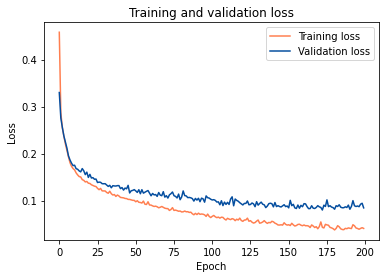

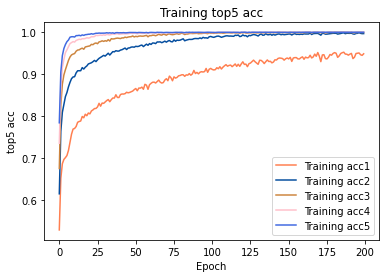

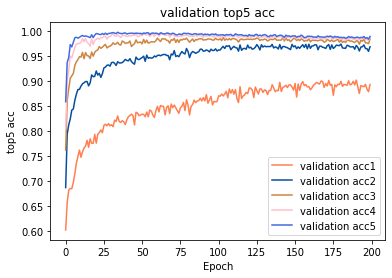

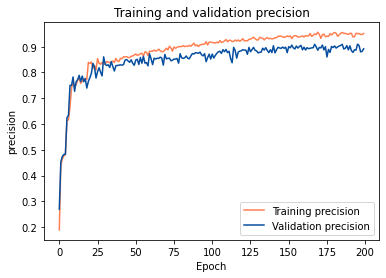

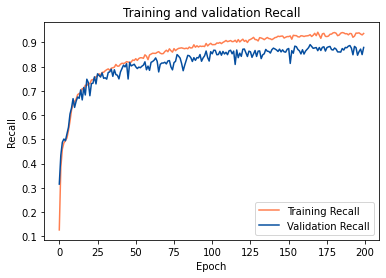

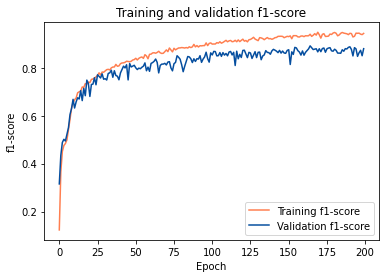

In [145]:
# training for 3 epochs
n_epochs = 200
train(capsule_net, criterion, optimizer, n_epochs=n_epochs)

### flod3(train) 

-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.4641 	 valid Loss: 0.3343
train acc1: 0.5255 	 valid acc1: 0.6032
train acc2: 0.6012 	 valid acc2: 0.6936
train acc3: 0.6526 	 valid acc3: 0.7539
train acc4: 0.7050 	 valid acc4: 0.8075
train acc5: 0.7517 	 valid acc5: 0.8404
train precision: 0.1928 	 valid precision: 0.2156
train recall: 0.1185 	 valid recall: 0.3125
train f1-score: 0.1148 	 valid f1-score: 0.2511
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2899 	 valid Loss: 0.2794
train acc1: 0.6551 	 valid acc1: 0.6586
train acc2: 0.7545 	 valid acc2: 0.7782
train acc3: 0.8115 	 valid acc3: 0.8418
train acc4: 0.8556 	 valid acc4: 0.8768
train acc5: 0.8929 	 valid acc5: 0.9161
train precision: 0.4190 	 valid precision: 0.4303
train recall: 0.3890 	 valid recall: 0.4281
train f1-score: 0.3719 	 valid f1-score: 0.4126
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2581 	 valid Loss: 0.2616
train acc1: 0.6840 	 valid acc1: 0.6693
train acc2: 0.7933 	 valid acc2: 0.7832
train acc3: 0.8606 	 valid acc3: 0.8486
train acc4: 0.9033 	 valid acc4: 0.8939
train acc5: 0.9405 	 valid acc5: 0.9296
train precision: 0.4745 	 valid precision: 0.4394
train recall: 0.4537 	 valid recall: 0.4502
train f1-score: 0.4462 	 valid f1-score: 0.4360
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2425 	 valid Loss: 0.2438
train acc1: 0.6949 	 valid acc1: 0.6725
train acc2: 0.8113 	 valid acc2: 0.8207
train acc3: 0.8862 	 valid acc3: 0.8896
train acc4: 0.9286 	 valid acc4: 0.9286
train acc5: 0.9573 	 valid acc5: 0.9586
train precision: 0.4757 	 valid precision: 0.4655
train recall: 0.4808 	 valid recall: 0.4558
train f1-score: 0.4723 	 valid f1-score: 0.4462
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2252 	 valid Loss: 0.2239
train acc1: 0.6994 	 valid acc1: 0.6814
train acc2: 0.8345 	 valid acc2: 0.8389
train acc3: 0.9079 	 valid acc3: 0.9111
train acc4: 0.9468 	 valid acc4: 0.9536
train acc5: 0.9708 	 valid acc5: 0.9732
train precision: 0.5071 	 valid precision: 0.5023
train recall: 0.4906 	 valid recall: 0.4760
train f1-score: 0.4793 	 valid f1-score: 0.4691
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2066 	 valid Loss: 0.2088
train acc1: 0.7096 	 valid acc1: 0.6950
train acc2: 0.8513 	 valid acc2: 0.8554
train acc3: 0.9248 	 valid acc3: 0.9307
train acc4: 0.9604 	 valid acc4: 0.9618
train acc5: 0.9795 	 valid acc5: 0.9729
train precision: 0.5964 	 valid precision: 0.5840
train recall: 0.5153 	 valid recall: 0.5004
train f1-score: 0.5106 	 valid f1-score: 0.4984
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1977 	 valid Loss: 0.2012
train acc1: 0.7175 	 valid acc1: 0.7071
train acc2: 0.8602 	 valid acc2: 0.8621
train acc3: 0.9321 	 valid acc3: 0.9311
train acc4: 0.9648 	 valid acc4: 0.9654
train acc5: 0.9823 	 valid acc5: 0.9818
train precision: 0.6628 	 valid precision: 0.5854
train recall: 0.5341 	 valid recall: 0.5497
train f1-score: 0.5341 	 valid f1-score: 0.5300
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1870 	 valid Loss: 0.1898
train acc1: 0.7273 	 valid acc1: 0.7196
train acc2: 0.8718 	 valid acc2: 0.8689
train acc3: 0.9377 	 valid acc3: 0.9354
train acc4: 0.9695 	 valid acc4: 0.9679
train acc5: 0.9863 	 valid acc5: 0.9829
train precision: 0.6913 	 valid precision: 0.7205
train recall: 0.5540 	 valid recall: 0.5467
train f1-score: 0.5546 	 valid f1-score: 0.5650
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1808 	 valid Loss: 0.1815
train acc1: 0.7350 	 valid acc1: 0.7314
train acc2: 0.8812 	 valid acc2: 0.8889
train acc3: 0.9448 	 valid acc3: 0.9461
train acc4: 0.9740 	 valid acc4: 0.9725
train acc5: 0.9886 	 valid acc5: 0.9861
train precision: 0.6856 	 valid precision: 0.7174
train recall: 0.5751 	 valid recall: 0.5704
train f1-score: 0.5843 	 valid f1-score: 0.5948
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1786 	 valid Loss: 0.1781
train acc1: 0.7444 	 valid acc1: 0.7421
train acc2: 0.8861 	 valid acc2: 0.8907
train acc3: 0.9468 	 valid acc3: 0.9486
train acc4: 0.9755 	 valid acc4: 0.9789
train acc5: 0.9888 	 valid acc5: 0.9864
train precision: 0.6792 	 valid precision: 0.7013
train recall: 0.5977 	 valid recall: 0.5955
train f1-score: 0.6098 	 valid f1-score: 0.6119
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1728 	 valid Loss: 0.1782
train acc1: 0.7570 	 valid acc1: 0.7625
train acc2: 0.8921 	 valid acc2: 0.8932
train acc3: 0.9531 	 valid acc3: 0.9486
train acc4: 0.9802 	 valid acc4: 0.9771
train acc5: 0.9908 	 valid acc5: 0.9889
train precision: 0.6984 	 valid precision: 0.7626
train recall: 0.6246 	 valid recall: 0.6392
train f1-score: 0.6349 	 valid f1-score: 0.6451
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1706 	 valid Loss: 0.1683
train acc1: 0.7635 	 valid acc1: 0.7625
train acc2: 0.8908 	 valid acc2: 0.9039
train acc3: 0.9460 	 valid acc3: 0.9575
train acc4: 0.9794 	 valid acc4: 0.9811
train acc5: 0.9911 	 valid acc5: 0.9893
train precision: 0.7421 	 valid precision: 0.7342
train recall: 0.6403 	 valid recall: 0.6353
train f1-score: 0.6484 	 valid f1-score: 0.6550
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1664 	 valid Loss: 0.1743
train acc1: 0.7668 	 valid acc1: 0.7529
train acc2: 0.8961 	 valid acc2: 0.8982
train acc3: 0.9508 	 valid acc3: 0.9504
train acc4: 0.9814 	 valid acc4: 0.9789
train acc5: 0.9918 	 valid acc5: 0.9893
train precision: 0.7400 	 valid precision: 0.7727
train recall: 0.6515 	 valid recall: 0.6079
train f1-score: 0.6576 	 valid f1-score: 0.6403
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1611 	 valid Loss: 0.1602
train acc1: 0.7752 	 valid acc1: 0.7739
train acc2: 0.8981 	 valid acc2: 0.9039
train acc3: 0.9549 	 valid acc3: 0.9557
train acc4: 0.9807 	 valid acc4: 0.9811
train acc5: 0.9920 	 valid acc5: 0.9900
train precision: 0.7453 	 valid precision: 0.7668
train recall: 0.6691 	 valid recall: 0.6742
train f1-score: 0.6778 	 valid f1-score: 0.6766
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1566 	 valid Loss: 0.1702
train acc1: 0.7799 	 valid acc1: 0.7679
train acc2: 0.9054 	 valid acc2: 0.8864
train acc3: 0.9560 	 valid acc3: 0.9457
train acc4: 0.9825 	 valid acc4: 0.9739
train acc5: 0.9931 	 valid acc5: 0.9832
train precision: 0.7584 	 valid precision: 0.7468
train recall: 0.6797 	 valid recall: 0.6448
train f1-score: 0.6877 	 valid f1-score: 0.6614
-------第 16 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1538 	 valid Loss: 0.1555
train acc1: 0.7839 	 valid acc1: 0.7789
train acc2: 0.9060 	 valid acc2: 0.9082
train acc3: 0.9583 	 valid acc3: 0.9629
train acc4: 0.9832 	 valid acc4: 0.9857
train acc5: 0.9933 	 valid acc5: 0.9918
train precision: 0.7591 	 valid precision: 0.7806
train recall: 0.6870 	 valid recall: 0.6527
train f1-score: 0.6959 	 valid f1-score: 0.6737
-------第 17 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1522 	 valid Loss: 0.1542
train acc1: 0.7832 	 valid acc1: 0.7875
train acc2: 0.9069 	 valid acc2: 0.9068
train acc3: 0.9580 	 valid acc3: 0.9586
train acc4: 0.9840 	 valid acc4: 0.9854
train acc5: 0.9942 	 valid acc5: 0.9900
train precision: 0.7851 	 valid precision: 0.7484
train recall: 0.6896 	 valid recall: 0.6892
train f1-score: 0.6974 	 valid f1-score: 0.6881
-------第 18 轮训练开始-------
train Loss: 0.1479 	 valid Loss: 0.1442
train acc1: 0.7905 	 valid acc1: 0.8061
train acc2: 0.9155 	 valid acc2: 0.9214
train acc3: 0.9627 	 valid acc3: 0.9664
train acc4: 0.9867 	 valid acc4: 0.9846
train acc5: 0.9951 	 valid acc5: 0.9893
train precision: 0.7949 	 valid precision: 0.8269
train recall: 0.6983 	 valid recall: 0.7132
train f1-score: 0.7094 	 valid f1-score: 0.7304
-------第 19 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1437 	 valid Loss: 0.1457
train acc1: 0.7982 	 valid acc1: 0.7943
train acc2: 0.9167 	 valid acc2: 0.9279
train acc3: 0.9664 	 valid acc3: 0.9618
train acc4: 0.9869 	 valid acc4: 0.9857
train acc5: 0.9956 	 valid acc5: 0.9921
train precision: 0.7628 	 valid precision: 0.7674
train recall: 0.7180 	 valid recall: 0.7223
train f1-score: 0.7254 	 valid f1-score: 0.7244
-------第 20 轮训练开始-------
train Loss: 0.1431 	 valid Loss: 0.1425
train acc1: 0.7973 	 valid acc1: 0.8161
train acc2: 0.9188 	 valid acc2: 0.9282
train acc3: 0.9639 	 valid acc3: 0.9639
train acc4: 0.9865 	 valid acc4: 0.9811
train acc5: 0.9952 	 valid acc5: 0.9904
train precision: 0.7976 	 valid precision: 0.7927
train recall: 0.7164 	 valid recall: 0.7506
train f1-score: 0.7272 	 valid f1-score: 0.7530
-------第 21 轮训练开始-------
train Loss: 0.1403 	 valid Loss: 0.1415
train acc1: 0.8025 	 valid acc1: 0.8046
train acc2: 0.9218 	 valid acc2: 0.9275
train acc3: 0.9665 	 valid acc3: 0.9689
train acc4: 0.9881 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1351 	 valid Loss: 0.1374
train acc1: 0.8083 	 valid acc1: 0.8114
train acc2: 0.9294 	 valid acc2: 0.9186
train acc3: 0.9710 	 valid acc3: 0.9625
train acc4: 0.9899 	 valid acc4: 0.9836
train acc5: 0.9970 	 valid acc5: 0.9907
train precision: 0.8291 	 valid precision: 0.7886
train recall: 0.7428 	 valid recall: 0.7513
train f1-score: 0.7533 	 valid f1-score: 0.7531
-------第 23 轮训练开始-------
train Loss: 0.1367 	 valid Loss: 0.1362
train acc1: 0.8111 	 valid acc1: 0.8146
train acc2: 0.9240 	 valid acc2: 0.9286
train acc3: 0.9701 	 valid acc3: 0.9636
train acc4: 0.9901 	 valid acc4: 0.9804
train acc5: 0.9968 	 valid acc5: 0.9879
train precision: 0.8172 	 valid precision: 0.8421
train recall: 0.7423 	 valid recall: 0.7361
train f1-score: 0.7541 	 valid f1-score: 0.7509
-------第 24 轮训练开始-------
train Loss: 0.1357 	 valid Loss: 0.1467
train acc1: 0.8089 	 valid acc1: 0.7907
train acc2: 0.9245 	 valid acc2: 0.9129
train acc3: 0.9702 	 valid acc3: 0.9607
train acc4: 0.9906 	 valid

train Loss: 0.1099 	 valid Loss: 0.1141
train acc1: 0.8464 	 valid acc1: 0.8489
train acc2: 0.9556 	 valid acc2: 0.9500
train acc3: 0.9869 	 valid acc3: 0.9782
train acc4: 0.9960 	 valid acc4: 0.9889
train acc5: 0.9982 	 valid acc5: 0.9939
train precision: 0.8533 	 valid precision: 0.8541
train recall: 0.8091 	 valid recall: 0.8141
train f1-score: 0.8162 	 valid f1-score: 0.8124
-------第 44 轮训练开始-------
train Loss: 0.1035 	 valid Loss: 0.1174
train acc1: 0.8571 	 valid acc1: 0.8386
train acc2: 0.9624 	 valid acc2: 0.9454
train acc3: 0.9873 	 valid acc3: 0.9789
train acc4: 0.9962 	 valid acc4: 0.9886
train acc5: 0.9988 	 valid acc5: 0.9932
train precision: 0.8668 	 valid precision: 0.8312
train recall: 0.8246 	 valid recall: 0.7793
train f1-score: 0.8303 	 valid f1-score: 0.7906
-------第 45 轮训练开始-------
train Loss: 0.1058 	 valid Loss: 0.1153
train acc1: 0.8536 	 valid acc1: 0.8504
train acc2: 0.9579 	 valid acc2: 0.9436
train acc3: 0.9874 	 valid acc3: 0.9696
train acc4: 0.9968 	 valid

train Loss: 0.0876 	 valid Loss: 0.1086
train acc1: 0.8758 	 valid acc1: 0.8536
train acc2: 0.9754 	 valid acc2: 0.9507
train acc3: 0.9937 	 valid acc3: 0.9775
train acc4: 0.9981 	 valid acc4: 0.9896
train acc5: 0.9993 	 valid acc5: 0.9939
train precision: 0.8798 	 valid precision: 0.8528
train recall: 0.8535 	 valid recall: 0.8179
train f1-score: 0.8596 	 valid f1-score: 0.8260
-------第 65 轮训练开始-------
train Loss: 0.0876 	 valid Loss: 0.1193
train acc1: 0.8780 	 valid acc1: 0.8336
train acc2: 0.9755 	 valid acc2: 0.9536
train acc3: 0.9925 	 valid acc3: 0.9782
train acc4: 0.9969 	 valid acc4: 0.9861
train acc5: 0.9989 	 valid acc5: 0.9914
train precision: 0.8858 	 valid precision: 0.8577
train recall: 0.8560 	 valid recall: 0.7571
train f1-score: 0.8642 	 valid f1-score: 0.7839
-------第 66 轮训练开始-------
train Loss: 0.0835 	 valid Loss: 0.0987
train acc1: 0.8851 	 valid acc1: 0.8700
train acc2: 0.9796 	 valid acc2: 0.9582
train acc3: 0.9950 	 valid acc3: 0.9836
train acc4: 0.9987 	 valid

train Loss: 0.0723 	 valid Loss: 0.0980
train acc1: 0.9018 	 valid acc1: 0.8729
train acc2: 0.9842 	 valid acc2: 0.9639
train acc3: 0.9954 	 valid acc3: 0.9832
train acc4: 0.9987 	 valid acc4: 0.9911
train acc5: 0.9994 	 valid acc5: 0.9921
train precision: 0.9070 	 valid precision: 0.8580
train recall: 0.8845 	 valid recall: 0.8628
train f1-score: 0.8917 	 valid f1-score: 0.8556
-------第 86 轮训练开始-------
train Loss: 0.0686 	 valid Loss: 0.0873
train acc1: 0.9067 	 valid acc1: 0.8882
train acc2: 0.9867 	 valid acc2: 0.9689
train acc3: 0.9977 	 valid acc3: 0.9857
train acc4: 0.9993 	 valid acc4: 0.9911
train acc5: 0.9996 	 valid acc5: 0.9936
train precision: 0.9110 	 valid precision: 0.8815
train recall: 0.8933 	 valid recall: 0.8666
train f1-score: 0.8982 	 valid f1-score: 0.8706
-------第 87 轮训练开始-------
train Loss: 0.0710 	 valid Loss: 0.1023
train acc1: 0.9029 	 valid acc1: 0.8646
train acc2: 0.9842 	 valid acc2: 0.9618
train acc3: 0.9979 	 valid acc3: 0.9821
train acc4: 0.9994 	 valid

train Loss: 0.0630 	 valid Loss: 0.0928
train acc1: 0.9162 	 valid acc1: 0.8825
train acc2: 0.9911 	 valid acc2: 0.9704
train acc3: 0.9980 	 valid acc3: 0.9836
train acc4: 0.9989 	 valid acc4: 0.9904
train acc5: 0.9995 	 valid acc5: 0.9911
train precision: 0.9202 	 valid precision: 0.8810
train recall: 0.9001 	 valid recall: 0.8585
train f1-score: 0.9070 	 valid f1-score: 0.8684
-------第 107 轮训练开始-------
train Loss: 0.0619 	 valid Loss: 0.0885
train acc1: 0.9162 	 valid acc1: 0.8879
train acc2: 0.9908 	 valid acc2: 0.9725
train acc3: 0.9982 	 valid acc3: 0.9846
train acc4: 0.9993 	 valid acc4: 0.9886
train acc5: 0.9998 	 valid acc5: 0.9911
train precision: 0.9206 	 valid precision: 0.8870
train recall: 0.9009 	 valid recall: 0.8521
train f1-score: 0.9071 	 valid f1-score: 0.8645
-------第 108 轮训练开始-------
train Loss: 0.0581 	 valid Loss: 0.0850
train acc1: 0.9250 	 valid acc1: 0.8961
train acc2: 0.9912 	 valid acc2: 0.9711
train acc3: 0.9986 	 valid acc3: 0.9836
train acc4: 0.9999 	 val

train Loss: 0.0522 	 valid Loss: 0.0842
train acc1: 0.9338 	 valid acc1: 0.8964
train acc2: 0.9950 	 valid acc2: 0.9704
train acc3: 0.9987 	 valid acc3: 0.9832
train acc4: 0.9995 	 valid acc4: 0.9871
train acc5: 0.9998 	 valid acc5: 0.9900
train precision: 0.9346 	 valid precision: 0.8962
train recall: 0.9214 	 valid recall: 0.8756
train f1-score: 0.9260 	 valid f1-score: 0.8826
-------第 128 轮训练开始-------
train Loss: 0.0517 	 valid Loss: 0.0983
train acc1: 0.9314 	 valid acc1: 0.8746
train acc2: 0.9937 	 valid acc2: 0.9700
train acc3: 0.9993 	 valid acc3: 0.9807
train acc4: 0.9995 	 valid acc4: 0.9868
train acc5: 0.9998 	 valid acc5: 0.9914
train precision: 0.9328 	 valid precision: 0.8884
train recall: 0.9196 	 valid recall: 0.8136
train f1-score: 0.9240 	 valid f1-score: 0.8423
-------第 129 轮训练开始-------
train Loss: 0.0535 	 valid Loss: 0.0846
train acc1: 0.9323 	 valid acc1: 0.9004
train acc2: 0.9936 	 valid acc2: 0.9700
train acc3: 0.9988 	 valid acc3: 0.9811
train acc4: 0.9994 	 val

train Loss: 0.0419 	 valid Loss: 0.0792
train acc1: 0.9465 	 valid acc1: 0.9025
train acc2: 0.9977 	 valid acc2: 0.9725
train acc3: 0.9995 	 valid acc3: 0.9829
train acc4: 0.9996 	 valid acc4: 0.9868
train acc5: 0.9998 	 valid acc5: 0.9893
train precision: 0.9477 	 valid precision: 0.9010
train recall: 0.9372 	 valid recall: 0.8836
train f1-score: 0.9408 	 valid f1-score: 0.8900
-------第 149 轮训练开始-------
train Loss: 0.0450 	 valid Loss: 0.0802
train acc1: 0.9436 	 valid acc1: 0.9061
train acc2: 0.9962 	 valid acc2: 0.9721
train acc3: 0.9995 	 valid acc3: 0.9825
train acc4: 1.0000 	 valid acc4: 0.9864
train acc5: 1.0000 	 valid acc5: 0.9896
train precision: 0.9440 	 valid precision: 0.9034
train recall: 0.9324 	 valid recall: 0.8866
train f1-score: 0.9366 	 valid f1-score: 0.8926
-------第 150 轮训练开始-------
train Loss: 0.0447 	 valid Loss: 0.0883
train acc1: 0.9442 	 valid acc1: 0.8821
train acc2: 0.9962 	 valid acc2: 0.9671
train acc3: 0.9992 	 valid acc3: 0.9814
train acc4: 0.9999 	 val

train Loss: 0.0419 	 valid Loss: 0.0788
train acc1: 0.9471 	 valid acc1: 0.9093
train acc2: 0.9971 	 valid acc2: 0.9707
train acc3: 0.9998 	 valid acc3: 0.9804
train acc4: 0.9998 	 valid acc4: 0.9857
train acc5: 0.9999 	 valid acc5: 0.9871
train precision: 0.9489 	 valid precision: 0.9009
train recall: 0.9396 	 valid recall: 0.8991
train f1-score: 0.9430 	 valid f1-score: 0.8969
-------第 170 轮训练开始-------
train Loss: 0.0442 	 valid Loss: 0.0904
train acc1: 0.9448 	 valid acc1: 0.8914
train acc2: 0.9973 	 valid acc2: 0.9671
train acc3: 0.9994 	 valid acc3: 0.9793
train acc4: 0.9999 	 valid acc4: 0.9832
train acc5: 1.0000 	 valid acc5: 0.9871
train precision: 0.9436 	 valid precision: 0.9001
train recall: 0.9357 	 valid recall: 0.8648
train f1-score: 0.9387 	 valid f1-score: 0.8758
-------第 171 轮训练开始-------
train Loss: 0.0496 	 valid Loss: 0.0946
train acc1: 0.9388 	 valid acc1: 0.8900
train acc2: 0.9936 	 valid acc2: 0.9593
train acc3: 0.9983 	 valid acc3: 0.9768
train acc4: 0.9992 	 val

train Loss: 0.0375 	 valid Loss: 0.0822
train acc1: 0.9552 	 valid acc1: 0.9043
train acc2: 0.9974 	 valid acc2: 0.9707
train acc3: 0.9994 	 valid acc3: 0.9800
train acc4: 0.9999 	 valid acc4: 0.9846
train acc5: 1.0000 	 valid acc5: 0.9861
train precision: 0.9556 	 valid precision: 0.8970
train recall: 0.9488 	 valid recall: 0.8820
train f1-score: 0.9514 	 valid f1-score: 0.8855
-------第 191 轮训练开始-------
train Loss: 0.0361 	 valid Loss: 0.0748
train acc1: 0.9564 	 valid acc1: 0.9179
train acc2: 0.9989 	 valid acc2: 0.9739
train acc3: 0.9996 	 valid acc3: 0.9814
train acc4: 0.9999 	 valid acc4: 0.9843
train acc5: 1.0000 	 valid acc5: 0.9857
train precision: 0.9589 	 valid precision: 0.9099
train recall: 0.9471 	 valid recall: 0.9074
train f1-score: 0.9521 	 valid f1-score: 0.9061
-------第 192 轮训练开始-------
train Loss: 0.0325 	 valid Loss: 0.0791
train acc1: 0.9602 	 valid acc1: 0.9104
train acc2: 0.9993 	 valid acc2: 0.9718
train acc3: 0.9999 	 valid acc3: 0.9807
train acc4: 1.0000 	 val

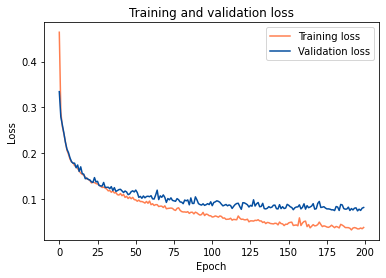

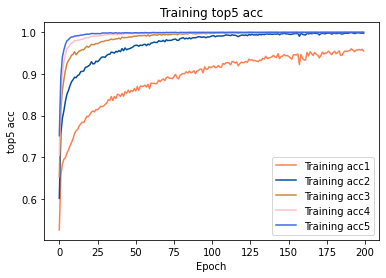

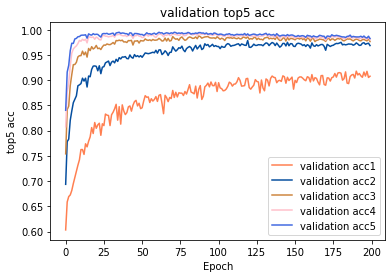

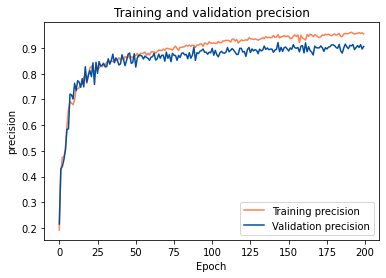

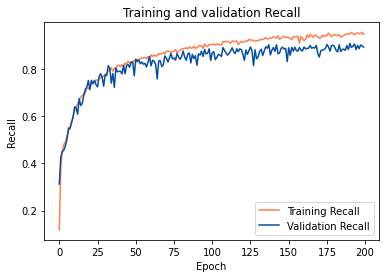

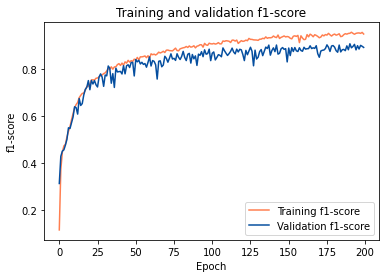

In [177]:
# training for 3 epochs
n_epochs = 200
train(capsule_net, criterion, optimizer, n_epochs=n_epochs)

###  flod4(train)

-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.4682 	 valid Loss: 0.3403
train acc1: 0.4475 	 valid acc1: 0.5439
train acc2: 0.5577 	 valid acc2: 0.6793
train acc3: 0.6387 	 valid acc3: 0.7718
train acc4: 0.6962 	 valid acc4: 0.8154
train acc5: 0.7550 	 valid acc5: 0.8489
train precision: 0.1469 	 valid precision: 0.1447
train recall: 0.1037 	 valid recall: 0.1818
train f1-score: 0.0840 	 valid f1-score: 0.1304
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2960 	 valid Loss: 0.2733
train acc1: 0.6379 	 valid acc1: 0.6579
train acc2: 0.7557 	 valid acc2: 0.7886
train acc3: 0.8268 	 valid acc3: 0.8468
train acc4: 0.8711 	 valid acc4: 0.8846
train acc5: 0.9073 	 valid acc5: 0.9207
train precision: 0.4512 	 valid precision: 0.4889
train recall: 0.3668 	 valid recall: 0.4126
train f1-score: 0.3576 	 valid f1-score: 0.4029
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2590 	 valid Loss: 0.2537
train acc1: 0.6760 	 valid acc1: 0.6821
train acc2: 0.8024 	 valid acc2: 0.8079
train acc3: 0.8707 	 valid acc3: 0.8739
train acc4: 0.9094 	 valid acc4: 0.9225
train acc5: 0.9407 	 valid acc5: 0.9468
train precision: 0.4621 	 valid precision: 0.4722
train recall: 0.4497 	 valid recall: 0.4711
train f1-score: 0.4411 	 valid f1-score: 0.4634
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2405 	 valid Loss: 0.2384
train acc1: 0.6920 	 valid acc1: 0.6793
train acc2: 0.8198 	 valid acc2: 0.8218
train acc3: 0.8910 	 valid acc3: 0.8943
train acc4: 0.9299 	 valid acc4: 0.9375
train acc5: 0.9561 	 valid acc5: 0.9618
train precision: 0.4751 	 valid precision: 0.4903
train recall: 0.4840 	 valid recall: 0.4594
train f1-score: 0.4732 	 valid f1-score: 0.4518
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2232 	 valid Loss: 0.2221
train acc1: 0.6973 	 valid acc1: 0.6968
train acc2: 0.8370 	 valid acc2: 0.8300
train acc3: 0.9069 	 valid acc3: 0.9000
train acc4: 0.9470 	 valid acc4: 0.9461
train acc5: 0.9685 	 valid acc5: 0.9668
train precision: 0.5217 	 valid precision: 0.5395
train recall: 0.4952 	 valid recall: 0.4984
train f1-score: 0.4872 	 valid f1-score: 0.4971
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2091 	 valid Loss: 0.2118
train acc1: 0.7098 	 valid acc1: 0.7025
train acc2: 0.8525 	 valid acc2: 0.8564
train acc3: 0.9168 	 valid acc3: 0.9186
train acc4: 0.9576 	 valid acc4: 0.9543
train acc5: 0.9764 	 valid acc5: 0.9718
train precision: 0.5491 	 valid precision: 0.5554
train recall: 0.5176 	 valid recall: 0.5389
train f1-score: 0.5161 	 valid f1-score: 0.5356
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1959 	 valid Loss: 0.2005
train acc1: 0.7232 	 valid acc1: 0.7064
train acc2: 0.8646 	 valid acc2: 0.8664
train acc3: 0.9321 	 valid acc3: 0.9264
train acc4: 0.9619 	 valid acc4: 0.9650
train acc5: 0.9804 	 valid acc5: 0.9818
train precision: 0.6791 	 valid precision: 0.5372
train recall: 0.5459 	 valid recall: 0.5265
train f1-score: 0.5431 	 valid f1-score: 0.5222
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1872 	 valid Loss: 0.1903
train acc1: 0.7346 	 valid acc1: 0.7225
train acc2: 0.8718 	 valid acc2: 0.8811
train acc3: 0.9371 	 valid acc3: 0.9361
train acc4: 0.9700 	 valid acc4: 0.9639
train acc5: 0.9856 	 valid acc5: 0.9807
train precision: 0.6980 	 valid precision: 0.7199
train recall: 0.5696 	 valid recall: 0.5506
train f1-score: 0.5719 	 valid f1-score: 0.5702
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1793 	 valid Loss: 0.1784
train acc1: 0.7435 	 valid acc1: 0.7511
train acc2: 0.8855 	 valid acc2: 0.8829
train acc3: 0.9461 	 valid acc3: 0.9379
train acc4: 0.9738 	 valid acc4: 0.9657
train acc5: 0.9867 	 valid acc5: 0.9793
train precision: 0.7114 	 valid precision: 0.7863
train recall: 0.5922 	 valid recall: 0.6145
train f1-score: 0.6003 	 valid f1-score: 0.6193
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1732 	 valid Loss: 0.1761
train acc1: 0.7579 	 valid acc1: 0.7525
train acc2: 0.8894 	 valid acc2: 0.8946
train acc3: 0.9476 	 valid acc3: 0.9429
train acc4: 0.9764 	 valid acc4: 0.9679
train acc5: 0.9877 	 valid acc5: 0.9875
train precision: 0.7451 	 valid precision: 0.7354
train recall: 0.6226 	 valid recall: 0.6033
train f1-score: 0.6301 	 valid f1-score: 0.6146
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1707 	 valid Loss: 0.1732
train acc1: 0.7661 	 valid acc1: 0.7561
train acc2: 0.8942 	 valid acc2: 0.8921
train acc3: 0.9496 	 valid acc3: 0.9396
train acc4: 0.9771 	 valid acc4: 0.9700
train acc5: 0.9885 	 valid acc5: 0.9854
train precision: 0.7428 	 valid precision: 0.7701
train recall: 0.6433 	 valid recall: 0.6229
train f1-score: 0.6474 	 valid f1-score: 0.6345
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1676 	 valid Loss: 0.1703
train acc1: 0.7681 	 valid acc1: 0.7811
train acc2: 0.8963 	 valid acc2: 0.8861
train acc3: 0.9508 	 valid acc3: 0.9400
train acc4: 0.9774 	 valid acc4: 0.9693
train acc5: 0.9904 	 valid acc5: 0.9807
train precision: 0.7490 	 valid precision: 0.7731
train recall: 0.6476 	 valid recall: 0.6946
train f1-score: 0.6537 	 valid f1-score: 0.6782
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1602 	 valid Loss: 0.1618
train acc1: 0.7780 	 valid acc1: 0.7764
train acc2: 0.9023 	 valid acc2: 0.8975
train acc3: 0.9557 	 valid acc3: 0.9493
train acc4: 0.9801 	 valid acc4: 0.9696
train acc5: 0.9910 	 valid acc5: 0.9846
train precision: 0.7667 	 valid precision: 0.7618
train recall: 0.6687 	 valid recall: 0.6696
train f1-score: 0.6737 	 valid f1-score: 0.6807
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1587 	 valid Loss: 0.1581
train acc1: 0.7804 	 valid acc1: 0.7921
train acc2: 0.9071 	 valid acc2: 0.8861
train acc3: 0.9594 	 valid acc3: 0.9511
train acc4: 0.9820 	 valid acc4: 0.9757
train acc5: 0.9929 	 valid acc5: 0.9836
train precision: 0.7582 	 valid precision: 0.7557
train recall: 0.6767 	 valid recall: 0.7038
train f1-score: 0.6808 	 valid f1-score: 0.7110
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1545 	 valid Loss: 0.1623
train acc1: 0.7818 	 valid acc1: 0.7782
train acc2: 0.9095 	 valid acc2: 0.8882
train acc3: 0.9580 	 valid acc3: 0.9421
train acc4: 0.9813 	 valid acc4: 0.9675
train acc5: 0.9919 	 valid acc5: 0.9832
train precision: 0.7639 	 valid precision: 0.7395
train recall: 0.6807 	 valid recall: 0.7138
train f1-score: 0.6883 	 valid f1-score: 0.6883
-------第 16 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1519 	 valid Loss: 0.1579
train acc1: 0.7870 	 valid acc1: 0.7825
train acc2: 0.9092 	 valid acc2: 0.9079
train acc3: 0.9592 	 valid acc3: 0.9539
train acc4: 0.9837 	 valid acc4: 0.9768
train acc5: 0.9921 	 valid acc5: 0.9889
train precision: 0.7638 	 valid precision: 0.7555
train recall: 0.6880 	 valid recall: 0.6862
train f1-score: 0.6960 	 valid f1-score: 0.6898
-------第 17 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1495 	 valid Loss: 0.1612
train acc1: 0.7905 	 valid acc1: 0.7664
train acc2: 0.9155 	 valid acc2: 0.8943
train acc3: 0.9615 	 valid acc3: 0.9511
train acc4: 0.9840 	 valid acc4: 0.9793
train acc5: 0.9929 	 valid acc5: 0.9914
train precision: 0.7552 	 valid precision: 0.7781
train recall: 0.6981 	 valid recall: 0.6469
train f1-score: 0.7034 	 valid f1-score: 0.6695
-------第 18 轮训练开始-------
train Loss: 0.1465 	 valid Loss: 0.1485
train acc1: 0.7918 	 valid acc1: 0.8014
train acc2: 0.9200 	 valid acc2: 0.9139
train acc3: 0.9667 	 valid acc3: 0.9575
train acc4: 0.9871 	 valid acc4: 0.9782
train acc5: 0.9943 	 valid acc5: 0.9886
train precision: 0.7971 	 valid precision: 0.8625
train recall: 0.7005 	 valid recall: 0.7187
train f1-score: 0.7067 	 valid f1-score: 0.7279
-------第 19 轮训练开始-------
train Loss: 0.1426 	 valid Loss: 0.1456
train acc1: 0.7986 	 valid acc1: 0.7993
train acc2: 0.9237 	 valid acc2: 0.9104
train acc3: 0.9668 	 valid acc3: 0.9561
train acc4: 0.9864 	 valid

train Loss: 0.1098 	 valid Loss: 0.1167
train acc1: 0.8439 	 valid acc1: 0.8439
train acc2: 0.9611 	 valid acc2: 0.9443
train acc3: 0.9894 	 valid acc3: 0.9761
train acc4: 0.9970 	 valid acc4: 0.9918
train acc5: 0.9987 	 valid acc5: 0.9939
train precision: 0.8447 	 valid precision: 0.8573
train recall: 0.8022 	 valid recall: 0.8046
train f1-score: 0.8090 	 valid f1-score: 0.8129
-------第 39 轮训练开始-------
train Loss: 0.1053 	 valid Loss: 0.1152
train acc1: 0.8536 	 valid acc1: 0.8511
train acc2: 0.9621 	 valid acc2: 0.9461
train acc3: 0.9881 	 valid acc3: 0.9771
train acc4: 0.9979 	 valid acc4: 0.9921
train acc5: 0.9990 	 valid acc5: 0.9943
train precision: 0.8615 	 valid precision: 0.8593
train recall: 0.8204 	 valid recall: 0.8442
train f1-score: 0.8256 	 valid f1-score: 0.8240
-------第 40 轮训练开始-------
train Loss: 0.1067 	 valid Loss: 0.1194
train acc1: 0.8504 	 valid acc1: 0.8293
train acc2: 0.9624 	 valid acc2: 0.9482
train acc3: 0.9890 	 valid acc3: 0.9818
train acc4: 0.9971 	 valid

train Loss: 0.0862 	 valid Loss: 0.1023
train acc1: 0.8814 	 valid acc1: 0.8579
train acc2: 0.9765 	 valid acc2: 0.9643
train acc3: 0.9950 	 valid acc3: 0.9850
train acc4: 0.9988 	 valid acc4: 0.9929
train acc5: 0.9994 	 valid acc5: 0.9961
train precision: 0.8863 	 valid precision: 0.8825
train recall: 0.8581 	 valid recall: 0.8173
train f1-score: 0.8640 	 valid f1-score: 0.8319
-------第 60 轮训练开始-------
train Loss: 0.0879 	 valid Loss: 0.1027
train acc1: 0.8782 	 valid acc1: 0.8550
train acc2: 0.9760 	 valid acc2: 0.9593
train acc3: 0.9942 	 valid acc3: 0.9811
train acc4: 0.9983 	 valid acc4: 0.9889
train acc5: 0.9990 	 valid acc5: 0.9936
train precision: 0.8820 	 valid precision: 0.8666
train recall: 0.8515 	 valid recall: 0.8257
train f1-score: 0.8574 	 valid f1-score: 0.8323
-------第 61 轮训练开始-------
train Loss: 0.0843 	 valid Loss: 0.1036
train acc1: 0.8862 	 valid acc1: 0.8668
train acc2: 0.9768 	 valid acc2: 0.9589
train acc3: 0.9949 	 valid acc3: 0.9836
train acc4: 0.9981 	 valid

train Loss: 0.0683 	 valid Loss: 0.0902
train acc1: 0.9089 	 valid acc1: 0.8814
train acc2: 0.9871 	 valid acc2: 0.9689
train acc3: 0.9979 	 valid acc3: 0.9854
train acc4: 0.9993 	 valid acc4: 0.9893
train acc5: 0.9999 	 valid acc5: 0.9936
train precision: 0.9141 	 valid precision: 0.8842
train recall: 0.8924 	 valid recall: 0.8595
train f1-score: 0.8976 	 valid f1-score: 0.8628
-------第 81 轮训练开始-------
train Loss: 0.0730 	 valid Loss: 0.0940
train acc1: 0.9020 	 valid acc1: 0.8818
train acc2: 0.9849 	 valid acc2: 0.9646
train acc3: 0.9973 	 valid acc3: 0.9854
train acc4: 0.9995 	 valid acc4: 0.9889
train acc5: 0.9999 	 valid acc5: 0.9907
train precision: 0.9053 	 valid precision: 0.8882
train recall: 0.8815 	 valid recall: 0.8522
train f1-score: 0.8874 	 valid f1-score: 0.8639
-------第 82 轮训练开始-------
train Loss: 0.0742 	 valid Loss: 0.0919
train acc1: 0.9027 	 valid acc1: 0.8829
train acc2: 0.9843 	 valid acc2: 0.9671
train acc3: 0.9973 	 valid acc3: 0.9868
train acc4: 0.9993 	 valid

train Loss: 0.0631 	 valid Loss: 0.0858
train acc1: 0.9165 	 valid acc1: 0.8950
train acc2: 0.9904 	 valid acc2: 0.9704
train acc3: 0.9975 	 valid acc3: 0.9864
train acc4: 0.9992 	 valid acc4: 0.9904
train acc5: 0.9996 	 valid acc5: 0.9932
train precision: 0.9220 	 valid precision: 0.8930
train recall: 0.8990 	 valid recall: 0.8850
train f1-score: 0.9065 	 valid f1-score: 0.8861
-------第 102 轮训练开始-------
train Loss: 0.0606 	 valid Loss: 0.0896
train acc1: 0.9186 	 valid acc1: 0.8814
train acc2: 0.9923 	 valid acc2: 0.9668
train acc3: 0.9988 	 valid acc3: 0.9854
train acc4: 0.9996 	 valid acc4: 0.9896
train acc5: 0.9998 	 valid acc5: 0.9918
train precision: 0.9222 	 valid precision: 0.8744
train recall: 0.9000 	 valid recall: 0.8663
train f1-score: 0.9079 	 valid f1-score: 0.8624
-------第 103 轮训练开始-------
train Loss: 0.0611 	 valid Loss: 0.0908
train acc1: 0.9161 	 valid acc1: 0.8825
train acc2: 0.9905 	 valid acc2: 0.9686
train acc3: 0.9979 	 valid acc3: 0.9846
train acc4: 0.9993 	 val

train Loss: 0.0503 	 valid Loss: 0.0846
train acc1: 0.9348 	 valid acc1: 0.9018
train acc2: 0.9960 	 valid acc2: 0.9732
train acc3: 0.9996 	 valid acc3: 0.9836
train acc4: 0.9999 	 valid acc4: 0.9882
train acc5: 1.0000 	 valid acc5: 0.9921
train precision: 0.9376 	 valid precision: 0.8982
train recall: 0.9188 	 valid recall: 0.8959
train f1-score: 0.9259 	 valid f1-score: 0.8943
-------第 123 轮训练开始-------
train Loss: 0.0526 	 valid Loss: 0.0820
train acc1: 0.9308 	 valid acc1: 0.8932
train acc2: 0.9949 	 valid acc2: 0.9732
train acc3: 0.9987 	 valid acc3: 0.9871
train acc4: 0.9996 	 valid acc4: 0.9921
train acc5: 0.9998 	 valid acc5: 0.9936
train precision: 0.9354 	 valid precision: 0.8953
train recall: 0.9168 	 valid recall: 0.8747
train f1-score: 0.9236 	 valid f1-score: 0.8800
-------第 124 轮训练开始-------
train Loss: 0.0483 	 valid Loss: 0.0837
train acc1: 0.9370 	 valid acc1: 0.8989
train acc2: 0.9955 	 valid acc2: 0.9736
train acc3: 0.9993 	 valid acc3: 0.9832
train acc4: 0.9996 	 val

train Loss: 0.0484 	 valid Loss: 0.0898
train acc1: 0.9365 	 valid acc1: 0.8914
train acc2: 0.9963 	 valid acc2: 0.9682
train acc3: 0.9994 	 valid acc3: 0.9821
train acc4: 0.9999 	 valid acc4: 0.9875
train acc5: 0.9999 	 valid acc5: 0.9900
train precision: 0.9437 	 valid precision: 0.8841
train recall: 0.9195 	 valid recall: 0.8817
train f1-score: 0.9290 	 valid f1-score: 0.8795
-------第 144 轮训练开始-------
train Loss: 0.0450 	 valid Loss: 0.0822
train acc1: 0.9402 	 valid acc1: 0.8989
train acc2: 0.9968 	 valid acc2: 0.9725
train acc3: 0.9994 	 valid acc3: 0.9832
train acc4: 0.9998 	 valid acc4: 0.9889
train acc5: 0.9999 	 valid acc5: 0.9904
train precision: 0.9458 	 valid precision: 0.8963
train recall: 0.9259 	 valid recall: 0.8775
train f1-score: 0.9336 	 valid f1-score: 0.8809
-------第 145 轮训练开始-------
train Loss: 0.0480 	 valid Loss: 0.0826
train acc1: 0.9363 	 valid acc1: 0.8993
train acc2: 0.9960 	 valid acc2: 0.9714
train acc3: 0.9995 	 valid acc3: 0.9836
train acc4: 0.9999 	 val

train Loss: 0.0430 	 valid Loss: 0.0830
train acc1: 0.9436 	 valid acc1: 0.9064
train acc2: 0.9964 	 valid acc2: 0.9664
train acc3: 0.9993 	 valid acc3: 0.9836
train acc4: 0.9998 	 valid acc4: 0.9907
train acc5: 0.9999 	 valid acc5: 0.9921
train precision: 0.9465 	 valid precision: 0.9063
train recall: 0.9284 	 valid recall: 0.8902
train f1-score: 0.9348 	 valid f1-score: 0.8955
-------第 165 轮训练开始-------
train Loss: 0.0453 	 valid Loss: 0.0898
train acc1: 0.9402 	 valid acc1: 0.8907
train acc2: 0.9967 	 valid acc2: 0.9675
train acc3: 0.9992 	 valid acc3: 0.9814
train acc4: 0.9996 	 valid acc4: 0.9857
train acc5: 0.9998 	 valid acc5: 0.9882
train precision: 0.9430 	 valid precision: 0.8889
train recall: 0.9245 	 valid recall: 0.8776
train f1-score: 0.9320 	 valid f1-score: 0.8812
-------第 166 轮训练开始-------
train Loss: 0.0441 	 valid Loss: 0.0829
train acc1: 0.9429 	 valid acc1: 0.8993
train acc2: 0.9971 	 valid acc2: 0.9707
train acc3: 0.9996 	 valid acc3: 0.9807
train acc4: 1.0000 	 val

train Loss: 0.0393 	 valid Loss: 0.0793
train acc1: 0.9490 	 valid acc1: 0.9075
train acc2: 0.9980 	 valid acc2: 0.9729
train acc3: 0.9992 	 valid acc3: 0.9804
train acc4: 0.9999 	 valid acc4: 0.9843
train acc5: 0.9999 	 valid acc5: 0.9882
train precision: 0.9525 	 valid precision: 0.9110
train recall: 0.9366 	 valid recall: 0.8903
train f1-score: 0.9432 	 valid f1-score: 0.8963
-------第 186 轮训练开始-------
train Loss: 0.0386 	 valid Loss: 0.0755
train acc1: 0.9515 	 valid acc1: 0.9139
train acc2: 0.9983 	 valid acc2: 0.9704
train acc3: 0.9998 	 valid acc3: 0.9804
train acc4: 0.9998 	 valid acc4: 0.9868
train acc5: 0.9999 	 valid acc5: 0.9900
train precision: 0.9543 	 valid precision: 0.9151
train recall: 0.9404 	 valid recall: 0.9064
train f1-score: 0.9456 	 valid f1-score: 0.9082
-------第 187 轮训练开始-------
train Loss: 0.0371 	 valid Loss: 0.0814
train acc1: 0.9532 	 valid acc1: 0.9075
train acc2: 0.9981 	 valid acc2: 0.9718
train acc3: 0.9994 	 valid acc3: 0.9800
train acc4: 0.9999 	 val

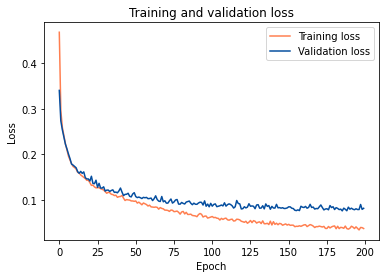

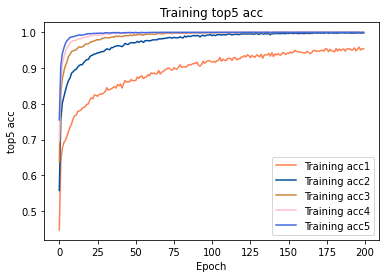

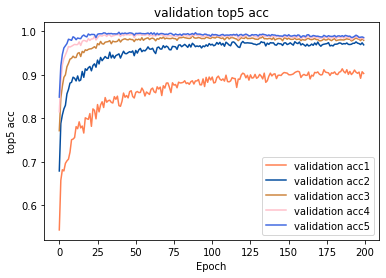

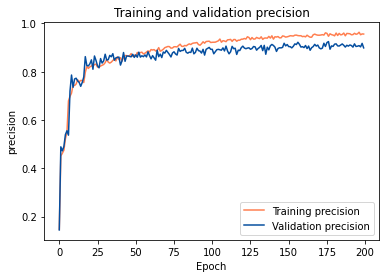

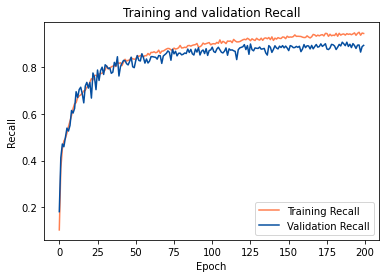

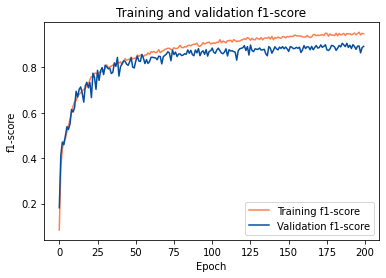

In [208]:
# training for 3 epochs
n_epochs = 200
train(capsule_net, criterion, optimizer, n_epochs=n_epochs)

### 4CNN
### fold0(train)

-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.4352 	 valid Loss: 0.3150
train acc1: 0.5406 	 valid acc1: 0.6400
train acc2: 0.6158 	 valid acc2: 0.7350
train acc3: 0.6743 	 valid acc3: 0.7989
train acc4: 0.7230 	 valid acc4: 0.8243
train acc5: 0.7704 	 valid acc5: 0.8861
train precision: 0.2941 	 valid precision: 0.4071
train recall: 0.1518 	 valid recall: 0.3935
train f1-score: 0.1598 	 valid f1-score: 0.3810
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2773 	 valid Loss: 0.2698
train acc1: 0.6683 	 valid acc1: 0.6589
train acc2: 0.7793 	 valid acc2: 0.7900
train acc3: 0.8404 	 valid acc3: 0.8496
train acc4: 0.8858 	 valid acc4: 0.8918
train acc5: 0.9193 	 valid acc5: 0.9325
train precision: 0.4779 	 valid precision: 0.4964
train recall: 0.4188 	 valid recall: 0.4348
train f1-score: 0.4079 	 valid f1-score: 0.4180
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2536 	 valid Loss: 0.2491
train acc1: 0.6807 	 valid acc1: 0.6711
train acc2: 0.7977 	 valid acc2: 0.8036
train acc3: 0.8651 	 valid acc3: 0.8825
train acc4: 0.9099 	 valid acc4: 0.9254
train acc5: 0.9358 	 valid acc5: 0.9546
train precision: 0.4672 	 valid precision: 0.4789
train recall: 0.4470 	 valid recall: 0.4608
train f1-score: 0.4355 	 valid f1-score: 0.4479
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2350 	 valid Loss: 0.2279
train acc1: 0.6940 	 valid acc1: 0.6875
train acc2: 0.8183 	 valid acc2: 0.8311
train acc3: 0.8956 	 valid acc3: 0.9000
train acc4: 0.9367 	 valid acc4: 0.9457
train acc5: 0.9625 	 valid acc5: 0.9700
train precision: 0.5641 	 valid precision: 0.5135
train recall: 0.4777 	 valid recall: 0.4949
train f1-score: 0.4721 	 valid f1-score: 0.4855
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2205 	 valid Loss: 0.2190
train acc1: 0.7099 	 valid acc1: 0.7057
train acc2: 0.8342 	 valid acc2: 0.8343
train acc3: 0.9083 	 valid acc3: 0.9089
train acc4: 0.9464 	 valid acc4: 0.9543
train acc5: 0.9671 	 valid acc5: 0.9761
train precision: 0.5735 	 valid precision: 0.5715
train recall: 0.5141 	 valid recall: 0.5404
train f1-score: 0.5108 	 valid f1-score: 0.5258
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2081 	 valid Loss: 0.2075
train acc1: 0.7160 	 valid acc1: 0.7111
train acc2: 0.8523 	 valid acc2: 0.8621
train acc3: 0.9231 	 valid acc3: 0.9289
train acc4: 0.9600 	 valid acc4: 0.9596
train acc5: 0.9787 	 valid acc5: 0.9836
train precision: 0.6034 	 valid precision: 0.5899
train recall: 0.5293 	 valid recall: 0.5313
train f1-score: 0.5282 	 valid f1-score: 0.5375
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1982 	 valid Loss: 0.1953
train acc1: 0.7236 	 valid acc1: 0.7307
train acc2: 0.8649 	 valid acc2: 0.8636
train acc3: 0.9343 	 valid acc3: 0.9168
train acc4: 0.9633 	 valid acc4: 0.9571
train acc5: 0.9811 	 valid acc5: 0.9800
train precision: 0.6677 	 valid precision: 0.6418
train recall: 0.5484 	 valid recall: 0.5905
train f1-score: 0.5517 	 valid f1-score: 0.5851
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1882 	 valid Loss: 0.1879
train acc1: 0.7364 	 valid acc1: 0.7339
train acc2: 0.8774 	 valid acc2: 0.8721
train acc3: 0.9396 	 valid acc3: 0.9311
train acc4: 0.9702 	 valid acc4: 0.9636
train acc5: 0.9856 	 valid acc5: 0.9868
train precision: 0.6482 	 valid precision: 0.6844
train recall: 0.5743 	 valid recall: 0.5919
train f1-score: 0.5839 	 valid f1-score: 0.5932
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1815 	 valid Loss: 0.1969
train acc1: 0.7431 	 valid acc1: 0.7221
train acc2: 0.8827 	 valid acc2: 0.8707
train acc3: 0.9430 	 valid acc3: 0.9196
train acc4: 0.9732 	 valid acc4: 0.9529
train acc5: 0.9873 	 valid acc5: 0.9739
train precision: 0.7314 	 valid precision: 0.6641
train recall: 0.5918 	 valid recall: 0.5617
train f1-score: 0.6009 	 valid f1-score: 0.5705
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1781 	 valid Loss: 0.1805
train acc1: 0.7481 	 valid acc1: 0.7289
train acc2: 0.8835 	 valid acc2: 0.8886
train acc3: 0.9450 	 valid acc3: 0.9471
train acc4: 0.9768 	 valid acc4: 0.9771
train acc5: 0.9901 	 valid acc5: 0.9889
train precision: 0.7299 	 valid precision: 0.7004
train recall: 0.6075 	 valid recall: 0.5713
train f1-score: 0.6148 	 valid f1-score: 0.5837
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1686 	 valid Loss: 0.1678
train acc1: 0.7575 	 valid acc1: 0.7650
train acc2: 0.8971 	 valid acc2: 0.8946
train acc3: 0.9496 	 valid acc3: 0.9479
train acc4: 0.9764 	 valid acc4: 0.9761
train acc5: 0.9894 	 valid acc5: 0.9886
train precision: 0.7301 	 valid precision: 0.7849
train recall: 0.6265 	 valid recall: 0.6486
train f1-score: 0.6382 	 valid f1-score: 0.6597
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1647 	 valid Loss: 0.1661
train acc1: 0.7676 	 valid acc1: 0.7596
train acc2: 0.9035 	 valid acc2: 0.9050
train acc3: 0.9550 	 valid acc3: 0.9514
train acc4: 0.9812 	 valid acc4: 0.9786
train acc5: 0.9910 	 valid acc5: 0.9893
train precision: 0.7507 	 valid precision: 0.7424
train recall: 0.6495 	 valid recall: 0.6368
train f1-score: 0.6629 	 valid f1-score: 0.6354
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1580 	 valid Loss: 0.1531
train acc1: 0.7773 	 valid acc1: 0.7832
train acc2: 0.9123 	 valid acc2: 0.9157
train acc3: 0.9602 	 valid acc3: 0.9600
train acc4: 0.9818 	 valid acc4: 0.9807
train acc5: 0.9923 	 valid acc5: 0.9932
train precision: 0.7547 	 valid precision: 0.8337
train recall: 0.6692 	 valid recall: 0.6810
train f1-score: 0.6819 	 valid f1-score: 0.6977
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1570 	 valid Loss: 0.1572
train acc1: 0.7810 	 valid acc1: 0.7789
train acc2: 0.9100 	 valid acc2: 0.9082
train acc3: 0.9613 	 valid acc3: 0.9543
train acc4: 0.9824 	 valid acc4: 0.9782
train acc5: 0.9924 	 valid acc5: 0.9911
train precision: 0.7915 	 valid precision: 0.7761
train recall: 0.6793 	 valid recall: 0.6844
train f1-score: 0.6949 	 valid f1-score: 0.6876
-------第 15 轮训练开始-------
train Loss: 0.1505 	 valid Loss: 0.1542
train acc1: 0.7871 	 valid acc1: 0.7686
train acc2: 0.9167 	 valid acc2: 0.9150
train acc3: 0.9632 	 valid acc3: 0.9700
train acc4: 0.9854 	 valid acc4: 0.9875
train acc5: 0.9943 	 valid acc5: 0.9975
train precision: 0.7977 	 valid precision: 0.8344
train recall: 0.6917 	 valid recall: 0.6569
train f1-score: 0.7083 	 valid f1-score: 0.6591
-------第 16 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1477 	 valid Loss: 0.1513
train acc1: 0.7933 	 valid acc1: 0.8018
train acc2: 0.9193 	 valid acc2: 0.9129
train acc3: 0.9658 	 valid acc3: 0.9589
train acc4: 0.9867 	 valid acc4: 0.9832
train acc5: 0.9946 	 valid acc5: 0.9929
train precision: 0.8194 	 valid precision: 0.7583
train recall: 0.7071 	 valid recall: 0.7810
train f1-score: 0.7245 	 valid f1-score: 0.7619
-------第 17 轮训练开始-------
train Loss: 0.1446 	 valid Loss: 0.1525
train acc1: 0.7979 	 valid acc1: 0.7921
train acc2: 0.9251 	 valid acc2: 0.9071
train acc3: 0.9675 	 valid acc3: 0.9625
train acc4: 0.9880 	 valid acc4: 0.9836
train acc5: 0.9950 	 valid acc5: 0.9939
train precision: 0.8047 	 valid precision: 0.8271
train recall: 0.7196 	 valid recall: 0.7355
train f1-score: 0.7330 	 valid f1-score: 0.7328
-------第 18 轮训练开始-------
train Loss: 0.1415 	 valid Loss: 0.1544
train acc1: 0.8035 	 valid acc1: 0.7839
train acc2: 0.9325 	 valid acc2: 0.9096
train acc3: 0.9718 	 valid acc3: 0.9661
train acc4: 0.9882 	 valid

train Loss: 0.1111 	 valid Loss: 0.1186
train acc1: 0.8458 	 valid acc1: 0.8411
train acc2: 0.9630 	 valid acc2: 0.9475
train acc3: 0.9875 	 valid acc3: 0.9786
train acc4: 0.9954 	 valid acc4: 0.9857
train acc5: 0.9983 	 valid acc5: 0.9921
train precision: 0.8478 	 valid precision: 0.8420
train recall: 0.8109 	 valid recall: 0.8114
train f1-score: 0.8163 	 valid f1-score: 0.8038
-------第 38 轮训练开始-------
train Loss: 0.1110 	 valid Loss: 0.1189
train acc1: 0.8430 	 valid acc1: 0.8332
train acc2: 0.9611 	 valid acc2: 0.9557
train acc3: 0.9889 	 valid acc3: 0.9850
train acc4: 0.9965 	 valid acc4: 0.9918
train acc5: 0.9983 	 valid acc5: 0.9943
train precision: 0.8404 	 valid precision: 0.8466
train recall: 0.8040 	 valid recall: 0.7762
train f1-score: 0.8104 	 valid f1-score: 0.7934
-------第 39 轮训练开始-------
train Loss: 0.1110 	 valid Loss: 0.1177
train acc1: 0.8463 	 valid acc1: 0.8389
train acc2: 0.9613 	 valid acc2: 0.9429
train acc3: 0.9873 	 valid acc3: 0.9757
train acc4: 0.9949 	 valid

train Loss: 0.0872 	 valid Loss: 0.1050
train acc1: 0.8800 	 valid acc1: 0.8654
train acc2: 0.9783 	 valid acc2: 0.9589
train acc3: 0.9952 	 valid acc3: 0.9843
train acc4: 0.9987 	 valid acc4: 0.9907
train acc5: 0.9995 	 valid acc5: 0.9925
train precision: 0.8838 	 valid precision: 0.8665
train recall: 0.8537 	 valid recall: 0.8357
train f1-score: 0.8602 	 valid f1-score: 0.8378
-------第 59 轮训练开始-------
train Loss: 0.0885 	 valid Loss: 0.1071
train acc1: 0.8820 	 valid acc1: 0.8646
train acc2: 0.9815 	 valid acc2: 0.9607
train acc3: 0.9948 	 valid acc3: 0.9843
train acc4: 0.9977 	 valid acc4: 0.9932
train acc5: 0.9987 	 valid acc5: 0.9950
train precision: 0.8849 	 valid precision: 0.8823
train recall: 0.8546 	 valid recall: 0.8231
train f1-score: 0.8613 	 valid f1-score: 0.8386
-------第 60 轮训练开始-------
train Loss: 0.0869 	 valid Loss: 0.0988
train acc1: 0.8839 	 valid acc1: 0.8750
train acc2: 0.9782 	 valid acc2: 0.9625
train acc3: 0.9951 	 valid acc3: 0.9875
train acc4: 0.9986 	 valid

train Loss: 0.0712 	 valid Loss: 0.1009
train acc1: 0.9057 	 valid acc1: 0.8696
train acc2: 0.9880 	 valid acc2: 0.9582
train acc3: 0.9974 	 valid acc3: 0.9807
train acc4: 0.9994 	 valid acc4: 0.9886
train acc5: 1.0000 	 valid acc5: 0.9911
train precision: 0.9089 	 valid precision: 0.8823
train recall: 0.8858 	 valid recall: 0.8417
train f1-score: 0.8919 	 valid f1-score: 0.8440
-------第 80 轮训练开始-------
train Loss: 0.0767 	 valid Loss: 0.0977
train acc1: 0.8974 	 valid acc1: 0.8796
train acc2: 0.9850 	 valid acc2: 0.9632
train acc3: 0.9963 	 valid acc3: 0.9832
train acc4: 0.9993 	 valid acc4: 0.9896
train acc5: 0.9999 	 valid acc5: 0.9925
train precision: 0.9001 	 valid precision: 0.8801
train recall: 0.8743 	 valid recall: 0.8565
train f1-score: 0.8808 	 valid f1-score: 0.8570
-------第 81 轮训练开始-------
train Loss: 0.0697 	 valid Loss: 0.0895
train acc1: 0.9067 	 valid acc1: 0.8832
train acc2: 0.9901 	 valid acc2: 0.9682
train acc3: 0.9980 	 valid acc3: 0.9854
train acc4: 0.9994 	 valid

train Loss: 0.0616 	 valid Loss: 0.0837
train acc1: 0.9168 	 valid acc1: 0.8882
train acc2: 0.9921 	 valid acc2: 0.9714
train acc3: 0.9986 	 valid acc3: 0.9846
train acc4: 0.9994 	 valid acc4: 0.9893
train acc5: 0.9996 	 valid acc5: 0.9921
train precision: 0.9177 	 valid precision: 0.8768
train recall: 0.8979 	 valid recall: 0.8718
train f1-score: 0.9037 	 valid f1-score: 0.8694
-------第 101 轮训练开始-------
train Loss: 0.0573 	 valid Loss: 0.0803
train acc1: 0.9257 	 valid acc1: 0.8979
train acc2: 0.9940 	 valid acc2: 0.9700
train acc3: 0.9987 	 valid acc3: 0.9861
train acc4: 1.0000 	 valid acc4: 0.9907
train acc5: 1.0000 	 valid acc5: 0.9939
train precision: 0.9262 	 valid precision: 0.8989
train recall: 0.9064 	 valid recall: 0.8785
train f1-score: 0.9122 	 valid f1-score: 0.8821
-------第 102 轮训练开始-------
train Loss: 0.0574 	 valid Loss: 0.0856
train acc1: 0.9256 	 valid acc1: 0.8882
train acc2: 0.9939 	 valid acc2: 0.9711
train acc3: 0.9993 	 valid acc3: 0.9839
train acc4: 0.9999 	 val

train Loss: 0.0533 	 valid Loss: 0.0836
train acc1: 0.9304 	 valid acc1: 0.8975
train acc2: 0.9942 	 valid acc2: 0.9704
train acc3: 0.9990 	 valid acc3: 0.9825
train acc4: 0.9998 	 valid acc4: 0.9861
train acc5: 0.9998 	 valid acc5: 0.9918
train precision: 0.9326 	 valid precision: 0.9055
train recall: 0.9147 	 valid recall: 0.8714
train f1-score: 0.9204 	 valid f1-score: 0.8801
-------第 122 轮训练开始-------
train Loss: 0.0486 	 valid Loss: 0.0922
train acc1: 0.9370 	 valid acc1: 0.8896
train acc2: 0.9967 	 valid acc2: 0.9661
train acc3: 0.9994 	 valid acc3: 0.9793
train acc4: 0.9996 	 valid acc4: 0.9857
train acc5: 0.9999 	 valid acc5: 0.9889
train precision: 0.9393 	 valid precision: 0.9025
train recall: 0.9216 	 valid recall: 0.8496
train f1-score: 0.9275 	 valid f1-score: 0.8658
-------第 123 轮训练开始-------
train Loss: 0.0538 	 valid Loss: 0.0874
train acc1: 0.9289 	 valid acc1: 0.8889
train acc2: 0.9942 	 valid acc2: 0.9632
train acc3: 0.9988 	 valid acc3: 0.9775
train acc4: 0.9996 	 val

train Loss: 0.0450 	 valid Loss: 0.0923
train acc1: 0.9429 	 valid acc1: 0.8821
train acc2: 0.9961 	 valid acc2: 0.9654
train acc3: 0.9993 	 valid acc3: 0.9811
train acc4: 0.9999 	 valid acc4: 0.9850
train acc5: 1.0000 	 valid acc5: 0.9886
train precision: 0.9438 	 valid precision: 0.8737
train recall: 0.9284 	 valid recall: 0.8644
train f1-score: 0.9339 	 valid f1-score: 0.8650
-------第 143 轮训练开始-------
train Loss: 0.0477 	 valid Loss: 0.0824
train acc1: 0.9406 	 valid acc1: 0.8954
train acc2: 0.9958 	 valid acc2: 0.9736
train acc3: 0.9992 	 valid acc3: 0.9832
train acc4: 0.9994 	 valid acc4: 0.9875
train acc5: 0.9996 	 valid acc5: 0.9918
train precision: 0.9426 	 valid precision: 0.8898
train recall: 0.9259 	 valid recall: 0.8771
train f1-score: 0.9319 	 valid f1-score: 0.8756
-------第 144 轮训练开始-------
train Loss: 0.0442 	 valid Loss: 0.0796
train acc1: 0.9424 	 valid acc1: 0.9011
train acc2: 0.9964 	 valid acc2: 0.9704
train acc3: 0.9996 	 valid acc3: 0.9804
train acc4: 0.9999 	 val

train Loss: 0.0483 	 valid Loss: 0.0811
train acc1: 0.9417 	 valid acc1: 0.9082
train acc2: 0.9945 	 valid acc2: 0.9689
train acc3: 0.9987 	 valid acc3: 0.9814
train acc4: 0.9996 	 valid acc4: 0.9861
train acc5: 0.9999 	 valid acc5: 0.9889
train precision: 0.9400 	 valid precision: 0.9039
train recall: 0.9286 	 valid recall: 0.8997
train f1-score: 0.9325 	 valid f1-score: 0.8985
-------第 164 轮训练开始-------
train Loss: 0.0410 	 valid Loss: 0.0803
train acc1: 0.9487 	 valid acc1: 0.9100
train acc2: 0.9987 	 valid acc2: 0.9682
train acc3: 0.9999 	 valid acc3: 0.9811
train acc4: 1.0000 	 valid acc4: 0.9861
train acc5: 1.0000 	 valid acc5: 0.9914
train precision: 0.9481 	 valid precision: 0.9184
train recall: 0.9369 	 valid recall: 0.8891
train f1-score: 0.9410 	 valid f1-score: 0.8977
-------第 165 轮训练开始-------
train Loss: 0.0485 	 valid Loss: 0.0840
train acc1: 0.9364 	 valid acc1: 0.8900
train acc2: 0.9957 	 valid acc2: 0.9714
train acc3: 0.9990 	 valid acc3: 0.9836
train acc4: 0.9999 	 val

train Loss: 0.0414 	 valid Loss: 0.0770
train acc1: 0.9477 	 valid acc1: 0.9071
train acc2: 0.9963 	 valid acc2: 0.9707
train acc3: 0.9993 	 valid acc3: 0.9821
train acc4: 0.9999 	 valid acc4: 0.9857
train acc5: 0.9999 	 valid acc5: 0.9868
train precision: 0.9479 	 valid precision: 0.9047
train recall: 0.9351 	 valid recall: 0.8921
train f1-score: 0.9402 	 valid f1-score: 0.8945
-------第 185 轮训练开始-------
train Loss: 0.0390 	 valid Loss: 0.0851
train acc1: 0.9504 	 valid acc1: 0.9007
train acc2: 0.9974 	 valid acc2: 0.9664
train acc3: 0.9994 	 valid acc3: 0.9761
train acc4: 0.9999 	 valid acc4: 0.9804
train acc5: 0.9999 	 valid acc5: 0.9861
train precision: 0.9500 	 valid precision: 0.8996
train recall: 0.9378 	 valid recall: 0.8787
train f1-score: 0.9423 	 valid f1-score: 0.8838
-------第 186 轮训练开始-------
train Loss: 0.0356 	 valid Loss: 0.0764
train acc1: 0.9552 	 valid acc1: 0.9164
train acc2: 0.9985 	 valid acc2: 0.9671
train acc3: 0.9995 	 valid acc3: 0.9789
train acc4: 0.9999 	 val

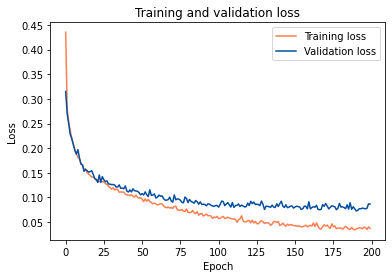

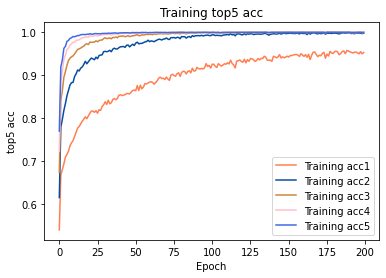

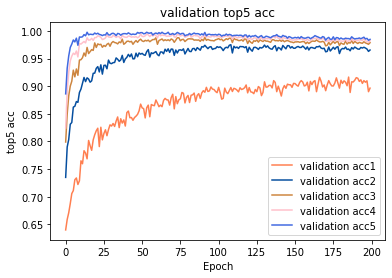

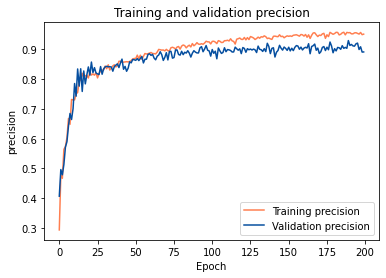

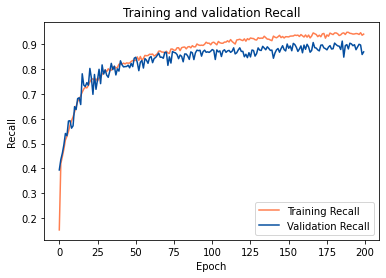

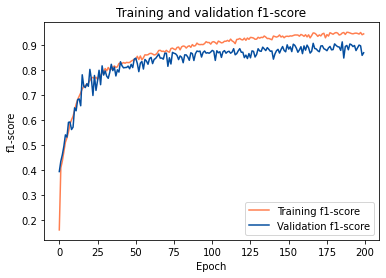

1636532977.8439438


In [38]:
# training for 3 epochs
start = time.time()
n_epochs = 200
train(capsule_net, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

###  fold1(train)

-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2781 	 valid Loss: 0.2680
train acc1: 0.6606 	 valid acc1: 0.6607
train acc2: 0.7629 	 valid acc2: 0.7821
train acc3: 0.8414 	 valid acc3: 0.8618
train acc4: 0.8865 	 valid acc4: 0.9093
train acc5: 0.9212 	 valid acc5: 0.9436
train precision: 0.4129 	 valid precision: 0.4342
train recall: 0.4112 	 valid recall: 0.4377
train f1-score: 0.3934 	 valid f1-score: 0.4253
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2477 	 valid Loss: 0.2451
train acc1: 0.6801 	 valid acc1: 0.6650
train acc2: 0.8146 	 valid acc2: 0.8118
train acc3: 0.8855 	 valid acc3: 0.8957
train acc4: 0.9249 	 valid acc4: 0.9507
train acc5: 0.9513 	 valid acc5: 0.9718
train precision: 0.4372 	 valid precision: 0.4388
train recall: 0.4537 	 valid recall: 0.4477
train f1-score: 0.4388 	 valid f1-score: 0.4349
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2266 	 valid Loss: 0.2282
train acc1: 0.6927 	 valid acc1: 0.6975
train acc2: 0.8373 	 valid acc2: 0.8221
train acc3: 0.9081 	 valid acc3: 0.9007
train acc4: 0.9476 	 valid acc4: 0.9432
train acc5: 0.9705 	 valid acc5: 0.9714
train precision: 0.5198 	 valid precision: 0.5186
train recall: 0.4770 	 valid recall: 0.5163
train f1-score: 0.4736 	 valid f1-score: 0.5105
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2111 	 valid Loss: 0.2116
train acc1: 0.7115 	 valid acc1: 0.7132
train acc2: 0.8480 	 valid acc2: 0.8443
train acc3: 0.9226 	 valid acc3: 0.9229
train acc4: 0.9605 	 valid acc4: 0.9571
train acc5: 0.9779 	 valid acc5: 0.9786
train precision: 0.5770 	 valid precision: 0.6145
train recall: 0.5161 	 valid recall: 0.5704
train f1-score: 0.5203 	 valid f1-score: 0.5693
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1961 	 valid Loss: 0.2058
train acc1: 0.7319 	 valid acc1: 0.7132
train acc2: 0.8649 	 valid acc2: 0.8404
train acc3: 0.9346 	 valid acc3: 0.9254
train acc4: 0.9669 	 valid acc4: 0.9664
train acc5: 0.9833 	 valid acc5: 0.9818
train precision: 0.6720 	 valid precision: 0.6772
train recall: 0.5706 	 valid recall: 0.5506
train f1-score: 0.5790 	 valid f1-score: 0.5615
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1874 	 valid Loss: 0.1934
train acc1: 0.7405 	 valid acc1: 0.7279
train acc2: 0.8760 	 valid acc2: 0.8571
train acc3: 0.9424 	 valid acc3: 0.9321
train acc4: 0.9694 	 valid acc4: 0.9639
train acc5: 0.9860 	 valid acc5: 0.9814
train precision: 0.6823 	 valid precision: 0.6850
train recall: 0.5898 	 valid recall: 0.6155
train f1-score: 0.5951 	 valid f1-score: 0.6116
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1798 	 valid Loss: 0.1861
train acc1: 0.7495 	 valid acc1: 0.7332
train acc2: 0.8817 	 valid acc2: 0.8696
train acc3: 0.9451 	 valid acc3: 0.9361
train acc4: 0.9738 	 valid acc4: 0.9700
train acc5: 0.9879 	 valid acc5: 0.9868
train precision: 0.7574 	 valid precision: 0.6893
train recall: 0.6132 	 valid recall: 0.5988
train f1-score: 0.6203 	 valid f1-score: 0.6072
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1754 	 valid Loss: 0.1824
train acc1: 0.7574 	 valid acc1: 0.7418
train acc2: 0.8856 	 valid acc2: 0.8739
train acc3: 0.9455 	 valid acc3: 0.9375
train acc4: 0.9764 	 valid acc4: 0.9704
train acc5: 0.9890 	 valid acc5: 0.9864
train precision: 0.7011 	 valid precision: 0.7237
train recall: 0.6261 	 valid recall: 0.6493
train f1-score: 0.6328 	 valid f1-score: 0.6412
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1705 	 valid Loss: 0.1761
train acc1: 0.7607 	 valid acc1: 0.7446
train acc2: 0.8986 	 valid acc2: 0.8746
train acc3: 0.9507 	 valid acc3: 0.9457
train acc4: 0.9764 	 valid acc4: 0.9789
train acc5: 0.9904 	 valid acc5: 0.9875
train precision: 0.7479 	 valid precision: 0.7183
train recall: 0.6352 	 valid recall: 0.6535
train f1-score: 0.6434 	 valid f1-score: 0.6435
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1675 	 valid Loss: 0.1748
train acc1: 0.7639 	 valid acc1: 0.7411
train acc2: 0.8983 	 valid acc2: 0.8964
train acc3: 0.9537 	 valid acc3: 0.9514
train acc4: 0.9799 	 valid acc4: 0.9782
train acc5: 0.9908 	 valid acc5: 0.9879
train precision: 0.7465 	 valid precision: 0.7044
train recall: 0.6436 	 valid recall: 0.6258
train f1-score: 0.6538 	 valid f1-score: 0.6368
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1650 	 valid Loss: 0.1761
train acc1: 0.7715 	 valid acc1: 0.7457
train acc2: 0.8996 	 valid acc2: 0.8771
train acc3: 0.9533 	 valid acc3: 0.9532
train acc4: 0.9783 	 valid acc4: 0.9796
train acc5: 0.9898 	 valid acc5: 0.9900
train precision: 0.7659 	 valid precision: 0.7847
train recall: 0.6567 	 valid recall: 0.6187
train f1-score: 0.6693 	 valid f1-score: 0.6206
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1599 	 valid Loss: 0.1594
train acc1: 0.7765 	 valid acc1: 0.7743
train acc2: 0.9048 	 valid acc2: 0.8971
train acc3: 0.9532 	 valid acc3: 0.9525
train acc4: 0.9810 	 valid acc4: 0.9786
train acc5: 0.9918 	 valid acc5: 0.9886
train precision: 0.7604 	 valid precision: 0.7855
train recall: 0.6721 	 valid recall: 0.6862
train f1-score: 0.6846 	 valid f1-score: 0.6997
-------第 13 轮训练开始-------
train Loss: 0.1583 	 valid Loss: 0.1729
train acc1: 0.7764 	 valid acc1: 0.7543
train acc2: 0.9046 	 valid acc2: 0.8854
train acc3: 0.9589 	 valid acc3: 0.9389
train acc4: 0.9807 	 valid acc4: 0.9714
train acc5: 0.9914 	 valid acc5: 0.9875
train precision: 0.7834 	 valid precision: 0.7569
train recall: 0.6717 	 valid recall: 0.6786
train f1-score: 0.6865 	 valid f1-score: 0.6770
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1554 	 valid Loss: 0.1636
train acc1: 0.7829 	 valid acc1: 0.7793
train acc2: 0.9135 	 valid acc2: 0.8996
train acc3: 0.9583 	 valid acc3: 0.9436
train acc4: 0.9818 	 valid acc4: 0.9721
train acc5: 0.9936 	 valid acc5: 0.9861
train precision: 0.7552 	 valid precision: 0.7728
train recall: 0.6934 	 valid recall: 0.7115
train f1-score: 0.7048 	 valid f1-score: 0.7186
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1495 	 valid Loss: 0.1719
train acc1: 0.7902 	 valid acc1: 0.7604
train acc2: 0.9171 	 valid acc2: 0.8846
train acc3: 0.9619 	 valid acc3: 0.9386
train acc4: 0.9835 	 valid acc4: 0.9575
train acc5: 0.9930 	 valid acc5: 0.9775
train precision: 0.7738 	 valid precision: 0.7785
train recall: 0.7016 	 valid recall: 0.6788
train f1-score: 0.7135 	 valid f1-score: 0.6698
-------第 16 轮训练开始-------
train Loss: 0.1503 	 valid Loss: 0.1544
train acc1: 0.7931 	 valid acc1: 0.7886
train acc2: 0.9149 	 valid acc2: 0.9082
train acc3: 0.9604 	 valid acc3: 0.9546
train acc4: 0.9844 	 valid acc4: 0.9786
train acc5: 0.9927 	 valid acc5: 0.9889
train precision: 0.8011 	 valid precision: 0.8173
train recall: 0.7078 	 valid recall: 0.7301
train f1-score: 0.7202 	 valid f1-score: 0.7279
-------第 17 轮训练开始-------
train Loss: 0.1428 	 valid Loss: 0.1518
train acc1: 0.8057 	 valid acc1: 0.7814
train acc2: 0.9201 	 valid acc2: 0.9071
train acc3: 0.9661 	 valid acc3: 0.9575
train acc4: 0.9889 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1384 	 valid Loss: 0.1473
train acc1: 0.8104 	 valid acc1: 0.7918
train acc2: 0.9257 	 valid acc2: 0.9114
train acc3: 0.9694 	 valid acc3: 0.9607
train acc4: 0.9887 	 valid acc4: 0.9839
train acc5: 0.9956 	 valid acc5: 0.9921
train precision: 0.8067 	 valid precision: 0.8070
train recall: 0.7432 	 valid recall: 0.7198
train f1-score: 0.7522 	 valid f1-score: 0.7291
-------第 23 轮训练开始-------
train Loss: 0.1356 	 valid Loss: 0.1554
train acc1: 0.8163 	 valid acc1: 0.7836
train acc2: 0.9274 	 valid acc2: 0.9118
train acc3: 0.9712 	 valid acc3: 0.9625
train acc4: 0.9886 	 valid acc4: 0.9850
train acc5: 0.9955 	 valid acc5: 0.9925
train precision: 0.8202 	 valid precision: 0.8363
train recall: 0.7502 	 valid recall: 0.6900
train f1-score: 0.7592 	 valid f1-score: 0.7151
-------第 24 轮训练开始-------
train Loss: 0.1339 	 valid Loss: 0.1421
train acc1: 0.8135 	 valid acc1: 0.7989
train acc2: 0.9304 	 valid acc2: 0.9236
train acc3: 0.9720 	 valid acc3: 0.9607
train acc4: 0.9905 	 valid

train Loss: 0.1099 	 valid Loss: 0.1173
train acc1: 0.8477 	 valid acc1: 0.8443
train acc2: 0.9588 	 valid acc2: 0.9436
train acc3: 0.9861 	 valid acc3: 0.9789
train acc4: 0.9948 	 valid acc4: 0.9907
train acc5: 0.9986 	 valid acc5: 0.9957
train precision: 0.8535 	 valid precision: 0.8509
train recall: 0.8061 	 valid recall: 0.8173
train f1-score: 0.8138 	 valid f1-score: 0.8163
-------第 44 轮训练开始-------
train Loss: 0.1057 	 valid Loss: 0.1198
train acc1: 0.8571 	 valid acc1: 0.8475
train acc2: 0.9613 	 valid acc2: 0.9439
train acc3: 0.9879 	 valid acc3: 0.9750
train acc4: 0.9965 	 valid acc4: 0.9879
train acc5: 0.9988 	 valid acc5: 0.9946
train precision: 0.8646 	 valid precision: 0.8625
train recall: 0.8197 	 valid recall: 0.8270
train f1-score: 0.8261 	 valid f1-score: 0.8249
-------第 45 轮训练开始-------
train Loss: 0.1042 	 valid Loss: 0.1197
train acc1: 0.8588 	 valid acc1: 0.8389
train acc2: 0.9624 	 valid acc2: 0.9421
train acc3: 0.9871 	 valid acc3: 0.9782
train acc4: 0.9963 	 valid

train Loss: 0.0892 	 valid Loss: 0.1072
train acc1: 0.8787 	 valid acc1: 0.8561
train acc2: 0.9760 	 valid acc2: 0.9525
train acc3: 0.9948 	 valid acc3: 0.9793
train acc4: 0.9981 	 valid acc4: 0.9879
train acc5: 0.9996 	 valid acc5: 0.9936
train precision: 0.8882 	 valid precision: 0.8594
train recall: 0.8519 	 valid recall: 0.8308
train f1-score: 0.8596 	 valid f1-score: 0.8338
-------第 65 轮训练开始-------
train Loss: 0.0887 	 valid Loss: 0.1021
train acc1: 0.8801 	 valid acc1: 0.8650
train acc2: 0.9761 	 valid acc2: 0.9621
train acc3: 0.9936 	 valid acc3: 0.9814
train acc4: 0.9981 	 valid acc4: 0.9904
train acc5: 0.9993 	 valid acc5: 0.9939
train precision: 0.8874 	 valid precision: 0.8841
train recall: 0.8501 	 valid recall: 0.8264
train f1-score: 0.8578 	 valid f1-score: 0.8423
-------第 66 轮训练开始-------
train Loss: 0.0882 	 valid Loss: 0.1141
train acc1: 0.8814 	 valid acc1: 0.8357
train acc2: 0.9767 	 valid acc2: 0.9521
train acc3: 0.9936 	 valid acc3: 0.9754
train acc4: 0.9977 	 valid

train Loss: 0.0770 	 valid Loss: 0.1010
train acc1: 0.8963 	 valid acc1: 0.8643
train acc2: 0.9817 	 valid acc2: 0.9586
train acc3: 0.9957 	 valid acc3: 0.9807
train acc4: 0.9988 	 valid acc4: 0.9921
train acc5: 0.9996 	 valid acc5: 0.9943
train precision: 0.9040 	 valid precision: 0.8750
train recall: 0.8699 	 valid recall: 0.8361
train f1-score: 0.8787 	 valid f1-score: 0.8492
-------第 86 轮训练开始-------
train Loss: 0.0752 	 valid Loss: 0.0934
train acc1: 0.8970 	 valid acc1: 0.8771
train acc2: 0.9843 	 valid acc2: 0.9643
train acc3: 0.9963 	 valid acc3: 0.9796
train acc4: 0.9990 	 valid acc4: 0.9879
train acc5: 0.9996 	 valid acc5: 0.9914
train precision: 0.9059 	 valid precision: 0.8994
train recall: 0.8756 	 valid recall: 0.8488
train f1-score: 0.8828 	 valid f1-score: 0.8616
-------第 87 轮训练开始-------
train Loss: 0.0733 	 valid Loss: 0.0957
train acc1: 0.8990 	 valid acc1: 0.8725
train acc2: 0.9845 	 valid acc2: 0.9593
train acc3: 0.9969 	 valid acc3: 0.9825
train acc4: 0.9993 	 valid

train Loss: 0.0667 	 valid Loss: 0.0944
train acc1: 0.9117 	 valid acc1: 0.8793
train acc2: 0.9862 	 valid acc2: 0.9604
train acc3: 0.9973 	 valid acc3: 0.9775
train acc4: 0.9992 	 valid acc4: 0.9861
train acc5: 1.0000 	 valid acc5: 0.9929
train precision: 0.9194 	 valid precision: 0.8717
train recall: 0.8914 	 valid recall: 0.8753
train f1-score: 0.8996 	 valid f1-score: 0.8654
-------第 107 轮训练开始-------
train Loss: 0.0637 	 valid Loss: 0.0915
train acc1: 0.9138 	 valid acc1: 0.8793
train acc2: 0.9882 	 valid acc2: 0.9643
train acc3: 0.9974 	 valid acc3: 0.9821
train acc4: 0.9998 	 valid acc4: 0.9882
train acc5: 0.9999 	 valid acc5: 0.9932
train precision: 0.9190 	 valid precision: 0.8828
train recall: 0.8960 	 valid recall: 0.8683
train f1-score: 0.9025 	 valid f1-score: 0.8728
-------第 108 轮训练开始-------
train Loss: 0.0656 	 valid Loss: 0.0957
train acc1: 0.9115 	 valid acc1: 0.8739
train acc2: 0.9875 	 valid acc2: 0.9646
train acc3: 0.9979 	 valid acc3: 0.9857
train acc4: 0.9993 	 val

train Loss: 0.0577 	 valid Loss: 0.0870
train acc1: 0.9233 	 valid acc1: 0.8921
train acc2: 0.9919 	 valid acc2: 0.9661
train acc3: 0.9992 	 valid acc3: 0.9832
train acc4: 0.9999 	 valid acc4: 0.9896
train acc5: 0.9999 	 valid acc5: 0.9929
train precision: 0.9296 	 valid precision: 0.8872
train recall: 0.9052 	 valid recall: 0.8873
train f1-score: 0.9135 	 valid f1-score: 0.8812
-------第 128 轮训练开始-------
train Loss: 0.0557 	 valid Loss: 0.0942
train acc1: 0.9252 	 valid acc1: 0.8804
train acc2: 0.9907 	 valid acc2: 0.9621
train acc3: 0.9992 	 valid acc3: 0.9829
train acc4: 0.9999 	 valid acc4: 0.9900
train acc5: 1.0000 	 valid acc5: 0.9921
train precision: 0.9306 	 valid precision: 0.8800
train recall: 0.9108 	 valid recall: 0.8653
train f1-score: 0.9168 	 valid f1-score: 0.8661
-------第 129 轮训练开始-------
train Loss: 0.0609 	 valid Loss: 0.0931
train acc1: 0.9205 	 valid acc1: 0.8789
train acc2: 0.9907 	 valid acc2: 0.9661
train acc3: 0.9980 	 valid acc3: 0.9800
train acc4: 0.9994 	 val

train Loss: 0.0517 	 valid Loss: 0.0949
train acc1: 0.9318 	 valid acc1: 0.8796
train acc2: 0.9946 	 valid acc2: 0.9614
train acc3: 0.9990 	 valid acc3: 0.9775
train acc4: 0.9995 	 valid acc4: 0.9857
train acc5: 1.0000 	 valid acc5: 0.9900
train precision: 0.9374 	 valid precision: 0.8711
train recall: 0.9170 	 valid recall: 0.8745
train f1-score: 0.9238 	 valid f1-score: 0.8670
-------第 149 轮训练开始-------
train Loss: 0.0526 	 valid Loss: 0.0873
train acc1: 0.9321 	 valid acc1: 0.8911
train acc2: 0.9942 	 valid acc2: 0.9664
train acc3: 0.9988 	 valid acc3: 0.9832
train acc4: 0.9996 	 valid acc4: 0.9893
train acc5: 1.0000 	 valid acc5: 0.9914
train precision: 0.9377 	 valid precision: 0.8957
train recall: 0.9172 	 valid recall: 0.8764
train f1-score: 0.9242 	 valid f1-score: 0.8824
-------第 150 轮训练开始-------
train Loss: 0.0520 	 valid Loss: 0.0893
train acc1: 0.9329 	 valid acc1: 0.8821
train acc2: 0.9957 	 valid acc2: 0.9696
train acc3: 0.9995 	 valid acc3: 0.9814
train acc4: 0.9999 	 val

train Loss: 0.0457 	 valid Loss: 0.0879
train acc1: 0.9423 	 valid acc1: 0.8879
train acc2: 0.9951 	 valid acc2: 0.9700
train acc3: 0.9986 	 valid acc3: 0.9846
train acc4: 0.9999 	 valid acc4: 0.9900
train acc5: 1.0000 	 valid acc5: 0.9914
train precision: 0.9473 	 valid precision: 0.9023
train recall: 0.9285 	 valid recall: 0.8604
train f1-score: 0.9350 	 valid f1-score: 0.8754
-------第 170 轮训练开始-------
train Loss: 0.0446 	 valid Loss: 0.0799
train acc1: 0.9425 	 valid acc1: 0.9036
train acc2: 0.9946 	 valid acc2: 0.9696
train acc3: 0.9990 	 valid acc3: 0.9843
train acc4: 0.9999 	 valid acc4: 0.9879
train acc5: 0.9999 	 valid acc5: 0.9907
train precision: 0.9467 	 valid precision: 0.9139
train recall: 0.9288 	 valid recall: 0.8871
train f1-score: 0.9352 	 valid f1-score: 0.8973
-------第 171 轮训练开始-------
train Loss: 0.0473 	 valid Loss: 0.0835
train acc1: 0.9386 	 valid acc1: 0.9021
train acc2: 0.9955 	 valid acc2: 0.9686
train acc3: 0.9989 	 valid acc3: 0.9782
train acc4: 0.9995 	 val

train Loss: 0.0398 	 valid Loss: 0.0845
train acc1: 0.9494 	 valid acc1: 0.8975
train acc2: 0.9979 	 valid acc2: 0.9689
train acc3: 0.9996 	 valid acc3: 0.9811
train acc4: 1.0000 	 valid acc4: 0.9871
train acc5: 1.0000 	 valid acc5: 0.9907
train precision: 0.9529 	 valid precision: 0.9067
train recall: 0.9358 	 valid recall: 0.8831
train f1-score: 0.9422 	 valid f1-score: 0.8901
-------第 191 轮训练开始-------
train Loss: 0.0482 	 valid Loss: 0.0932
train acc1: 0.9385 	 valid acc1: 0.8893
train acc2: 0.9946 	 valid acc2: 0.9661
train acc3: 0.9987 	 valid acc3: 0.9814
train acc4: 0.9996 	 valid acc4: 0.9879
train acc5: 0.9999 	 valid acc5: 0.9914
train precision: 0.9403 	 valid precision: 0.8876
train recall: 0.9221 	 valid recall: 0.8831
train f1-score: 0.9288 	 valid f1-score: 0.8821
-------第 192 轮训练开始-------
train Loss: 0.0478 	 valid Loss: 0.0887
train acc1: 0.9390 	 valid acc1: 0.8950
train acc2: 0.9942 	 valid acc2: 0.9654
train acc3: 0.9992 	 valid acc3: 0.9789
train acc4: 0.9996 	 val

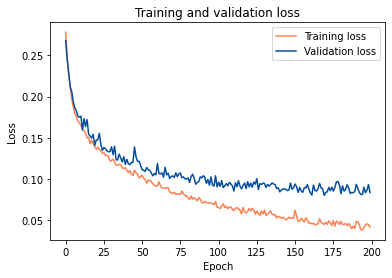

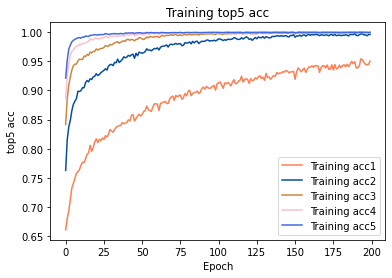

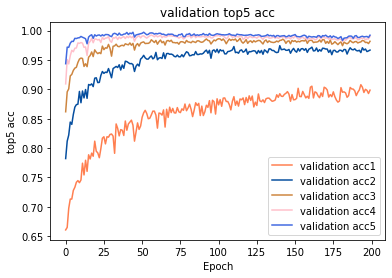

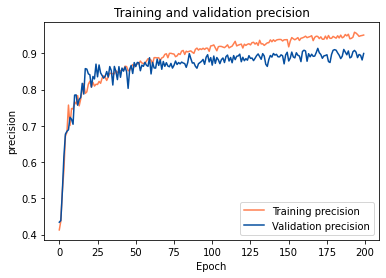

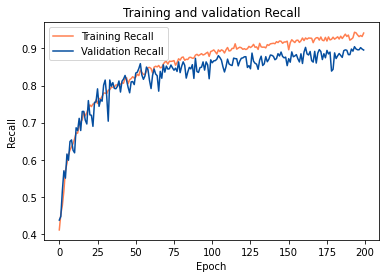

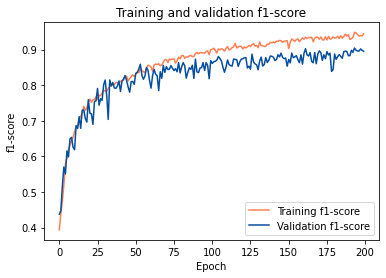

1636551037.9762208


In [135]:
# training for 3 epochs
start = time.time()
n_epochs = 200
train(capsule_net, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

###  fold2(train)

-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.4372 	 valid Loss: 0.2907
train acc1: 0.5302 	 valid acc1: 0.6668
train acc2: 0.6061 	 valid acc2: 0.7786
train acc3: 0.6707 	 valid acc3: 0.8343
train acc4: 0.7221 	 valid acc4: 0.8868
train acc5: 0.7644 	 valid acc5: 0.9193
train precision: 0.2743 	 valid precision: 0.3606
train recall: 0.1435 	 valid recall: 0.3966
train f1-score: 0.1497 	 valid f1-score: 0.3677
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2734 	 valid Loss: 0.2509
train acc1: 0.6608 	 valid acc1: 0.6846
train acc2: 0.7893 	 valid acc2: 0.8086
train acc3: 0.8515 	 valid acc3: 0.8736
train acc4: 0.8948 	 valid acc4: 0.9171
train acc5: 0.9283 	 valid acc5: 0.9507
train precision: 0.4464 	 valid precision: 0.4662
train recall: 0.4225 	 valid recall: 0.4368
train f1-score: 0.4029 	 valid f1-score: 0.4262
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2502 	 valid Loss: 0.2332
train acc1: 0.6755 	 valid acc1: 0.6907
train acc2: 0.8127 	 valid acc2: 0.8304
train acc3: 0.8854 	 valid acc3: 0.9057
train acc4: 0.9260 	 valid acc4: 0.9468
train acc5: 0.9527 	 valid acc5: 0.9629
train precision: 0.4607 	 valid precision: 0.4626
train recall: 0.4572 	 valid recall: 0.4524
train f1-score: 0.4454 	 valid f1-score: 0.4464
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2347 	 valid Loss: 0.2185
train acc1: 0.6858 	 valid acc1: 0.6996
train acc2: 0.8232 	 valid acc2: 0.8389
train acc3: 0.9040 	 valid acc3: 0.9125
train acc4: 0.9394 	 valid acc4: 0.9489
train acc5: 0.9643 	 valid acc5: 0.9661
train precision: 0.4922 	 valid precision: 0.4984
train recall: 0.4830 	 valid recall: 0.4860
train f1-score: 0.4741 	 valid f1-score: 0.4831
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2201 	 valid Loss: 0.2132
train acc1: 0.6967 	 valid acc1: 0.7061
train acc2: 0.8333 	 valid acc2: 0.8314
train acc3: 0.9117 	 valid acc3: 0.9096
train acc4: 0.9506 	 valid acc4: 0.9425
train acc5: 0.9757 	 valid acc5: 0.9693
train precision: 0.6121 	 valid precision: 0.6021
train recall: 0.5055 	 valid recall: 0.4970
train f1-score: 0.5049 	 valid f1-score: 0.4989
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2083 	 valid Loss: 0.1967
train acc1: 0.7079 	 valid acc1: 0.7343
train acc2: 0.8506 	 valid acc2: 0.8500
train acc3: 0.9229 	 valid acc3: 0.9332
train acc4: 0.9585 	 valid acc4: 0.9661
train acc5: 0.9785 	 valid acc5: 0.9825
train precision: 0.6100 	 valid precision: 0.6094
train recall: 0.5339 	 valid recall: 0.5584
train f1-score: 0.5446 	 valid f1-score: 0.5661
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1969 	 valid Loss: 0.1972
train acc1: 0.7280 	 valid acc1: 0.7396
train acc2: 0.8601 	 valid acc2: 0.8607
train acc3: 0.9289 	 valid acc3: 0.9239
train acc4: 0.9651 	 valid acc4: 0.9507
train acc5: 0.9825 	 valid acc5: 0.9725
train precision: 0.6487 	 valid precision: 0.7086
train recall: 0.5768 	 valid recall: 0.5669
train f1-score: 0.5889 	 valid f1-score: 0.5808
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1925 	 valid Loss: 0.1801
train acc1: 0.7380 	 valid acc1: 0.7618
train acc2: 0.8687 	 valid acc2: 0.8836
train acc3: 0.9362 	 valid acc3: 0.9407
train acc4: 0.9664 	 valid acc4: 0.9696
train acc5: 0.9830 	 valid acc5: 0.9868
train precision: 0.7095 	 valid precision: 0.6540
train recall: 0.5993 	 valid recall: 0.6447
train f1-score: 0.6101 	 valid f1-score: 0.6390
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1846 	 valid Loss: 0.1761
train acc1: 0.7467 	 valid acc1: 0.7636
train acc2: 0.8794 	 valid acc2: 0.8936
train acc3: 0.9415 	 valid acc3: 0.9411
train acc4: 0.9714 	 valid acc4: 0.9689
train acc5: 0.9874 	 valid acc5: 0.9836
train precision: 0.7168 	 valid precision: 0.7782
train recall: 0.6216 	 valid recall: 0.6178
train f1-score: 0.6276 	 valid f1-score: 0.6299
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1775 	 valid Loss: 0.1760
train acc1: 0.7552 	 valid acc1: 0.7646
train acc2: 0.8850 	 valid acc2: 0.8854
train acc3: 0.9435 	 valid acc3: 0.9404
train acc4: 0.9737 	 valid acc4: 0.9686
train acc5: 0.9886 	 valid acc5: 0.9854
train precision: 0.7357 	 valid precision: 0.7563
train recall: 0.6403 	 valid recall: 0.6345
train f1-score: 0.6468 	 valid f1-score: 0.6453
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1716 	 valid Loss: 0.1625
train acc1: 0.7655 	 valid acc1: 0.7800
train acc2: 0.8901 	 valid acc2: 0.9029
train acc3: 0.9462 	 valid acc3: 0.9486
train acc4: 0.9769 	 valid acc4: 0.9768
train acc5: 0.9899 	 valid acc5: 0.9918
train precision: 0.7658 	 valid precision: 0.7798
train recall: 0.6602 	 valid recall: 0.6702
train f1-score: 0.6672 	 valid f1-score: 0.6723
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1661 	 valid Loss: 0.1619
train acc1: 0.7738 	 valid acc1: 0.7779
train acc2: 0.8949 	 valid acc2: 0.8943
train acc3: 0.9500 	 valid acc3: 0.9489
train acc4: 0.9773 	 valid acc4: 0.9750
train acc5: 0.9899 	 valid acc5: 0.9864
train precision: 0.7614 	 valid precision: 0.7359
train recall: 0.6718 	 valid recall: 0.6806
train f1-score: 0.6803 	 valid f1-score: 0.6768
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1618 	 valid Loss: 0.1625
train acc1: 0.7730 	 valid acc1: 0.7696
train acc2: 0.9014 	 valid acc2: 0.8932
train acc3: 0.9540 	 valid acc3: 0.9529
train acc4: 0.9810 	 valid acc4: 0.9836
train acc5: 0.9919 	 valid acc5: 0.9932
train precision: 0.7622 	 valid precision: 0.7502
train recall: 0.6754 	 valid recall: 0.6424
train f1-score: 0.6869 	 valid f1-score: 0.6580
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1563 	 valid Loss: 0.1502
train acc1: 0.7839 	 valid acc1: 0.7911
train acc2: 0.9056 	 valid acc2: 0.9129
train acc3: 0.9563 	 valid acc3: 0.9614
train acc4: 0.9849 	 valid acc4: 0.9821
train acc5: 0.9936 	 valid acc5: 0.9907
train precision: 0.7689 	 valid precision: 0.7436
train recall: 0.6938 	 valid recall: 0.6890
train f1-score: 0.7046 	 valid f1-score: 0.7009
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1543 	 valid Loss: 0.1525
train acc1: 0.7844 	 valid acc1: 0.7843
train acc2: 0.9046 	 valid acc2: 0.9100
train acc3: 0.9600 	 valid acc3: 0.9604
train acc4: 0.9850 	 valid acc4: 0.9854
train acc5: 0.9925 	 valid acc5: 0.9936
train precision: 0.7677 	 valid precision: 0.7568
train recall: 0.6992 	 valid recall: 0.6982
train f1-score: 0.7082 	 valid f1-score: 0.7030
-------第 16 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1495 	 valid Loss: 0.1499
train acc1: 0.7931 	 valid acc1: 0.7918
train acc2: 0.9121 	 valid acc2: 0.9146
train acc3: 0.9611 	 valid acc3: 0.9575
train acc4: 0.9842 	 valid acc4: 0.9782
train acc5: 0.9932 	 valid acc5: 0.9896
train precision: 0.7816 	 valid precision: 0.7424
train recall: 0.7131 	 valid recall: 0.7217
train f1-score: 0.7239 	 valid f1-score: 0.7038
-------第 17 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1466 	 valid Loss: 0.1390
train acc1: 0.7930 	 valid acc1: 0.8100
train acc2: 0.9161 	 valid acc2: 0.9257
train acc3: 0.9663 	 valid acc3: 0.9621
train acc4: 0.9873 	 valid acc4: 0.9854
train acc5: 0.9945 	 valid acc5: 0.9918
train precision: 0.7700 	 valid precision: 0.7811
train recall: 0.7180 	 valid recall: 0.7196
train f1-score: 0.7275 	 valid f1-score: 0.7334
-------第 18 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1442 	 valid Loss: 0.1397
train acc1: 0.7999 	 valid acc1: 0.7900
train acc2: 0.9190 	 valid acc2: 0.9311
train acc3: 0.9658 	 valid acc3: 0.9675
train acc4: 0.9862 	 valid acc4: 0.9868
train acc5: 0.9944 	 valid acc5: 0.9929
train precision: 0.7827 	 valid precision: 0.7816
train recall: 0.7259 	 valid recall: 0.6618
train f1-score: 0.7355 	 valid f1-score: 0.6901
-------第 19 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1428 	 valid Loss: 0.1436
train acc1: 0.8000 	 valid acc1: 0.8004
train acc2: 0.9225 	 valid acc2: 0.9236
train acc3: 0.9693 	 valid acc3: 0.9686
train acc4: 0.9886 	 valid acc4: 0.9886
train acc5: 0.9948 	 valid acc5: 0.9939
train precision: 0.7791 	 valid precision: 0.7742
train recall: 0.7292 	 valid recall: 0.7175
train f1-score: 0.7394 	 valid f1-score: 0.7329
-------第 20 轮训练开始-------
train Loss: 0.1378 	 valid Loss: 0.1339
train acc1: 0.8077 	 valid acc1: 0.8136
train acc2: 0.9274 	 valid acc2: 0.9346
train acc3: 0.9699 	 valid acc3: 0.9804
train acc4: 0.9881 	 valid acc4: 0.9900
train acc5: 0.9951 	 valid acc5: 0.9943
train precision: 0.8471 	 valid precision: 0.8528
train recall: 0.7480 	 valid recall: 0.7233
train f1-score: 0.7543 	 valid f1-score: 0.7395
-------第 21 轮训练开始-------
train Loss: 0.1349 	 valid Loss: 0.1387
train acc1: 0.8118 	 valid acc1: 0.8079
train acc2: 0.9289 	 valid acc2: 0.9268
train acc3: 0.9724 	 valid acc3: 0.9732
train acc4: 0.9906 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1350 	 valid Loss: 0.1398
train acc1: 0.8137 	 valid acc1: 0.8032
train acc2: 0.9290 	 valid acc2: 0.9279
train acc3: 0.9727 	 valid acc3: 0.9689
train acc4: 0.9895 	 valid acc4: 0.9875
train acc5: 0.9960 	 valid acc5: 0.9936
train precision: 0.7918 	 valid precision: 0.7541
train recall: 0.7565 	 valid recall: 0.7613
train f1-score: 0.7602 	 valid f1-score: 0.7405
-------第 23 轮训练开始-------
train Loss: 0.1385 	 valid Loss: 0.1287
train acc1: 0.8026 	 valid acc1: 0.8264
train acc2: 0.9307 	 valid acc2: 0.9379
train acc3: 0.9707 	 valid acc3: 0.9786
train acc4: 0.9886 	 valid acc4: 0.9907
train acc5: 0.9946 	 valid acc5: 0.9968
train precision: 0.7875 	 valid precision: 0.8454
train recall: 0.7402 	 valid recall: 0.7673
train f1-score: 0.7458 	 valid f1-score: 0.7666
-------第 24 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1340 	 valid Loss: 0.1335
train acc1: 0.8119 	 valid acc1: 0.8100
train acc2: 0.9332 	 valid acc2: 0.9354
train acc3: 0.9749 	 valid acc3: 0.9711
train acc4: 0.9915 	 valid acc4: 0.9868
train acc5: 0.9969 	 valid acc5: 0.9954
train precision: 0.8134 	 valid precision: 0.7845
train recall: 0.7544 	 valid recall: 0.7159
train f1-score: 0.7600 	 valid f1-score: 0.7287
-------第 25 轮训练开始-------
train Loss: 0.1339 	 valid Loss: 0.1344
train acc1: 0.8135 	 valid acc1: 0.8129
train acc2: 0.9324 	 valid acc2: 0.9286
train acc3: 0.9756 	 valid acc3: 0.9693
train acc4: 0.9902 	 valid acc4: 0.9886
train acc5: 0.9955 	 valid acc5: 0.9961
train precision: 0.8331 	 valid precision: 0.8163
train recall: 0.7588 	 valid recall: 0.7770
train f1-score: 0.7627 	 valid f1-score: 0.7541
-------第 26 轮训练开始-------
train Loss: 0.1278 	 valid Loss: 0.1312
train acc1: 0.8206 	 valid acc1: 0.8157
train acc2: 0.9408 	 valid acc2: 0.9346
train acc3: 0.9792 	 valid acc3: 0.9786
train acc4: 0.9927 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1238 	 valid Loss: 0.1270
train acc1: 0.8288 	 valid acc1: 0.8161
train acc2: 0.9444 	 valid acc2: 0.9425
train acc3: 0.9801 	 valid acc3: 0.9725
train acc4: 0.9927 	 valid acc4: 0.9893
train acc5: 0.9969 	 valid acc5: 0.9943
train precision: 0.8345 	 valid precision: 0.8143
train recall: 0.7798 	 valid recall: 0.7240
train f1-score: 0.7847 	 valid f1-score: 0.7431
-------第 29 轮训练开始-------
train Loss: 0.1221 	 valid Loss: 0.1204
train acc1: 0.8288 	 valid acc1: 0.8296
train acc2: 0.9450 	 valid acc2: 0.9479
train acc3: 0.9806 	 valid acc3: 0.9754
train acc4: 0.9939 	 valid acc4: 0.9918
train acc5: 0.9975 	 valid acc5: 0.9950
train precision: 0.8280 	 valid precision: 0.8278
train recall: 0.7826 	 valid recall: 0.7678
train f1-score: 0.7838 	 valid f1-score: 0.7652
-------第 30 轮训练开始-------
train Loss: 0.1218 	 valid Loss: 0.1209
train acc1: 0.8289 	 valid acc1: 0.8339
train acc2: 0.9480 	 valid acc2: 0.9468
train acc3: 0.9819 	 valid acc3: 0.9818
train acc4: 0.9944 	 valid

train Loss: 0.0957 	 valid Loss: 0.1053
train acc1: 0.8644 	 valid acc1: 0.8546
train acc2: 0.9715 	 valid acc2: 0.9614
train acc3: 0.9930 	 valid acc3: 0.9850
train acc4: 0.9976 	 valid acc4: 0.9929
train acc5: 0.9988 	 valid acc5: 0.9957
train precision: 0.8715 	 valid precision: 0.8493
train recall: 0.8386 	 valid recall: 0.8130
train f1-score: 0.8433 	 valid f1-score: 0.8175
-------第 50 轮训练开始-------
train Loss: 0.0948 	 valid Loss: 0.1002
train acc1: 0.8658 	 valid acc1: 0.8671
train acc2: 0.9721 	 valid acc2: 0.9679
train acc3: 0.9930 	 valid acc3: 0.9889
train acc4: 0.9979 	 valid acc4: 0.9932
train acc5: 0.9989 	 valid acc5: 0.9957
train precision: 0.8700 	 valid precision: 0.8618
train recall: 0.8442 	 valid recall: 0.8320
train f1-score: 0.8472 	 valid f1-score: 0.8336
-------第 51 轮训练开始-------
train Loss: 0.0922 	 valid Loss: 0.0977
train acc1: 0.8721 	 valid acc1: 0.8693
train acc2: 0.9729 	 valid acc2: 0.9693
train acc3: 0.9923 	 valid acc3: 0.9889
train acc4: 0.9977 	 valid

train Loss: 0.0743 	 valid Loss: 0.0898
train acc1: 0.8999 	 valid acc1: 0.8811
train acc2: 0.9854 	 valid acc2: 0.9686
train acc3: 0.9963 	 valid acc3: 0.9886
train acc4: 0.9989 	 valid acc4: 0.9939
train acc5: 0.9992 	 valid acc5: 0.9943
train precision: 0.9039 	 valid precision: 0.8728
train recall: 0.8849 	 valid recall: 0.8506
train f1-score: 0.8887 	 valid f1-score: 0.8560
-------第 71 轮训练开始-------
train Loss: 0.0766 	 valid Loss: 0.0926
train acc1: 0.8975 	 valid acc1: 0.8757
train acc2: 0.9833 	 valid acc2: 0.9714
train acc3: 0.9957 	 valid acc3: 0.9893
train acc4: 0.9994 	 valid acc4: 0.9929
train acc5: 0.9998 	 valid acc5: 0.9950
train precision: 0.9015 	 valid precision: 0.8652
train recall: 0.8798 	 valid recall: 0.8503
train f1-score: 0.8857 	 valid f1-score: 0.8477
-------第 72 轮训练开始-------
train Loss: 0.0752 	 valid Loss: 0.1020
train acc1: 0.8968 	 valid acc1: 0.8668
train acc2: 0.9846 	 valid acc2: 0.9668
train acc3: 0.9965 	 valid acc3: 0.9864
train acc4: 0.9994 	 valid

train Loss: 0.0593 	 valid Loss: 0.0797
train acc1: 0.9192 	 valid acc1: 0.9029
train acc2: 0.9910 	 valid acc2: 0.9764
train acc3: 0.9994 	 valid acc3: 0.9879
train acc4: 0.9998 	 valid acc4: 0.9907
train acc5: 0.9999 	 valid acc5: 0.9929
train precision: 0.9260 	 valid precision: 0.9071
train recall: 0.9076 	 valid recall: 0.8704
train f1-score: 0.9129 	 valid f1-score: 0.8814
-------第 92 轮训练开始-------
train Loss: 0.0589 	 valid Loss: 0.0867
train acc1: 0.9227 	 valid acc1: 0.8864
train acc2: 0.9912 	 valid acc2: 0.9746
train acc3: 0.9992 	 valid acc3: 0.9864
train acc4: 0.9998 	 valid acc4: 0.9886
train acc5: 1.0000 	 valid acc5: 0.9918
train precision: 0.9243 	 valid precision: 0.8668
train recall: 0.9077 	 valid recall: 0.8669
train f1-score: 0.9127 	 valid f1-score: 0.8637
-------第 93 轮训练开始-------
train Loss: 0.0658 	 valid Loss: 0.0795
train acc1: 0.9107 	 valid acc1: 0.8932
train acc2: 0.9896 	 valid acc2: 0.9782
train acc3: 0.9981 	 valid acc3: 0.9886
train acc4: 0.9995 	 valid

train Loss: 0.0557 	 valid Loss: 0.0919
train acc1: 0.9238 	 valid acc1: 0.8904
train acc2: 0.9927 	 valid acc2: 0.9668
train acc3: 0.9981 	 valid acc3: 0.9839
train acc4: 0.9995 	 valid acc4: 0.9900
train acc5: 0.9998 	 valid acc5: 0.9932
train precision: 0.9259 	 valid precision: 0.8778
train recall: 0.9113 	 valid recall: 0.8705
train f1-score: 0.9162 	 valid f1-score: 0.8699
-------第 113 轮训练开始-------
train Loss: 0.0550 	 valid Loss: 0.0841
train acc1: 0.9267 	 valid acc1: 0.8871
train acc2: 0.9929 	 valid acc2: 0.9736
train acc3: 0.9990 	 valid acc3: 0.9839
train acc4: 0.9996 	 valid acc4: 0.9914
train acc5: 0.9998 	 valid acc5: 0.9929
train precision: 0.9296 	 valid precision: 0.8686
train recall: 0.9160 	 valid recall: 0.8659
train f1-score: 0.9197 	 valid f1-score: 0.8633
-------第 114 轮训练开始-------
train Loss: 0.0510 	 valid Loss: 0.0753
train acc1: 0.9315 	 valid acc1: 0.9018
train acc2: 0.9936 	 valid acc2: 0.9750
train acc3: 0.9982 	 valid acc3: 0.9868
train acc4: 0.9996 	 val

train Loss: 0.0487 	 valid Loss: 0.0774
train acc1: 0.9392 	 valid acc1: 0.9032
train acc2: 0.9946 	 valid acc2: 0.9729
train acc3: 0.9990 	 valid acc3: 0.9850
train acc4: 0.9994 	 valid acc4: 0.9893
train acc5: 0.9994 	 valid acc5: 0.9900
train precision: 0.9407 	 valid precision: 0.8915
train recall: 0.9299 	 valid recall: 0.8766
train f1-score: 0.9334 	 valid f1-score: 0.8809
-------第 134 轮训练开始-------
train Loss: 0.0457 	 valid Loss: 0.0776
train acc1: 0.9413 	 valid acc1: 0.9021
train acc2: 0.9967 	 valid acc2: 0.9746
train acc3: 0.9995 	 valid acc3: 0.9839
train acc4: 0.9999 	 valid acc4: 0.9879
train acc5: 1.0000 	 valid acc5: 0.9911
train precision: 0.9423 	 valid precision: 0.8919
train recall: 0.9312 	 valid recall: 0.8785
train f1-score: 0.9350 	 valid f1-score: 0.8818
-------第 135 轮训练开始-------
train Loss: 0.0439 	 valid Loss: 0.0715
train acc1: 0.9449 	 valid acc1: 0.9168
train acc2: 0.9967 	 valid acc2: 0.9789
train acc3: 0.9994 	 valid acc3: 0.9882
train acc4: 0.9996 	 val

train Loss: 0.0400 	 valid Loss: 0.0680
train acc1: 0.9519 	 valid acc1: 0.9186
train acc2: 0.9968 	 valid acc2: 0.9818
train acc3: 0.9994 	 valid acc3: 0.9879
train acc4: 0.9998 	 valid acc4: 0.9889
train acc5: 1.0000 	 valid acc5: 0.9921
train precision: 0.9496 	 valid precision: 0.9149
train recall: 0.9432 	 valid recall: 0.8990
train f1-score: 0.9453 	 valid f1-score: 0.9042
-------第 155 轮训练开始-------
train Loss: 0.0371 	 valid Loss: 0.0740
train acc1: 0.9546 	 valid acc1: 0.9136
train acc2: 0.9986 	 valid acc2: 0.9789
train acc3: 0.9998 	 valid acc3: 0.9857
train acc4: 0.9999 	 valid acc4: 0.9889
train acc5: 0.9999 	 valid acc5: 0.9907
train precision: 0.9566 	 valid precision: 0.8972
train recall: 0.9469 	 valid recall: 0.9066
train f1-score: 0.9507 	 valid f1-score: 0.9005
-------第 156 轮训练开始-------
train Loss: 0.0376 	 valid Loss: 0.0785
train acc1: 0.9564 	 valid acc1: 0.9025
train acc2: 0.9977 	 valid acc2: 0.9757
train acc3: 0.9995 	 valid acc3: 0.9836
train acc4: 0.9998 	 val

train Loss: 0.0386 	 valid Loss: 0.0722
train acc1: 0.9536 	 valid acc1: 0.9157
train acc2: 0.9975 	 valid acc2: 0.9764
train acc3: 0.9993 	 valid acc3: 0.9850
train acc4: 1.0000 	 valid acc4: 0.9875
train acc5: 1.0000 	 valid acc5: 0.9889
train precision: 0.9530 	 valid precision: 0.9122
train recall: 0.9492 	 valid recall: 0.8904
train f1-score: 0.9501 	 valid f1-score: 0.8977
-------第 176 轮训练开始-------
train Loss: 0.0359 	 valid Loss: 0.0765
train acc1: 0.9590 	 valid acc1: 0.9100
train acc2: 0.9975 	 valid acc2: 0.9729
train acc3: 0.9996 	 valid acc3: 0.9804
train acc4: 0.9996 	 valid acc4: 0.9829
train acc5: 0.9999 	 valid acc5: 0.9889
train precision: 0.9592 	 valid precision: 0.9006
train recall: 0.9558 	 valid recall: 0.8916
train f1-score: 0.9570 	 valid f1-score: 0.8948
-------第 177 轮训练开始-------
train Loss: 0.0362 	 valid Loss: 0.0711
train acc1: 0.9580 	 valid acc1: 0.9107
train acc2: 0.9976 	 valid acc2: 0.9793
train acc3: 0.9998 	 valid acc3: 0.9875
train acc4: 0.9999 	 val

train Loss: 0.0365 	 valid Loss: 0.0833
train acc1: 0.9558 	 valid acc1: 0.9061
train acc2: 0.9977 	 valid acc2: 0.9686
train acc3: 0.9994 	 valid acc3: 0.9807
train acc4: 0.9999 	 valid acc4: 0.9850
train acc5: 1.0000 	 valid acc5: 0.9889
train precision: 0.9549 	 valid precision: 0.8872
train recall: 0.9481 	 valid recall: 0.9105
train f1-score: 0.9507 	 valid f1-score: 0.8958
-------第 197 轮训练开始-------
train Loss: 0.0346 	 valid Loss: 0.0717
train acc1: 0.9613 	 valid acc1: 0.9136
train acc2: 0.9979 	 valid acc2: 0.9750
train acc3: 0.9996 	 valid acc3: 0.9843
train acc4: 0.9998 	 valid acc4: 0.9893
train acc5: 0.9998 	 valid acc5: 0.9921
train precision: 0.9603 	 valid precision: 0.9078
train recall: 0.9550 	 valid recall: 0.8958
train f1-score: 0.9569 	 valid f1-score: 0.8992
-------第 198 轮训练开始-------
train Loss: 0.0316 	 valid Loss: 0.0740
train acc1: 0.9648 	 valid acc1: 0.9189
train acc2: 0.9990 	 valid acc2: 0.9739
train acc3: 0.9999 	 valid acc3: 0.9829
train acc4: 0.9999 	 val

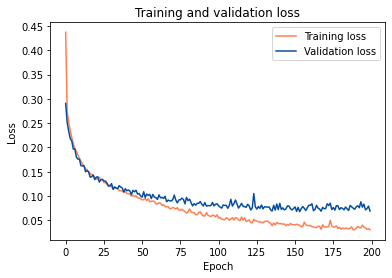

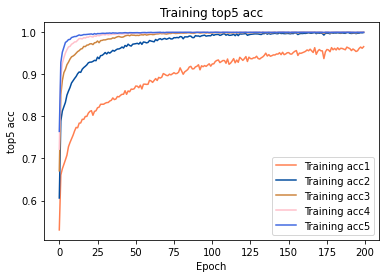

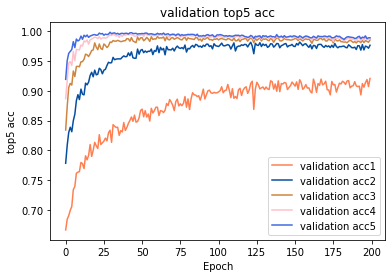

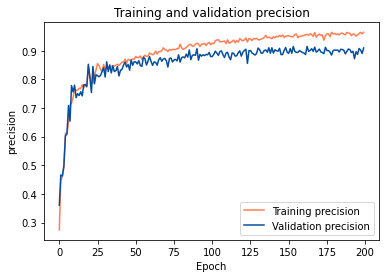

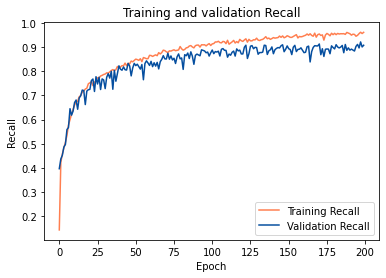

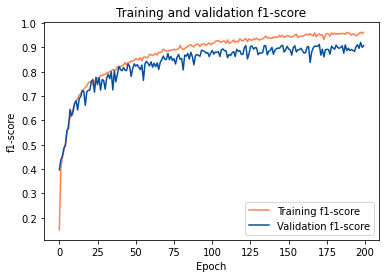

1636553952.920376


In [166]:
# training for 3 epochs
start = time.time()
n_epochs = 200
train(capsule_net, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

### fold3(train) 

-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.4399 	 valid Loss: 0.2995
train acc1: 0.5235 	 valid acc1: 0.6532
train acc2: 0.5976 	 valid acc2: 0.7446
train acc3: 0.6571 	 valid acc3: 0.8325
train acc4: 0.7085 	 valid acc4: 0.8843
train acc5: 0.7533 	 valid acc5: 0.9132
train precision: 0.2117 	 valid precision: 0.3931
train recall: 0.1256 	 valid recall: 0.3642
train f1-score: 0.1331 	 valid f1-score: 0.3318
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2820 	 valid Loss: 0.2594
train acc1: 0.6514 	 valid acc1: 0.6800
train acc2: 0.7738 	 valid acc2: 0.8093
train acc3: 0.8418 	 valid acc3: 0.8764
train acc4: 0.8875 	 valid acc4: 0.9236
train acc5: 0.9190 	 valid acc5: 0.9493
train precision: 0.4223 	 valid precision: 0.4315
train recall: 0.3976 	 valid recall: 0.4303
train f1-score: 0.3833 	 valid f1-score: 0.4201
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2531 	 valid Loss: 0.2400
train acc1: 0.6800 	 valid acc1: 0.6943
train acc2: 0.8071 	 valid acc2: 0.8221
train acc3: 0.8806 	 valid acc3: 0.8911
train acc4: 0.9219 	 valid acc4: 0.9336
train acc5: 0.9487 	 valid acc5: 0.9561
train precision: 0.5255 	 valid precision: 0.4900
train recall: 0.4623 	 valid recall: 0.4721
train f1-score: 0.4518 	 valid f1-score: 0.4667
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2353 	 valid Loss: 0.2258
train acc1: 0.6894 	 valid acc1: 0.7025
train acc2: 0.8207 	 valid acc2: 0.8371
train acc3: 0.8956 	 valid acc3: 0.8996
train acc4: 0.9382 	 valid acc4: 0.9436
train acc5: 0.9651 	 valid acc5: 0.9679
train precision: 0.5025 	 valid precision: 0.5011
train recall: 0.4823 	 valid recall: 0.4921
train f1-score: 0.4717 	 valid f1-score: 0.4860
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2223 	 valid Loss: 0.2079
train acc1: 0.6990 	 valid acc1: 0.7139
train acc2: 0.8355 	 valid acc2: 0.8496
train acc3: 0.9092 	 valid acc3: 0.9225
train acc4: 0.9456 	 valid acc4: 0.9611
train acc5: 0.9700 	 valid acc5: 0.9814
train precision: 0.6159 	 valid precision: 0.5922
train recall: 0.5020 	 valid recall: 0.5078
train f1-score: 0.4951 	 valid f1-score: 0.5068
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2123 	 valid Loss: 0.2031
train acc1: 0.7060 	 valid acc1: 0.7154
train acc2: 0.8465 	 valid acc2: 0.8543
train acc3: 0.9183 	 valid acc3: 0.9189
train acc4: 0.9561 	 valid acc4: 0.9568
train acc5: 0.9764 	 valid acc5: 0.9839
train precision: 0.6560 	 valid precision: 0.5989
train recall: 0.5176 	 valid recall: 0.5098
train f1-score: 0.5136 	 valid f1-score: 0.5164
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2020 	 valid Loss: 0.1932
train acc1: 0.7137 	 valid acc1: 0.7207
train acc2: 0.8630 	 valid acc2: 0.8814
train acc3: 0.9274 	 valid acc3: 0.9411
train acc4: 0.9629 	 valid acc4: 0.9668
train acc5: 0.9826 	 valid acc5: 0.9871
train precision: 0.6437 	 valid precision: 0.6499
train recall: 0.5322 	 valid recall: 0.5227
train f1-score: 0.5336 	 valid f1-score: 0.5372
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1936 	 valid Loss: 0.1829
train acc1: 0.7230 	 valid acc1: 0.7311
train acc2: 0.8720 	 valid acc2: 0.8900
train acc3: 0.9354 	 valid acc3: 0.9586
train acc4: 0.9658 	 valid acc4: 0.9789
train acc5: 0.9848 	 valid acc5: 0.9925
train precision: 0.6565 	 valid precision: 0.6221
train recall: 0.5506 	 valid recall: 0.5445
train f1-score: 0.5585 	 valid f1-score: 0.5554
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1871 	 valid Loss: 0.1782
train acc1: 0.7306 	 valid acc1: 0.7511
train acc2: 0.8790 	 valid acc2: 0.8839
train acc3: 0.9404 	 valid acc3: 0.9529
train acc4: 0.9690 	 valid acc4: 0.9714
train acc5: 0.9855 	 valid acc5: 0.9879
train precision: 0.6916 	 valid precision: 0.7758
train recall: 0.5703 	 valid recall: 0.6089
train f1-score: 0.5839 	 valid f1-score: 0.6144
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1793 	 valid Loss: 0.1750
train acc1: 0.7504 	 valid acc1: 0.7525
train acc2: 0.8873 	 valid acc2: 0.8989
train acc3: 0.9471 	 valid acc3: 0.9489
train acc4: 0.9731 	 valid acc4: 0.9757
train acc5: 0.9868 	 valid acc5: 0.9900
train precision: 0.7524 	 valid precision: 0.7399
train recall: 0.6097 	 valid recall: 0.5957
train f1-score: 0.6286 	 valid f1-score: 0.6310
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1751 	 valid Loss: 0.1681
train acc1: 0.7531 	 valid acc1: 0.7736
train acc2: 0.8927 	 valid acc2: 0.8964
train acc3: 0.9483 	 valid acc3: 0.9532
train acc4: 0.9737 	 valid acc4: 0.9768
train acc5: 0.9876 	 valid acc5: 0.9900
train precision: 0.7379 	 valid precision: 0.7865
train recall: 0.6241 	 valid recall: 0.6562
train f1-score: 0.6426 	 valid f1-score: 0.6603
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1685 	 valid Loss: 0.1688
train acc1: 0.7668 	 valid acc1: 0.7775
train acc2: 0.9011 	 valid acc2: 0.8875
train acc3: 0.9551 	 valid acc3: 0.9454
train acc4: 0.9774 	 valid acc4: 0.9700
train acc5: 0.9886 	 valid acc5: 0.9836
train precision: 0.7483 	 valid precision: 0.8268
train recall: 0.6499 	 valid recall: 0.6877
train f1-score: 0.6667 	 valid f1-score: 0.6703
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1644 	 valid Loss: 0.1708
train acc1: 0.7695 	 valid acc1: 0.7471
train acc2: 0.9018 	 valid acc2: 0.8936
train acc3: 0.9563 	 valid acc3: 0.9500
train acc4: 0.9799 	 valid acc4: 0.9786
train acc5: 0.9894 	 valid acc5: 0.9868
train precision: 0.7487 	 valid precision: 0.7116
train recall: 0.6656 	 valid recall: 0.6655
train f1-score: 0.6815 	 valid f1-score: 0.6416
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1596 	 valid Loss: 0.1604
train acc1: 0.7807 	 valid acc1: 0.7786
train acc2: 0.9051 	 valid acc2: 0.9100
train acc3: 0.9595 	 valid acc3: 0.9657
train acc4: 0.9806 	 valid acc4: 0.9886
train acc5: 0.9912 	 valid acc5: 0.9950
train precision: 0.8222 	 valid precision: 0.7642
train recall: 0.6860 	 valid recall: 0.6530
train f1-score: 0.7011 	 valid f1-score: 0.6737
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1593 	 valid Loss: 0.1533
train acc1: 0.7819 	 valid acc1: 0.7943
train acc2: 0.9106 	 valid acc2: 0.9068
train acc3: 0.9576 	 valid acc3: 0.9661
train acc4: 0.9818 	 valid acc4: 0.9850
train acc5: 0.9915 	 valid acc5: 0.9921
train precision: 0.7840 	 valid precision: 0.7852
train recall: 0.6901 	 valid recall: 0.6918
train f1-score: 0.7040 	 valid f1-score: 0.7069
-------第 16 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1523 	 valid Loss: 0.1460
train acc1: 0.7921 	 valid acc1: 0.7914
train acc2: 0.9137 	 valid acc2: 0.9204
train acc3: 0.9635 	 valid acc3: 0.9657
train acc4: 0.9851 	 valid acc4: 0.9882
train acc5: 0.9926 	 valid acc5: 0.9954
train precision: 0.8006 	 valid precision: 0.7839
train recall: 0.7095 	 valid recall: 0.6829
train f1-score: 0.7243 	 valid f1-score: 0.7032
-------第 17 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1497 	 valid Loss: 0.1529
train acc1: 0.7936 	 valid acc1: 0.7839
train acc2: 0.9196 	 valid acc2: 0.9193
train acc3: 0.9650 	 valid acc3: 0.9654
train acc4: 0.9858 	 valid acc4: 0.9861
train acc5: 0.9927 	 valid acc5: 0.9943
train precision: 0.8089 	 valid precision: 0.7792
train recall: 0.7155 	 valid recall: 0.6844
train f1-score: 0.7284 	 valid f1-score: 0.6876
-------第 18 轮训练开始-------
train Loss: 0.1499 	 valid Loss: 0.1469
train acc1: 0.7901 	 valid acc1: 0.8011
train acc2: 0.9169 	 valid acc2: 0.9196
train acc3: 0.9639 	 valid acc3: 0.9561
train acc4: 0.9845 	 valid acc4: 0.9811
train acc5: 0.9936 	 valid acc5: 0.9914
train precision: 0.8104 	 valid precision: 0.7870
train recall: 0.7056 	 valid recall: 0.7444
train f1-score: 0.7196 	 valid f1-score: 0.7420
-------第 19 轮训练开始-------
train Loss: 0.1458 	 valid Loss: 0.1390
train acc1: 0.8004 	 valid acc1: 0.8107
train acc2: 0.9168 	 valid acc2: 0.9304
train acc3: 0.9637 	 valid acc3: 0.9693
train acc4: 0.9855 	 valid

train Loss: 0.1143 	 valid Loss: 0.1217
train acc1: 0.8405 	 valid acc1: 0.8246
train acc2: 0.9558 	 valid acc2: 0.9489
train acc3: 0.9844 	 valid acc3: 0.9793
train acc4: 0.9933 	 valid acc4: 0.9929
train acc5: 0.9985 	 valid acc5: 0.9954
train precision: 0.8515 	 valid precision: 0.8137
train recall: 0.8000 	 valid recall: 0.7833
train f1-score: 0.8107 	 valid f1-score: 0.7761
-------第 39 轮训练开始-------
train Loss: 0.1141 	 valid Loss: 0.1177
train acc1: 0.8389 	 valid acc1: 0.8389
train acc2: 0.9573 	 valid acc2: 0.9454
train acc3: 0.9868 	 valid acc3: 0.9782
train acc4: 0.9957 	 valid acc4: 0.9886
train acc5: 0.9983 	 valid acc5: 0.9943
train precision: 0.8466 	 valid precision: 0.8536
train recall: 0.8031 	 valid recall: 0.7852
train f1-score: 0.8090 	 valid f1-score: 0.7892
-------第 40 轮训练开始-------
train Loss: 0.1126 	 valid Loss: 0.1186
train acc1: 0.8420 	 valid acc1: 0.8289
train acc2: 0.9569 	 valid acc2: 0.9543
train acc3: 0.9874 	 valid acc3: 0.9857
train acc4: 0.9955 	 valid

train Loss: 0.0954 	 valid Loss: 0.1068
train acc1: 0.8651 	 valid acc1: 0.8604
train acc2: 0.9725 	 valid acc2: 0.9621
train acc3: 0.9924 	 valid acc3: 0.9843
train acc4: 0.9981 	 valid acc4: 0.9932
train acc5: 0.9992 	 valid acc5: 0.9957
train precision: 0.8784 	 valid precision: 0.8417
train recall: 0.8381 	 valid recall: 0.8399
train f1-score: 0.8465 	 valid f1-score: 0.8340
-------第 60 轮训练开始-------
train Loss: 0.0935 	 valid Loss: 0.1105
train acc1: 0.8714 	 valid acc1: 0.8482
train acc2: 0.9749 	 valid acc2: 0.9557
train acc3: 0.9935 	 valid acc3: 0.9811
train acc4: 0.9981 	 valid acc4: 0.9911
train acc5: 0.9988 	 valid acc5: 0.9939
train precision: 0.8773 	 valid precision: 0.8582
train recall: 0.8466 	 valid recall: 0.7861
train f1-score: 0.8519 	 valid f1-score: 0.8047
-------第 61 轮训练开始-------
train Loss: 0.0909 	 valid Loss: 0.1015
train acc1: 0.8736 	 valid acc1: 0.8668
train acc2: 0.9765 	 valid acc2: 0.9686
train acc3: 0.9942 	 valid acc3: 0.9882
train acc4: 0.9985 	 valid

train Loss: 0.0748 	 valid Loss: 0.0985
train acc1: 0.8982 	 valid acc1: 0.8729
train acc2: 0.9858 	 valid acc2: 0.9629
train acc3: 0.9973 	 valid acc3: 0.9825
train acc4: 0.9996 	 valid acc4: 0.9907
train acc5: 0.9998 	 valid acc5: 0.9939
train precision: 0.9103 	 valid precision: 0.8719
train recall: 0.8789 	 valid recall: 0.8343
train f1-score: 0.8876 	 valid f1-score: 0.8457
-------第 81 轮训练开始-------
train Loss: 0.0743 	 valid Loss: 0.0946
train acc1: 0.8995 	 valid acc1: 0.8768
train acc2: 0.9870 	 valid acc2: 0.9611
train acc3: 0.9971 	 valid acc3: 0.9825
train acc4: 0.9993 	 valid acc4: 0.9911
train acc5: 0.9996 	 valid acc5: 0.9936
train precision: 0.9087 	 valid precision: 0.8734
train recall: 0.8791 	 valid recall: 0.8520
train f1-score: 0.8873 	 valid f1-score: 0.8526
-------第 82 轮训练开始-------
train Loss: 0.0773 	 valid Loss: 0.0970
train acc1: 0.8949 	 valid acc1: 0.8689
train acc2: 0.9846 	 valid acc2: 0.9661
train acc3: 0.9976 	 valid acc3: 0.9825
train acc4: 0.9993 	 valid

train Loss: 0.0654 	 valid Loss: 0.0948
train acc1: 0.9111 	 valid acc1: 0.8779
train acc2: 0.9912 	 valid acc2: 0.9664
train acc3: 0.9974 	 valid acc3: 0.9836
train acc4: 0.9996 	 valid acc4: 0.9875
train acc5: 0.9999 	 valid acc5: 0.9925
train precision: 0.9197 	 valid precision: 0.8792
train recall: 0.8925 	 valid recall: 0.8407
train f1-score: 0.9012 	 valid f1-score: 0.8538
-------第 102 轮训练开始-------
train Loss: 0.0651 	 valid Loss: 0.0875
train acc1: 0.9112 	 valid acc1: 0.8868
train acc2: 0.9887 	 valid acc2: 0.9668
train acc3: 0.9980 	 valid acc3: 0.9825
train acc4: 0.9998 	 valid acc4: 0.9904
train acc5: 0.9999 	 valid acc5: 0.9943
train precision: 0.9175 	 valid precision: 0.8731
train recall: 0.8948 	 valid recall: 0.8557
train f1-score: 0.9017 	 valid f1-score: 0.8548
-------第 103 轮训练开始-------
train Loss: 0.0643 	 valid Loss: 0.1127
train acc1: 0.9146 	 valid acc1: 0.8504
train acc2: 0.9915 	 valid acc2: 0.9525
train acc3: 0.9986 	 valid acc3: 0.9779
train acc4: 0.9995 	 val

train Loss: 0.0574 	 valid Loss: 0.0900
train acc1: 0.9224 	 valid acc1: 0.8868
train acc2: 0.9932 	 valid acc2: 0.9686
train acc3: 0.9989 	 valid acc3: 0.9839
train acc4: 0.9999 	 valid acc4: 0.9875
train acc5: 1.0000 	 valid acc5: 0.9929
train precision: 0.9279 	 valid precision: 0.8915
train recall: 0.9079 	 valid recall: 0.8474
train f1-score: 0.9140 	 valid f1-score: 0.8619
-------第 123 轮训练开始-------
train Loss: 0.0566 	 valid Loss: 0.0924
train acc1: 0.9235 	 valid acc1: 0.8861
train acc2: 0.9933 	 valid acc2: 0.9671
train acc3: 0.9989 	 valid acc3: 0.9807
train acc4: 0.9995 	 valid acc4: 0.9918
train acc5: 0.9998 	 valid acc5: 0.9946
train precision: 0.9297 	 valid precision: 0.8849
train recall: 0.9090 	 valid recall: 0.8530
train f1-score: 0.9159 	 valid f1-score: 0.8642
-------第 124 轮训练开始-------
train Loss: 0.0565 	 valid Loss: 0.0821
train acc1: 0.9250 	 valid acc1: 0.8986
train acc2: 0.9930 	 valid acc2: 0.9718
train acc3: 0.9988 	 valid acc3: 0.9843
train acc4: 0.9998 	 val

train Loss: 0.0524 	 valid Loss: 0.0926
train acc1: 0.9283 	 valid acc1: 0.8825
train acc2: 0.9954 	 valid acc2: 0.9668
train acc3: 0.9994 	 valid acc3: 0.9814
train acc4: 0.9998 	 valid acc4: 0.9882
train acc5: 1.0000 	 valid acc5: 0.9914
train precision: 0.9312 	 valid precision: 0.8780
train recall: 0.9135 	 valid recall: 0.8638
train f1-score: 0.9197 	 valid f1-score: 0.8685
-------第 144 轮训练开始-------
train Loss: 0.0521 	 valid Loss: 0.0917
train acc1: 0.9306 	 valid acc1: 0.8936
train acc2: 0.9945 	 valid acc2: 0.9661
train acc3: 0.9992 	 valid acc3: 0.9782
train acc4: 0.9998 	 valid acc4: 0.9854
train acc5: 0.9998 	 valid acc5: 0.9904
train precision: 0.9355 	 valid precision: 0.8789
train recall: 0.9180 	 valid recall: 0.8841
train f1-score: 0.9241 	 valid f1-score: 0.8769
-------第 145 轮训练开始-------
train Loss: 0.0557 	 valid Loss: 0.0858
train acc1: 0.9269 	 valid acc1: 0.8968
train acc2: 0.9938 	 valid acc2: 0.9714
train acc3: 0.9990 	 valid acc3: 0.9864
train acc4: 0.9995 	 val

train Loss: 0.0450 	 valid Loss: 0.0925
train acc1: 0.9446 	 valid acc1: 0.8850
train acc2: 0.9969 	 valid acc2: 0.9657
train acc3: 0.9992 	 valid acc3: 0.9793
train acc4: 0.9995 	 valid acc4: 0.9857
train acc5: 0.9996 	 valid acc5: 0.9882
train precision: 0.9448 	 valid precision: 0.8704
train recall: 0.9349 	 valid recall: 0.8603
train f1-score: 0.9384 	 valid f1-score: 0.8614
-------第 165 轮训练开始-------
train Loss: 0.0459 	 valid Loss: 0.0845
train acc1: 0.9413 	 valid acc1: 0.9029
train acc2: 0.9951 	 valid acc2: 0.9729
train acc3: 0.9994 	 valid acc3: 0.9821
train acc4: 0.9998 	 valid acc4: 0.9850
train acc5: 0.9999 	 valid acc5: 0.9896
train precision: 0.9431 	 valid precision: 0.8975
train recall: 0.9294 	 valid recall: 0.8827
train f1-score: 0.9346 	 valid f1-score: 0.8871
-------第 166 轮训练开始-------
train Loss: 0.0485 	 valid Loss: 0.0997
train acc1: 0.9371 	 valid acc1: 0.8750
train acc2: 0.9942 	 valid acc2: 0.9646
train acc3: 0.9990 	 valid acc3: 0.9829
train acc4: 0.9998 	 val

train Loss: 0.0414 	 valid Loss: 0.0795
train acc1: 0.9470 	 valid acc1: 0.9039
train acc2: 0.9963 	 valid acc2: 0.9704
train acc3: 0.9993 	 valid acc3: 0.9829
train acc4: 0.9998 	 valid acc4: 0.9868
train acc5: 0.9999 	 valid acc5: 0.9900
train precision: 0.9488 	 valid precision: 0.8897
train recall: 0.9356 	 valid recall: 0.8986
train f1-score: 0.9408 	 valid f1-score: 0.8933
-------第 186 轮训练开始-------
train Loss: 0.0365 	 valid Loss: 0.0873
train acc1: 0.9548 	 valid acc1: 0.8979
train acc2: 0.9980 	 valid acc2: 0.9664
train acc3: 1.0000 	 valid acc3: 0.9786
train acc4: 1.0000 	 valid acc4: 0.9846
train acc5: 1.0000 	 valid acc5: 0.9879
train precision: 0.9556 	 valid precision: 0.8854
train recall: 0.9469 	 valid recall: 0.8781
train f1-score: 0.9503 	 valid f1-score: 0.8796
-------第 187 轮训练开始-------
train Loss: 0.0432 	 valid Loss: 0.0881
train acc1: 0.9446 	 valid acc1: 0.8971
train acc2: 0.9967 	 valid acc2: 0.9596
train acc3: 0.9994 	 valid acc3: 0.9743
train acc4: 1.0000 	 val

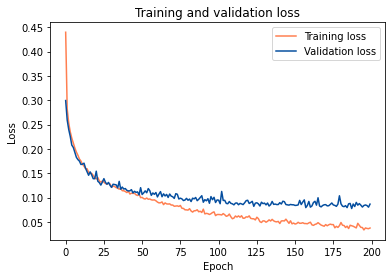

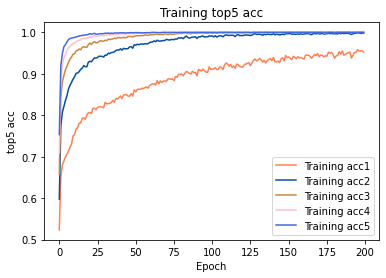

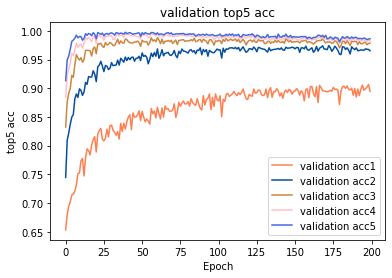

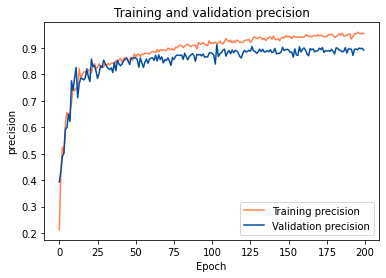

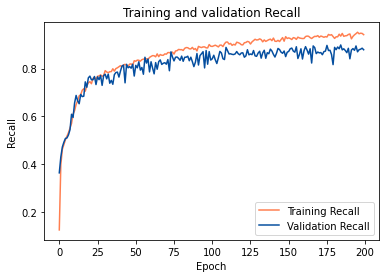

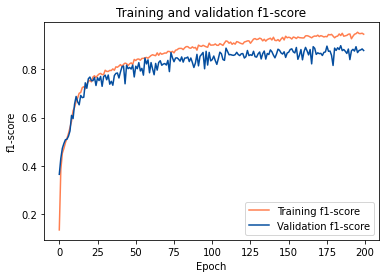

1636557348.291439


In [197]:
# training for 3 epochs
start = time.time()
n_epochs = 200
train(capsule_net, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

### fold4(train) 

-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.4305 	 valid Loss: 0.2978
train acc1: 0.5214 	 valid acc1: 0.6582
train acc2: 0.6096 	 valid acc2: 0.7554
train acc3: 0.6751 	 valid acc3: 0.8254
train acc4: 0.7339 	 valid acc4: 0.8636
train acc5: 0.7785 	 valid acc5: 0.8932
train precision: 0.3240 	 valid precision: 0.4090
train recall: 0.1836 	 valid recall: 0.4101
train f1-score: 0.1920 	 valid f1-score: 0.3841
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2679 	 valid Loss: 0.2405
train acc1: 0.6661 	 valid acc1: 0.6957
train acc2: 0.7848 	 valid acc2: 0.8214
train acc3: 0.8587 	 valid acc3: 0.8879
train acc4: 0.9035 	 valid acc4: 0.9207
train acc5: 0.9323 	 valid acc5: 0.9436
train precision: 0.4503 	 valid precision: 0.4624
train recall: 0.4343 	 valid recall: 0.4850
train f1-score: 0.4234 	 valid f1-score: 0.4653
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2391 	 valid Loss: 0.2269
train acc1: 0.6868 	 valid acc1: 0.7093
train acc2: 0.8188 	 valid acc2: 0.8368
train acc3: 0.8930 	 valid acc3: 0.9132
train acc4: 0.9305 	 valid acc4: 0.9482
train acc5: 0.9545 	 valid acc5: 0.9750
train precision: 0.5035 	 valid precision: 0.5188
train recall: 0.4843 	 valid recall: 0.5160
train f1-score: 0.4733 	 valid f1-score: 0.5027
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2230 	 valid Loss: 0.2111
train acc1: 0.7058 	 valid acc1: 0.7154
train acc2: 0.8324 	 valid acc2: 0.8543
train acc3: 0.9055 	 valid acc3: 0.9271
train acc4: 0.9493 	 valid acc4: 0.9621
train acc5: 0.9693 	 valid acc5: 0.9793
train precision: 0.5131 	 valid precision: 0.5381
train recall: 0.5254 	 valid recall: 0.5124
train f1-score: 0.5153 	 valid f1-score: 0.5130
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.2087 	 valid Loss: 0.2045
train acc1: 0.7154 	 valid acc1: 0.7171
train acc2: 0.8589 	 valid acc2: 0.8614
train acc3: 0.9214 	 valid acc3: 0.9268
train acc4: 0.9602 	 valid acc4: 0.9596
train acc5: 0.9783 	 valid acc5: 0.9771
train precision: 0.6442 	 valid precision: 0.5994
train recall: 0.5403 	 valid recall: 0.5132
train f1-score: 0.5297 	 valid f1-score: 0.5159
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1989 	 valid Loss: 0.1832
train acc1: 0.7164 	 valid acc1: 0.7425
train acc2: 0.8698 	 valid acc2: 0.8832
train acc3: 0.9325 	 valid acc3: 0.9379
train acc4: 0.9673 	 valid acc4: 0.9711
train acc5: 0.9838 	 valid acc5: 0.9843
train precision: 0.6744 	 valid precision: 0.6199
train recall: 0.5415 	 valid recall: 0.5749
train f1-score: 0.5355 	 valid f1-score: 0.5707
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1866 	 valid Loss: 0.1748
train acc1: 0.7307 	 valid acc1: 0.7486
train acc2: 0.8821 	 valid acc2: 0.8857
train acc3: 0.9415 	 valid acc3: 0.9421
train acc4: 0.9713 	 valid acc4: 0.9754
train acc5: 0.9865 	 valid acc5: 0.9871
train precision: 0.6838 	 valid precision: 0.6605
train recall: 0.5693 	 valid recall: 0.5822
train f1-score: 0.5705 	 valid f1-score: 0.5823
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1811 	 valid Loss: 0.1765
train acc1: 0.7458 	 valid acc1: 0.7593
train acc2: 0.8895 	 valid acc2: 0.8843
train acc3: 0.9396 	 valid acc3: 0.9425
train acc4: 0.9708 	 valid acc4: 0.9714
train acc5: 0.9862 	 valid acc5: 0.9871
train precision: 0.7357 	 valid precision: 0.7465
train recall: 0.6047 	 valid recall: 0.6209
train f1-score: 0.6067 	 valid f1-score: 0.6271
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1753 	 valid Loss: 0.1613
train acc1: 0.7581 	 valid acc1: 0.7775
train acc2: 0.8936 	 valid acc2: 0.9021
train acc3: 0.9461 	 valid acc3: 0.9504
train acc4: 0.9745 	 valid acc4: 0.9796
train acc5: 0.9883 	 valid acc5: 0.9918
train precision: 0.7291 	 valid precision: 0.7277
train recall: 0.6346 	 valid recall: 0.6543
train f1-score: 0.6402 	 valid f1-score: 0.6481
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1672 	 valid Loss: 0.1609
train acc1: 0.7665 	 valid acc1: 0.7693
train acc2: 0.9017 	 valid acc2: 0.8993
train acc3: 0.9499 	 valid acc3: 0.9593
train acc4: 0.9781 	 valid acc4: 0.9825
train acc5: 0.9898 	 valid acc5: 0.9904
train precision: 0.7475 	 valid precision: 0.7112
train recall: 0.6539 	 valid recall: 0.6295
train f1-score: 0.6625 	 valid f1-score: 0.6349
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1632 	 valid Loss: 0.1638
train acc1: 0.7693 	 valid acc1: 0.7621
train acc2: 0.9033 	 valid acc2: 0.9146
train acc3: 0.9515 	 valid acc3: 0.9596
train acc4: 0.9795 	 valid acc4: 0.9857
train acc5: 0.9899 	 valid acc5: 0.9964
train precision: 0.7431 	 valid precision: 0.7706
train recall: 0.6630 	 valid recall: 0.6122
train f1-score: 0.6743 	 valid f1-score: 0.6308
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1599 	 valid Loss: 0.1500
train acc1: 0.7743 	 valid acc1: 0.7954
train acc2: 0.9063 	 valid acc2: 0.9125
train acc3: 0.9550 	 valid acc3: 0.9557
train acc4: 0.9794 	 valid acc4: 0.9779
train acc5: 0.9893 	 valid acc5: 0.9882
train precision: 0.7828 	 valid precision: 0.7377
train recall: 0.6777 	 valid recall: 0.7261
train f1-score: 0.6908 	 valid f1-score: 0.7197
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.1520 	 valid Loss: 0.1462
train acc1: 0.7844 	 valid acc1: 0.7871
train acc2: 0.9129 	 valid acc2: 0.9225
train acc3: 0.9581 	 valid acc3: 0.9650
train acc4: 0.9833 	 valid acc4: 0.9807
train acc5: 0.9930 	 valid acc5: 0.9896
train precision: 0.7991 	 valid precision: 0.7230
train recall: 0.6993 	 valid recall: 0.6762
train f1-score: 0.7109 	 valid f1-score: 0.6825
-------第 14 轮训练开始-------
train Loss: 0.1466 	 valid Loss: 0.1418
train acc1: 0.7950 	 valid acc1: 0.8061
train acc2: 0.9230 	 valid acc2: 0.9218
train acc3: 0.9651 	 valid acc3: 0.9618
train acc4: 0.9849 	 valid acc4: 0.9832
train acc5: 0.9919 	 valid acc5: 0.9889
train precision: 0.8142 	 valid precision: 0.8317
train recall: 0.7179 	 valid recall: 0.7277
train f1-score: 0.7299 	 valid f1-score: 0.7263
-------第 15 轮训练开始-------
train Loss: 0.1478 	 valid Loss: 0.1428
train acc1: 0.7976 	 valid acc1: 0.7964
train acc2: 0.9207 	 valid acc2: 0.9182
train acc3: 0.9644 	 valid acc3: 0.9661
train acc4: 0.9831 	 valid

train Loss: 0.1095 	 valid Loss: 0.1138
train acc1: 0.8461 	 valid acc1: 0.8454
train acc2: 0.9582 	 valid acc2: 0.9496
train acc3: 0.9871 	 valid acc3: 0.9832
train acc4: 0.9962 	 valid acc4: 0.9932
train acc5: 0.9988 	 valid acc5: 0.9957
train precision: 0.8490 	 valid precision: 0.8274
train recall: 0.8088 	 valid recall: 0.8030
train f1-score: 0.8156 	 valid f1-score: 0.7949
-------第 35 轮训练开始-------
train Loss: 0.1082 	 valid Loss: 0.1116
train acc1: 0.8480 	 valid acc1: 0.8446
train acc2: 0.9565 	 valid acc2: 0.9518
train acc3: 0.9858 	 valid acc3: 0.9825
train acc4: 0.9957 	 valid acc4: 0.9925
train acc5: 0.9981 	 valid acc5: 0.9950
train precision: 0.8476 	 valid precision: 0.8542
train recall: 0.8119 	 valid recall: 0.7813
train f1-score: 0.8170 	 valid f1-score: 0.7962
-------第 36 轮训练开始-------
train Loss: 0.1078 	 valid Loss: 0.1196
train acc1: 0.8475 	 valid acc1: 0.8425
train acc2: 0.9624 	 valid acc2: 0.9496
train acc3: 0.9895 	 valid acc3: 0.9811
train acc4: 0.9973 	 valid

train Loss: 0.0908 	 valid Loss: 0.0993
train acc1: 0.8707 	 valid acc1: 0.8704
train acc2: 0.9737 	 valid acc2: 0.9618
train acc3: 0.9931 	 valid acc3: 0.9857
train acc4: 0.9986 	 valid acc4: 0.9911
train acc5: 0.9990 	 valid acc5: 0.9943
train precision: 0.8739 	 valid precision: 0.8613
train recall: 0.8440 	 valid recall: 0.8437
train f1-score: 0.8512 	 valid f1-score: 0.8359
-------第 56 轮训练开始-------
train Loss: 0.0856 	 valid Loss: 0.0987
train acc1: 0.8808 	 valid acc1: 0.8657
train acc2: 0.9773 	 valid acc2: 0.9646
train acc3: 0.9938 	 valid acc3: 0.9829
train acc4: 0.9986 	 valid acc4: 0.9911
train acc5: 0.9992 	 valid acc5: 0.9946
train precision: 0.8865 	 valid precision: 0.8453
train recall: 0.8579 	 valid recall: 0.8395
train f1-score: 0.8645 	 valid f1-score: 0.8342
-------第 57 轮训练开始-------
train Loss: 0.0872 	 valid Loss: 0.1062
train acc1: 0.8761 	 valid acc1: 0.8536
train acc2: 0.9776 	 valid acc2: 0.9596
train acc3: 0.9938 	 valid acc3: 0.9829
train acc4: 0.9986 	 valid

train Loss: 0.0664 	 valid Loss: 0.1019
train acc1: 0.9119 	 valid acc1: 0.8657
train acc2: 0.9886 	 valid acc2: 0.9625
train acc3: 0.9985 	 valid acc3: 0.9861
train acc4: 0.9998 	 valid acc4: 0.9911
train acc5: 0.9999 	 valid acc5: 0.9946
train precision: 0.9165 	 valid precision: 0.8426
train recall: 0.8925 	 valid recall: 0.8698
train f1-score: 0.9006 	 valid f1-score: 0.8438
-------第 77 轮训练开始-------
train Loss: 0.0751 	 valid Loss: 0.0954
train acc1: 0.8961 	 valid acc1: 0.8732
train acc2: 0.9850 	 valid acc2: 0.9682
train acc3: 0.9977 	 valid acc3: 0.9839
train acc4: 0.9990 	 valid acc4: 0.9900
train acc5: 0.9996 	 valid acc5: 0.9943
train precision: 0.8974 	 valid precision: 0.8523
train recall: 0.8766 	 valid recall: 0.8518
train f1-score: 0.8824 	 valid f1-score: 0.8415
-------第 78 轮训练开始-------
train Loss: 0.0681 	 valid Loss: 0.0906
train acc1: 0.9090 	 valid acc1: 0.8818
train acc2: 0.9895 	 valid acc2: 0.9739
train acc3: 0.9980 	 valid acc3: 0.9861
train acc4: 0.9994 	 valid

train Loss: 0.0609 	 valid Loss: 0.0782
train acc1: 0.9193 	 valid acc1: 0.9036
train acc2: 0.9907 	 valid acc2: 0.9750
train acc3: 0.9980 	 valid acc3: 0.9821
train acc4: 0.9990 	 valid acc4: 0.9882
train acc5: 0.9995 	 valid acc5: 0.9929
train precision: 0.9203 	 valid precision: 0.8900
train recall: 0.9054 	 valid recall: 0.8890
train f1-score: 0.9101 	 valid f1-score: 0.8846
-------第 98 轮训练开始-------
train Loss: 0.0583 	 valid Loss: 0.0873
train acc1: 0.9217 	 valid acc1: 0.8929
train acc2: 0.9932 	 valid acc2: 0.9664
train acc3: 0.9987 	 valid acc3: 0.9843
train acc4: 0.9996 	 valid acc4: 0.9879
train acc5: 0.9998 	 valid acc5: 0.9918
train precision: 0.9255 	 valid precision: 0.8860
train recall: 0.9085 	 valid recall: 0.8644
train f1-score: 0.9142 	 valid f1-score: 0.8704
-------第 99 轮训练开始-------
train Loss: 0.0605 	 valid Loss: 0.0863
train acc1: 0.9174 	 valid acc1: 0.8893
train acc2: 0.9918 	 valid acc2: 0.9668
train acc3: 0.9987 	 valid acc3: 0.9825
train acc4: 0.9996 	 valid

train Loss: 0.0475 	 valid Loss: 0.0728
train acc1: 0.9404 	 valid acc1: 0.9104
train acc2: 0.9956 	 valid acc2: 0.9768
train acc3: 0.9998 	 valid acc3: 0.9864
train acc4: 1.0000 	 valid acc4: 0.9896
train acc5: 1.0000 	 valid acc5: 0.9914
train precision: 0.9425 	 valid precision: 0.8975
train recall: 0.9276 	 valid recall: 0.8964
train f1-score: 0.9332 	 valid f1-score: 0.8925
-------第 119 轮训练开始-------
train Loss: 0.0486 	 valid Loss: 0.0834
train acc1: 0.9358 	 valid acc1: 0.8993
train acc2: 0.9943 	 valid acc2: 0.9721
train acc3: 0.9988 	 valid acc3: 0.9807
train acc4: 0.9996 	 valid acc4: 0.9850
train acc5: 0.9998 	 valid acc5: 0.9886
train precision: 0.9387 	 valid precision: 0.8911
train recall: 0.9247 	 valid recall: 0.8714
train f1-score: 0.9297 	 valid f1-score: 0.8772
-------第 120 轮训练开始-------
train Loss: 0.0505 	 valid Loss: 0.0776
train acc1: 0.9354 	 valid acc1: 0.9025
train acc2: 0.9956 	 valid acc2: 0.9736
train acc3: 0.9993 	 valid acc3: 0.9836
train acc4: 0.9996 	 val

train Loss: 0.0473 	 valid Loss: 0.0819
train acc1: 0.9392 	 valid acc1: 0.8921
train acc2: 0.9957 	 valid acc2: 0.9739
train acc3: 0.9994 	 valid acc3: 0.9839
train acc4: 0.9999 	 valid acc4: 0.9868
train acc5: 0.9999 	 valid acc5: 0.9893
train precision: 0.9393 	 valid precision: 0.9063
train recall: 0.9272 	 valid recall: 0.8417
train f1-score: 0.9318 	 valid f1-score: 0.8658
-------第 140 轮训练开始-------
train Loss: 0.0460 	 valid Loss: 0.0833
train acc1: 0.9444 	 valid acc1: 0.8961
train acc2: 0.9956 	 valid acc2: 0.9707
train acc3: 0.9992 	 valid acc3: 0.9804
train acc4: 0.9999 	 valid acc4: 0.9879
train acc5: 0.9999 	 valid acc5: 0.9918
train precision: 0.9445 	 valid precision: 0.8770
train recall: 0.9345 	 valid recall: 0.8907
train f1-score: 0.9382 	 valid f1-score: 0.8805
-------第 141 轮训练开始-------
train Loss: 0.0449 	 valid Loss: 0.0856
train acc1: 0.9429 	 valid acc1: 0.8936
train acc2: 0.9956 	 valid acc2: 0.9668
train acc3: 0.9993 	 valid acc3: 0.9779
train acc4: 0.9996 	 val

train Loss: 0.0373 	 valid Loss: 0.0758
train acc1: 0.9533 	 valid acc1: 0.9079
train acc2: 0.9974 	 valid acc2: 0.9707
train acc3: 0.9998 	 valid acc3: 0.9818
train acc4: 1.0000 	 valid acc4: 0.9850
train acc5: 1.0000 	 valid acc5: 0.9886
train precision: 0.9510 	 valid precision: 0.8913
train recall: 0.9450 	 valid recall: 0.9059
train f1-score: 0.9471 	 valid f1-score: 0.8961
-------第 161 轮训练开始-------
train Loss: 0.0387 	 valid Loss: 0.0760
train acc1: 0.9537 	 valid acc1: 0.9050
train acc2: 0.9981 	 valid acc2: 0.9704
train acc3: 0.9995 	 valid acc3: 0.9800
train acc4: 1.0000 	 valid acc4: 0.9846
train acc5: 1.0000 	 valid acc5: 0.9879
train precision: 0.9525 	 valid precision: 0.8909
train recall: 0.9435 	 valid recall: 0.8982
train f1-score: 0.9472 	 valid f1-score: 0.8929
-------第 162 轮训练开始-------
train Loss: 0.0424 	 valid Loss: 0.0893
train acc1: 0.9479 	 valid acc1: 0.8932
train acc2: 0.9970 	 valid acc2: 0.9643
train acc3: 0.9987 	 valid acc3: 0.9775
train acc4: 0.9994 	 val

train Loss: 0.0336 	 valid Loss: 0.0744
train acc1: 0.9587 	 valid acc1: 0.9093
train acc2: 0.9975 	 valid acc2: 0.9718
train acc3: 0.9993 	 valid acc3: 0.9825
train acc4: 0.9999 	 valid acc4: 0.9868
train acc5: 0.9999 	 valid acc5: 0.9893
train precision: 0.9566 	 valid precision: 0.8983
train recall: 0.9521 	 valid recall: 0.9023
train f1-score: 0.9536 	 valid f1-score: 0.8978
-------第 182 轮训练开始-------
train Loss: 0.0340 	 valid Loss: 0.0813
train acc1: 0.9615 	 valid acc1: 0.9068
train acc2: 0.9992 	 valid acc2: 0.9671
train acc3: 0.9999 	 valid acc3: 0.9775
train acc4: 1.0000 	 valid acc4: 0.9832
train acc5: 1.0000 	 valid acc5: 0.9861
train precision: 0.9585 	 valid precision: 0.8862
train recall: 0.9557 	 valid recall: 0.9047
train f1-score: 0.9566 	 valid f1-score: 0.8934
-------第 183 轮训练开始-------
train Loss: 0.0314 	 valid Loss: 0.0776
train acc1: 0.9623 	 valid acc1: 0.9064
train acc2: 0.9990 	 valid acc2: 0.9736
train acc3: 0.9996 	 valid acc3: 0.9825
train acc4: 0.9999 	 val

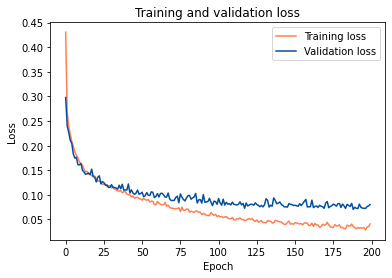

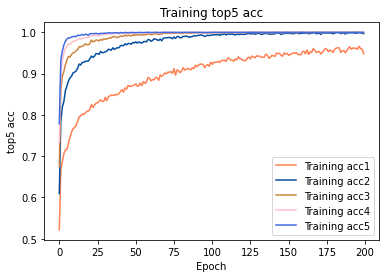

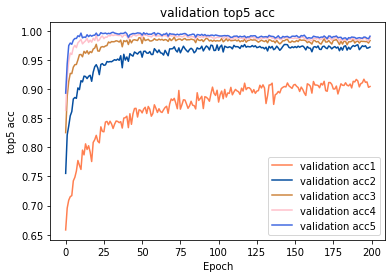

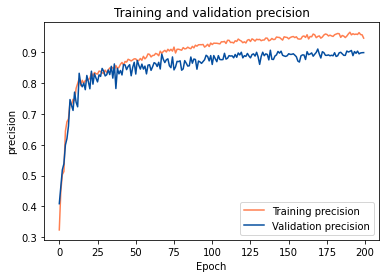

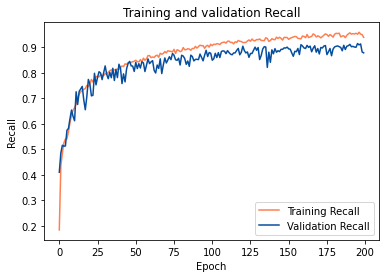

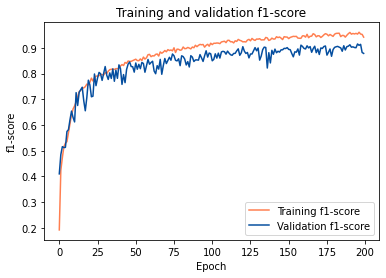

1636560201.707295


In [228]:
# training for 3 epochs
start = time.time()
n_epochs = 200
train(capsule_net, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

## 3.3 测试模型

In [1]:
def test(capsule_net, test_loader):
    '''打印给定胶囊网络的测试统计数据。
       参数capsule_net：训练好的胶囊网络
       参数 test_loader：测试数据加载器
       return：返回最后一批测试图像数据和对应的重建
       '''
    #------计算各类别的分类准确率--------------
#     # 最开始初始化为0
    classes = ['0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9', '10', '11', '12', '13','14']
    class_correct = list(0. for i in range(16))
    
#     # 初始化为0
    class_total = list(0. for i in range(16))
    
    test_loss = 0 # loss tracking
    correct, correct1, correct2, correct3, correct4, correct5 = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
    test_acc1, test_acc2, test_acc3, test_acc4, test_acc5 = 0.0, 0.0, 0.0, 0.0, 0.0
    precision, recall, f1 = 0.0, 0.0, 0.0
    test_preds = []
    test_trues = []
    
    preds = []
    trues = []
    
    count = 0
    # 模型的结构
    capsule_net.eval() # eval mode

    for batch_i, (data, target) in enumerate(test_loader):
        # target: torch.Size([20, 10])
        data = data.unsqueeze(0)
        data = data.permute(1,2,0)
        target = target.squeeze()
        target = One_hot(target)
        # 转tensor，batch_labels: torch.Size([32, 16])
        target = torch.from_numpy(target) 
        
        batch_size = data.size(0)

#         if TRAIN_ON_GPU:
#             images, target = images.cuda(), target.cuda()

        # forward pass: compute predicted outputs by passing inputs to the model
        logits, reconstruction = capsule_net(data)
        
        
        # 计算AUC，绘制AUC曲线
        preds.append(logits.cpu().detach().numpy())
        trues.append(target.cpu().detach().numpy())
        
        # 计算topk准确率，k=1-5
        _, pred = logits.topk(5, 1, largest=True, sorted=True)
        _, labels = torch.max(target.data.cpu(), 1)
        _, labels1 = torch.max(target.data.cpu(), 1)
        labels = labels.view(labels.size(0), -1).expand_as(pred)
        
#         print("topk k pred:", pred)
#         print("topk k labels:", labels)
        
        count += labels.shape[0]
        correct = pred.eq(labels).float()
        correct5 += correct[:, :5].sum()
        correct4 += correct[:, :4].sum()
        correct3 += correct[:, :3].sum()
        correct2 += correct[:, :2].sum()
        correct1 += correct[:, :1].sum()
                
        #-----------计算precision、f1-score、recall--------------
        _, output = torch.max(logits.data.cpu(), 1)
#             print("train_outputs:", train_outputs)
        _, label = torch.max(target.data.cpu(), 1)
#             print("batch_labels:", batch_labels)
        test_trues.append(label.cpu().detach().numpy())
        test_preds.append(output.cpu().detach().numpy())
            
            # calculate loss
        loss = criterion(data, target , logits, reconstruction)

        # update average test loss 
        test_loss += loss.item()
        
        correct = np.squeeze(output.eq(label.data.view_as(output)))
#         print("correct:", correct)
#         print(label.data[i])
        for i in range(batch_size):
            test_label = label.data[i]
#             print("test_label:", test_label)
            class_correct[test_label] +=  correct[i].item()
            class_total[test_label] += 1
        
    test_acc1 = correct1/count
    test_acc2 = correct2/count
    test_acc3 = correct3/count
    test_acc4 = correct4/count
    test_acc5 = correct5/count
    
    y_true = np.concatenate(test_trues)
    y_pred = np.concatenate(test_preds)
    
#     print("y_true:", y_true)
#     print("y_pred:", y_pred)
    
    ans = classification_report(y_true, y_pred,digits=5) # 小数点后保留5位有效数字
    print("测试集各标签分类情况：")
    print(ans)
    
    #---------各标签分类准确率------------
    for i in range(16):
        if class_total[i]>0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))
     
    precision, recall, f1 = precision_recall_fscore_support(y_true,y_pred,average='macro')[:-1]
#         val_AUC = roc_auc_score(y_val_true, y_val_preds, multi_class='ovo')
    test_loss = test_loss/len(test_loader)
    test_loss = test_loss/100.0
    print('test Loss: {:.4f} \t'.format(test_loss))
    print('test acc1: {:.4f} \t'.format(test_acc1))
    print('test acc2: {:.4f} \t'.format(test_acc2))
    print('test acc3: {:.4f} \t'.format(test_acc3))
    print('test acc4: {:.4f} \t'.format(test_acc4))
    print('test acc5: {:.4f} \t'.format(test_acc5))
    print('test precision: {:.4f} \t test recall: {:.4f} \t test f1-score: {:.4f}'.format(precision, recall, f1))
    
    preds = np.array(preds)
    preds = preds.reshape(2800, 16)
#     print("preds:", preds)
    
    trues = np.array(trues)
    trues = trues.reshape(2800, 16)
#     print("trues:", trues)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict() 
    n_classes = 16

    #compute fpr and tpr with roc_curve from the ytest true labels to the scores
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(trues[:, i], preds[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # trues.ravel()合并为一行, (38400,)
    
    #---------------计算micro average roc_auc-----------------
    fpr["micro"], tpr["micro"], _ = roc_curve(trues.ravel(), preds.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print("micro roc_auc:", roc_auc["micro"])
    
    #---------------计算macro average roc_auc-----------------
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
      # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
      # Finally average it and compute AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    print("macro roc_auc:", roc_auc["macro"])
    
    colors = cycle(['blue', 'red', 'green', 'brown', 'purple', 'pink', 'orange', 'black', 'yellow', 'cyan', 'coral', 'crimson', 'darkgoldenrod', 'lavender', 'lime', 'gold'])
    class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
    
    plt.figure(figsize=(12,10))
    plt.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),color='deeppink', linestyle=':', linewidth=4)
    plt.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)
    
    #-------------画ROC曲线图------------------------
    for i, color, lbl in zip(range(n_classes), colors, class_labels):
        plt.plot(fpr[i], tpr[i], color = color, lw = 1.5,
        label = 'ROC Curve of class {0} (area = {1:0.3f})'.format(lbl, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw = 2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for 16 Multi-Class Data')
    plt.legend(loc = 'lower right', prop = {'size': 9})
#     fullpath = save_plot_path.joinpath(save_plot_path.stem +'_roc_curve.png')
#     plt.savefig(fullpath)
    plt.show()
    return fpr["macro"],tpr["macro"]

### flod 0(test) 

In [2]:

test(capsule_net, test_loader)

NameError: name 'capsule_net' is not defined

### fold1(test) 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.92442   0.93159   0.92799      1418
           1    1.00000   1.00000   1.00000        82
           2    1.00000   0.96341   0.98137        82
           3    0.97727   1.00000   0.98851        86
           4    0.98824   1.00000   0.99408        84
           5    0.98780   0.95294   0.97006        85
           6    1.00000   0.97183   0.98571        71
           7    0.84286   0.81944   0.83099        72
           8    0.95946   1.00000   0.97931        71
           9    0.98837   1.00000   0.99415        85
          10    0.73913   0.90667   0.81437        75
          11    0.84496   0.98198   0.90833       111
          12    0.89189   0.89189   0.89189       111
          13    0.61458   0.44030   0.51304       134
          14    0.86441   0.88696   0.87554       115
          15    0.73636   0.68644   0.71053       118

    accuracy                        0.90536      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:159: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



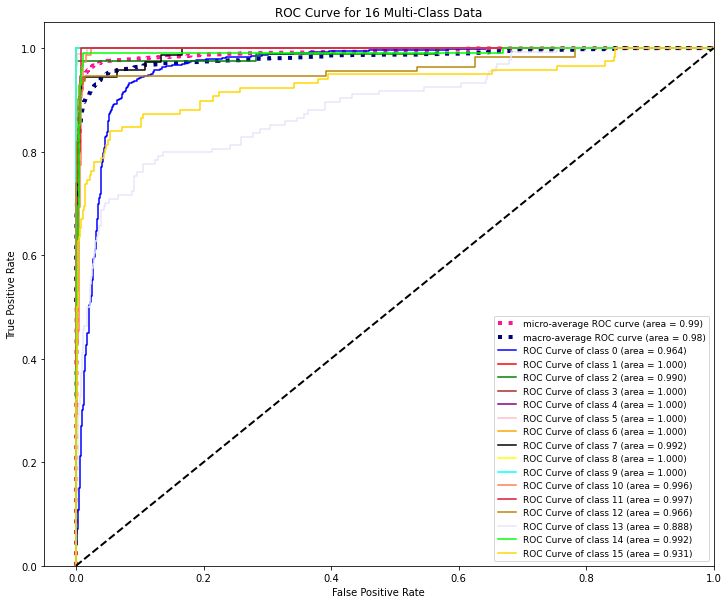

In [113]:
test(capsule_net, test_loader)

### flod2(test) 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.91960   0.93164   0.92558      1375
           1    1.00000   1.00000   1.00000        85
           2    0.98701   0.95000   0.96815        80
           3    0.96104   1.00000   0.98013        74
           4    0.98795   1.00000   0.99394        82
           5    0.91398   0.94444   0.92896        90
           6    1.00000   0.91358   0.95484        81
           7    0.92857   0.85714   0.89143        91
           8    0.97802   0.95699   0.96739        93
           9    1.00000   0.98780   0.99387        82
          10    0.77500   0.88571   0.82667        70
          11    0.88393   0.83898   0.86087       118
          12    0.80142   0.84962   0.82482       133
          13    0.76923   0.43103   0.55249       116
          14    0.82759   0.88889   0.85714       108
          15    0.62838   0.76230   0.68889       122

    accuracy                        0.89929      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:159: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



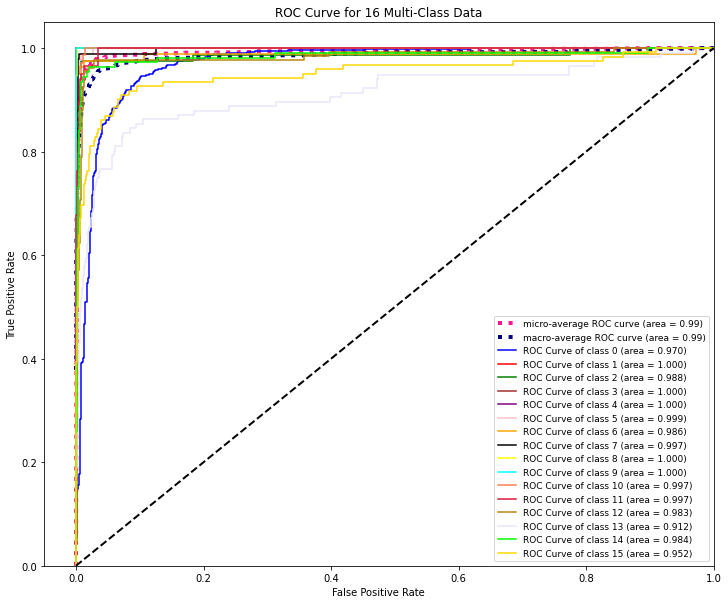

In [146]:
test(capsule_net, test_loader)

### flod3(test) 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.90941   0.94978   0.92916      1374
           1    1.00000   1.00000   1.00000        93
           2    1.00000   0.93827   0.96815        81
           3    0.96429   1.00000   0.98182        81
           4    0.98824   1.00000   0.99408        84
           5    0.97015   0.85526   0.90909        76
           6    1.00000   0.95402   0.97647        87
           7    0.86517   0.91667   0.89017        84
           8    0.87500   0.96923   0.91971        65
           9    0.95294   1.00000   0.97590        81
          10    0.89474   0.92391   0.90909        92
          11    0.89474   0.89474   0.89474       114
          12    0.92063   0.89922   0.90980       129
          13    0.68571   0.43243   0.53039       111
          14    0.79562   0.87200   0.83206       125
          15    0.83146   0.60163   0.69811       123

    accuracy                        0.90786      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:159: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



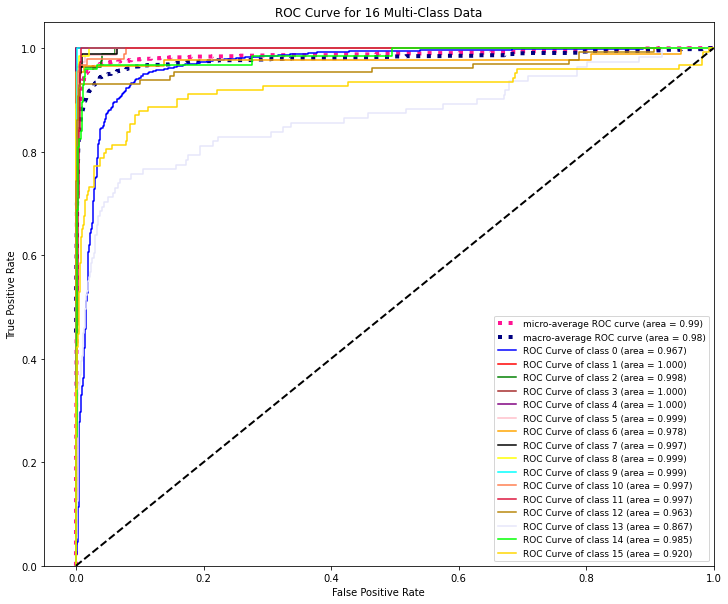

In [178]:
test(capsule_net, test_loader)

### flod4(test) 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.91396   0.93292   0.92334      1446
           1    1.00000   1.00000   1.00000        71
           2    1.00000   0.97500   0.98734        80
           3    1.00000   1.00000   1.00000        81
           4    0.96250   1.00000   0.98089        77
           5    0.95652   1.00000   0.97778        66
           6    1.00000   0.97297   0.98630        74
           7    0.78218   0.95181   0.85870        83
           8    0.98611   0.95946   0.97260        74
           9    0.98750   1.00000   0.99371        79
          10    0.86842   0.91667   0.89189        72
          11    0.88372   0.94215   0.91200       121
          12    0.81600   0.90265   0.85714       113
          13    0.75000   0.52066   0.61463       121
          14    0.89091   0.80992   0.84848       121
          15    0.73958   0.58678   0.65438       121

    accuracy                        0.90607      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:159: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



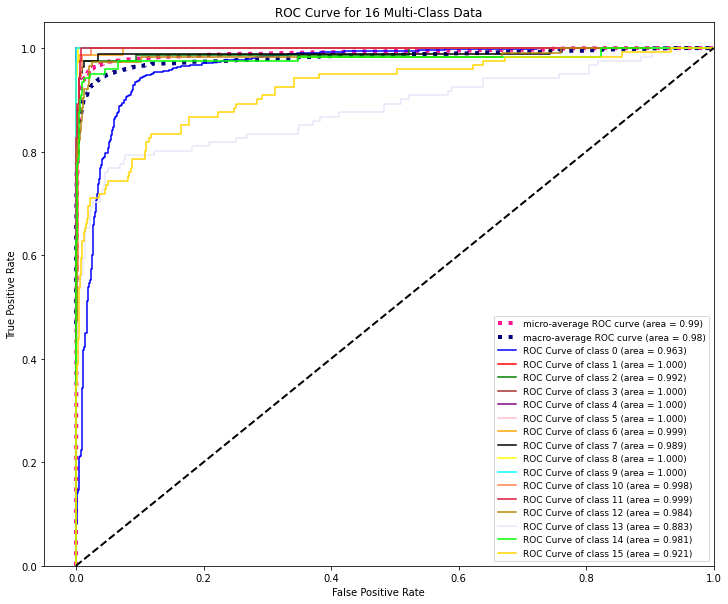

In [209]:
test(capsule_net, test_loader)

### 4CNN-flod0(test) 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.92133   0.93727   0.92924      1387
           1    1.00000   1.00000   1.00000        69
           2    0.81522   0.97403   0.88757        77
           3    1.00000   1.00000   1.00000        78
           4    0.94805   1.00000   0.97333        73
           5    0.98630   0.86747   0.92308        83
           6    0.98795   0.94253   0.96471        87
           7    0.82278   0.92857   0.87248        70
           8    0.88182   1.00000   0.93720        97
           9    1.00000   0.76712   0.86822        73
          10    0.82828   0.90110   0.86316        91
          11    0.93077   0.88971   0.90977       136
          12    0.90756   0.94737   0.92704       114
          13    0.69663   0.52542   0.59903       118
          14    0.77070   0.92366   0.84028       131
          15    0.80769   0.54310   0.64948       116

    accuracy                        0.90143      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:159: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



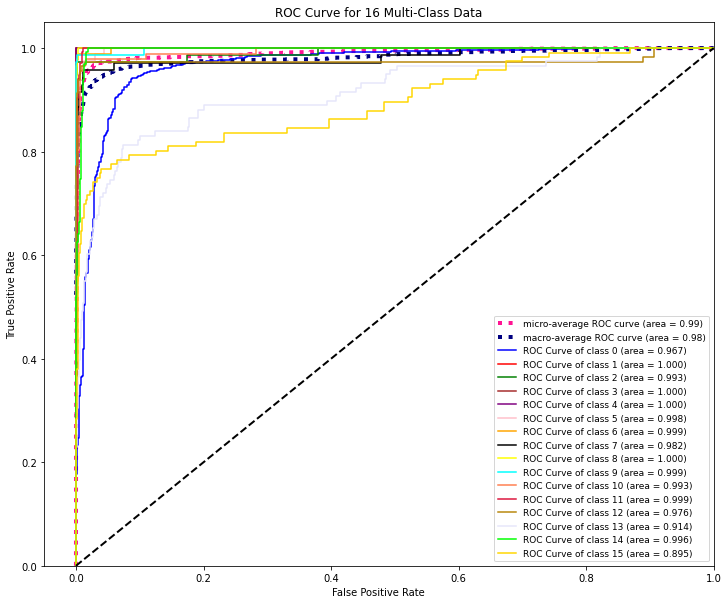

In [41]:
test(capsule_net, test_loader)

### flod1(test) 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.91707   0.93583   0.92635      1418
           1    1.00000   1.00000   1.00000        82
           2    1.00000   0.92683   0.96203        82
           3    0.97727   1.00000   0.98851        86
           4    1.00000   1.00000   1.00000        84
           5    0.97500   0.91765   0.94545        85
           6    0.95946   1.00000   0.97931        71
           7    0.82667   0.86111   0.84354        72
           8    0.91026   1.00000   0.95302        71
           9    0.97701   1.00000   0.98837        85
          10    0.75904   0.84000   0.79747        75
          11    0.77612   0.93694   0.84898       111
          12    0.89565   0.92793   0.91150       111
          13    0.64368   0.41791   0.50679       134
          14    0.82407   0.77391   0.79821       115
          15    0.78431   0.67797   0.72727       118

    accuracy                        0.89893      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:159: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



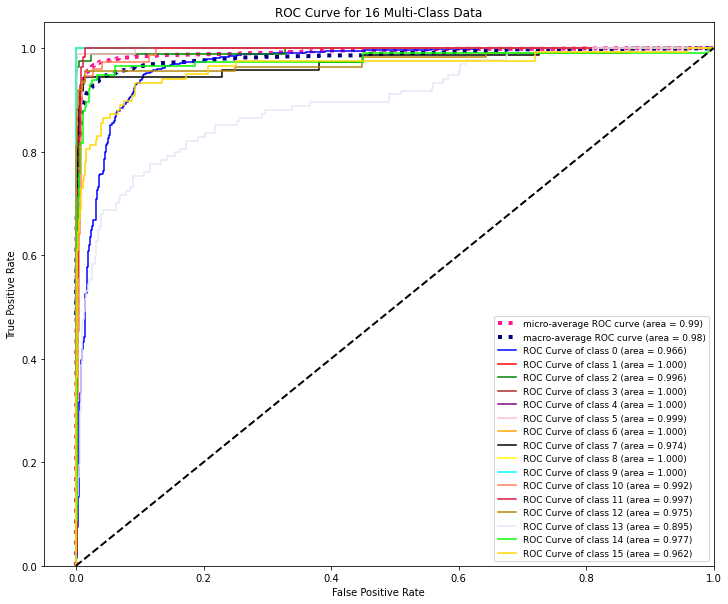

In [136]:
test(capsule_net, test_loader)

### fold 2(test)

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.93121   0.93527   0.93324      1375
           1    1.00000   1.00000   1.00000        85
           2    1.00000   0.93750   0.96774        80
           3    0.93671   1.00000   0.96732        74
           4    0.98795   1.00000   0.99394        82
           5    0.96429   0.90000   0.93103        90
           6    1.00000   0.93827   0.96815        81
           7    0.91398   0.93407   0.92391        91
           8    0.95833   0.98925   0.97354        93
           9    0.97619   1.00000   0.98795        82
          10    0.79747   0.90000   0.84564        70
          11    0.94915   0.94915   0.94915       118
          12    0.87500   0.89474   0.88476       133
          13    0.65347   0.56897   0.60829       116
          14    0.80800   0.93519   0.86695       108
          15    0.82857   0.71311   0.76652       122

    accuracy                        0.91643      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:159: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



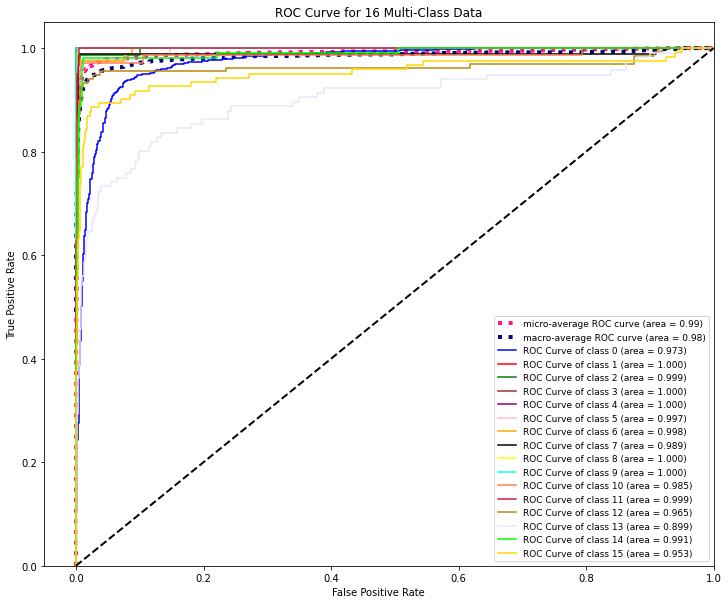

In [167]:
test(capsule_net, test_loader)

### fold3(test) 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.90232   0.93450   0.91813      1374
           1    1.00000   1.00000   1.00000        93
           2    1.00000   0.93827   0.96815        81
           3    0.96429   1.00000   0.98182        81
           4    0.98824   1.00000   0.99408        84
           5    0.98551   0.89474   0.93793        76
           6    1.00000   0.95402   0.97647        87
           7    0.85542   0.84524   0.85030        84
           8    0.92754   0.98462   0.95522        65
           9    0.94186   1.00000   0.97006        81
          10    0.92537   0.67391   0.77987        92
          11    0.81955   0.95614   0.88259       114
          12    0.86154   0.86822   0.86486       129
          13    0.58750   0.42342   0.49215       111
          14    0.77483   0.93600   0.84783       125
          15    0.79545   0.56911   0.66351       123

    accuracy                        0.89357      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:159: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



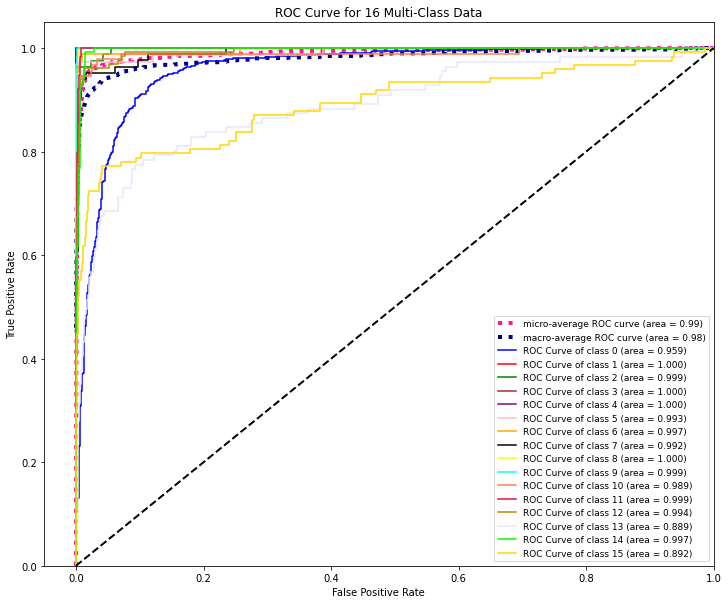

In [198]:
test(capsule_net, test_loader)

### fold4(test) 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.91293   0.94260   0.92753      1446
           1    1.00000   1.00000   1.00000        71
           2    1.00000   0.96250   0.98089        80
           3    1.00000   1.00000   1.00000        81
           4    0.96250   1.00000   0.98089        77
           5    0.98182   0.81818   0.89256        66
           6    1.00000   0.97297   0.98630        74
           7    0.90141   0.77108   0.83117        83
           8    0.85057   1.00000   0.91925        74
           9    0.98750   1.00000   0.99371        79
          10    0.86364   0.79167   0.82609        72
          11    0.92366   1.00000   0.96032       121
          12    0.75182   0.91150   0.82400       113
          13    0.72152   0.47107   0.57000       121
          14    0.84874   0.83471   0.84167       121
          15    0.74257   0.61983   0.67568       121

    accuracy                        0.90214      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:159: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



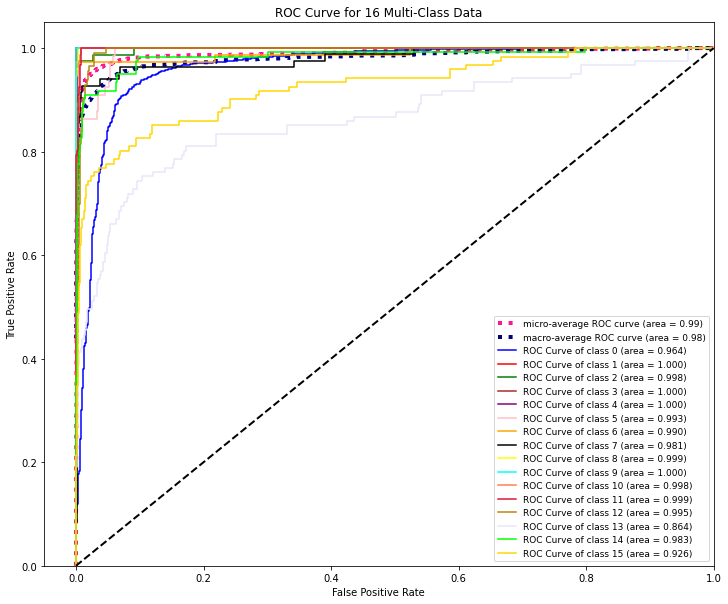

In [229]:
test(capsule_net, test_loader)